**Problem Statement:**

Credit card fraud refers to a wide range of activities which includes theft of money using either credit cards or debit cards. The theft can be
either online or offline. An offline theft generally involves withdrawing money from an ATM machine physically using a stolen credit card. An
online theft involves any online transaction using the card without the prior consent of the owner. From a bank's point of view, it's very
essential to identify whether a transaction is fraudulent or not because they don't want to lose money or don't want to lose the faith that
there customer has entrusted upon them. In such a scenario it becomes a necessity to build a robust system which can be used to determined
fraudulent transactions. 
It's important for the bank to know which of the transactions are fraud, at the same time it is important to understand which of the
transactions not fraud are. This includes modelling past credit card transactions with the knowledge of the ones that turned out to be fraud.
While designing the system we should keep in mind that the cost of misclassification of a fraudulent transaction is very high. We don't to end
up with a system which might classify a fraudulent transaction as a non-fraudulent one.  
Such a system in machine learning is termed as a high recall system. Our aim here is to detect 100% of the fraudulent transactions while
minimizing the incorrect fraud classifications.

**Objectives:**
*   Leverage the data and perform EDA.
*   Implement standard outlier detection algorithms and see how successful they are in detecting fraudulent transactions.
*   Clean and Balance the data for ML models
*   Implementing Machine Learning models/Hyperparameter Tuning, we will follow two approaches for resampling data: First, we will under sample the data and create a balanced dataset containing equal number of points from both the classes. Second, we will oversample the dataset by adding synthetic
points using SMOTE sampling technique. 
*   Model Evaluation: Lastly, we will compare all the models and see which models turns out to better than the rest.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Data Preparation and EDA**

In [2]:
# Read dataset from drive
df = pd.read_csv('drive/My Drive/creditcard.csv')
df.head()

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]

In [3]:
# Examining the dataset imported:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
#find % values of class
(df.groupby('Class')['Class'].count()/df['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [7]:
# Verifying null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#observe the different feature type present in the data
#lets check data types of the features
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
# correlation matrix
cor = df.corr()
cor

Time            V1            V2  ...           V28    Amount     Class
Time    1.000000  1.173963e-01 -1.059333e-02  ... -9.412688e-03 -0.010596 -0.012323
V1      0.117396  1.000000e+00  4.697350e-17  ...  9.820892e-16 -0.227709 -0.101347
V2     -0.010593  4.697350e-17  1.000000e+00  ... -3.676415e-16 -0.531409  0.091289
V3     -0.419618 -1.424390e-15  2.512175e-16  ...  7.726948e-16 -0.210880 -0.192961
V4     -0.105260  1.755316e-17 -1.126388e-16  ... -5.863664e-17  0.098732  0.133447
V5      0.173072  6.391162e-17 -2.039868e-16  ... -3.299167e-16 -0.386356 -0.094974
V6     -0.063016  2.398071e-16  5.024680e-16  ...  4.813155e-16  0.215981 -0.043643
V7      0.084714  1.991550e-15  3.966486e-16  ... -6.836764e-17  0.397311 -0.187257
V8     -0.036949 -9.490675e-17 -4.413984e-17  ... -4.484325e-16 -0.103079  0.019875
V9     -0.008660  2.169581e-16 -5.728718e-17  ...  9.146779e-16 -0.044246 -0.097733
V10     0.030617  7.433820e-17 -4.782388e-16  ... -1.515934e-16 -0.101502 -0.216883
V11    -0.247689  2.438580e-16  9.468995e-16  ... -3.091914e-16  0.000104  0.154876
V12     0.124348  2.422086e-16 -6.588252e-16  ...  7.327446e-16 -0.009542 -0.260593
V13    -0.065902 -2.115458e-16  3.854521e-16  ...  1.049541e-15  0.005293 -0.004570
V14    -0.098757  9.352582e-16 -2.541036e-16  ...  2.503271e-15  0.033751 -0.302544
V15    -0.183453 -3.252451e-16  2.831060e-16  ... -1.063286e-15 -0.002986 -0.004223
V16     0.011903  6.308789e-16  4.934097e-17  ...  8.637186e-16 -0.003910 -0.196539
V17    -0.073297 -5.011524e-16 -9.883008e-16  ... -2.182692e-16  0.007309 -0.326481
V18     0.090438  2.870125e-16  2.636654e-16  ...  8.844995e-16  0.035650 -0.111485
V19     0.028975  1.818128e-16  9.528280e-17  ... -1.375843e-15 -0.056151  0.034783
V20    -0.050866  1.036959e-16 -9.309954e-16  ... -1.133579e-16  0.339403  0.020090
V21     0.044736 -1.755072e-16  8.444409e-17  ...  5.132234e-16  0.105999  0.040413
V22     0.144059  7.477367e-17  2.500830e-16  ... -3.021376e-16 -0.064801  0.000805
V23     0.051142  9.808705e-16  1.059562e-16  ...  9.029821e-16 -0.112633 -0.002685
V24    -0.016182  7.354269e-17 -8.142354e-18  ... -2.259275e-16  0.005146 -0.007221
V25    -0.233083 -9.805358e-16 -4.261894e-17  ...  3.399375e-16 -0.047837  0.003308
V26    -0.041407 -8.621897e-17  2.601622e-16  ... -3.751403e-16 -0.003208  0.004455
V27    -0.005135  3.208233e-17 -4.478472e-16  ... -3.770124e-16  0.028825  0.017580
V28    -0.009413  9.820892e-16 -3.676415e-16  ...  1.000000e+00  0.010258  0.009536
Amount -0.010596 -2.277087e-01 -5.314089e-01  ...  1.025822e-02  1.000000  0.005632
Class  -0.012323 -1.013473e-01  9.128865e-02  ...  9.536041e-03  0.005632  1.000000

[31 rows x 31 columns]

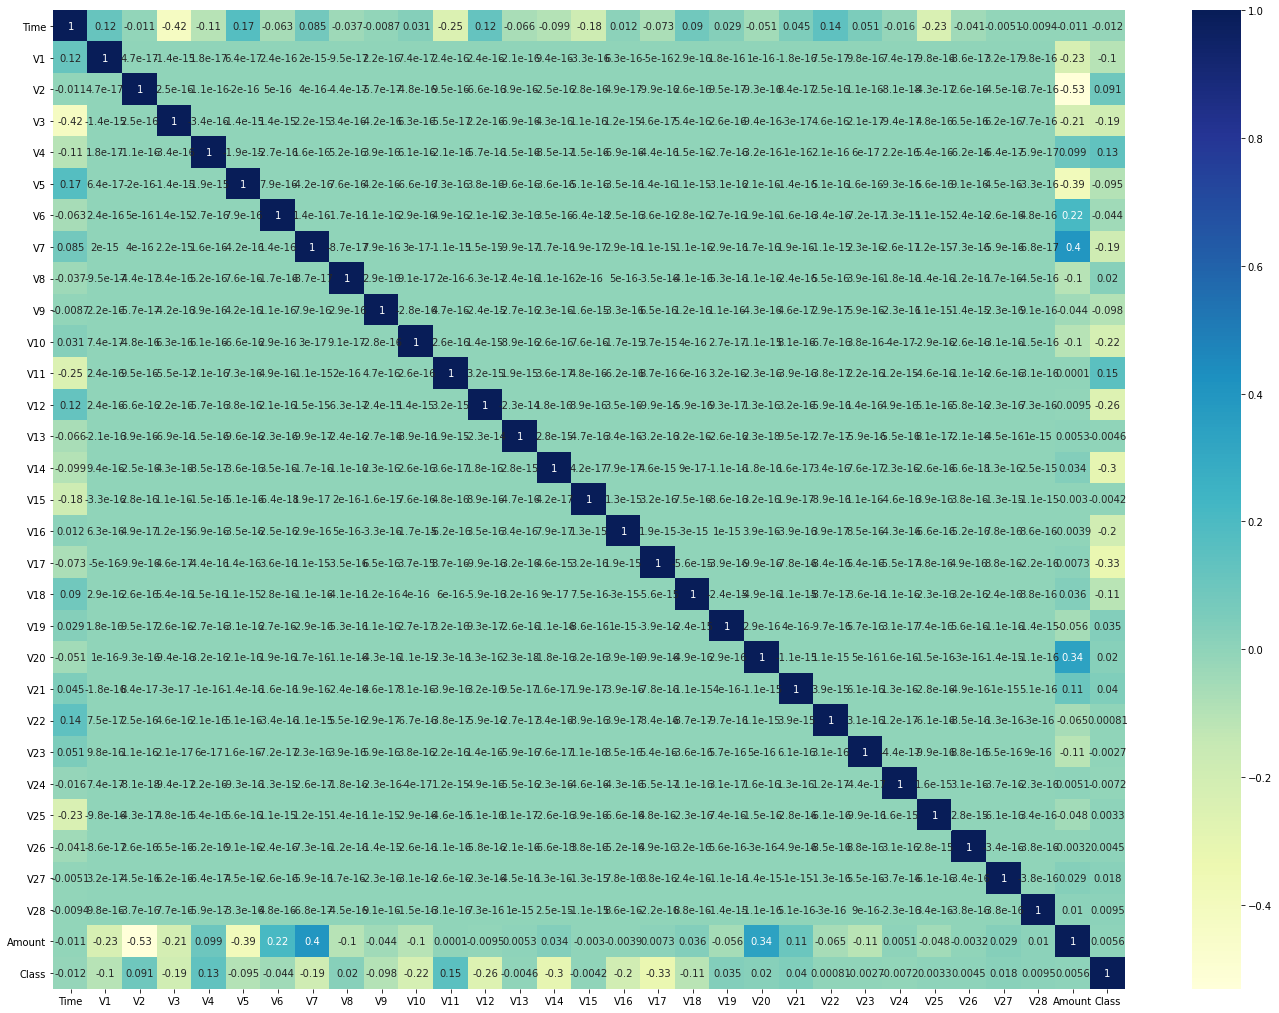

In [10]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [11]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

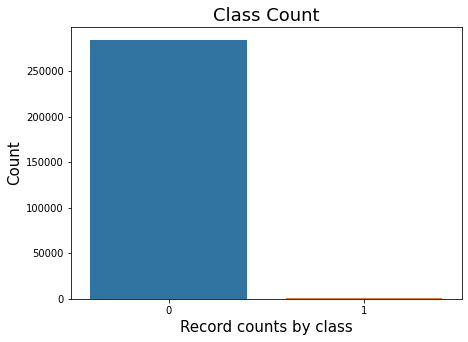

In [12]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

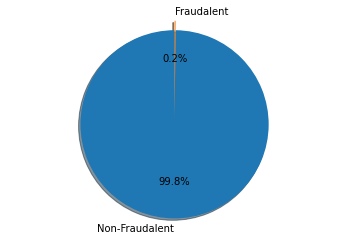

In [13]:
# Distribution of the Fraudalent vs Non-fraudalent transaction in Percentages
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

There are only **492** fraudulent transactions out of 2,84,807 total credit card transactions

In [14]:
print('The percentage without churn prediction is ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The percentage with churn prediction is ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df['Class'].value_counts()[1]/df['Class'].value_counts()[0] * 100,2))

The percentage without churn prediction is  99.83 % of the dataset
The percentage with churn prediction is  0.17 % of the dataset
The ratio of imbalance is 0.17


In [15]:
# Creating scatter plot to observe the distribution of classes with time

Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#Creating derived columns Mins and hours

df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

Text(0.5, 1.05, 'Time vs Class Distribution')

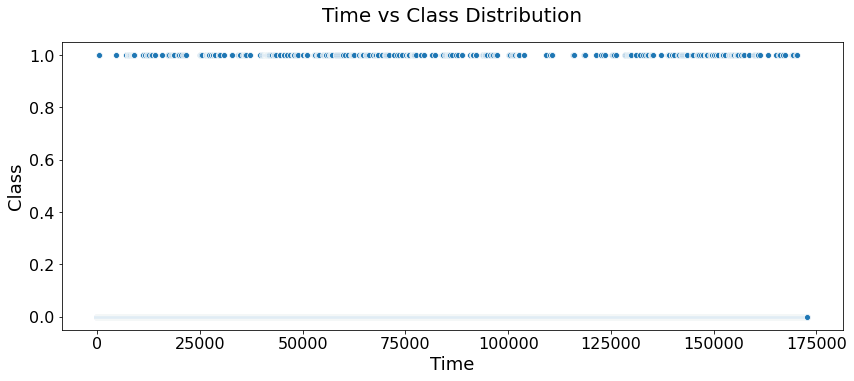

In [16]:
# Bivariate Analysis: Scatter plot to observe the distribution of classes with time

fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

# Plotting the relation between variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Time vs Class Distribution', size=20, y=1.05)

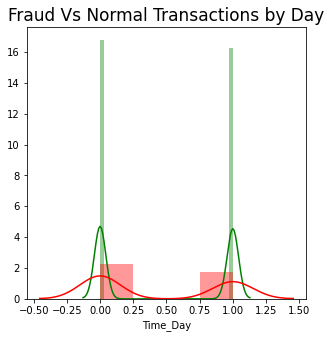

In [17]:
#The fraud Vs normal trasaction by day
plt.figure(figsize=(5,5))
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

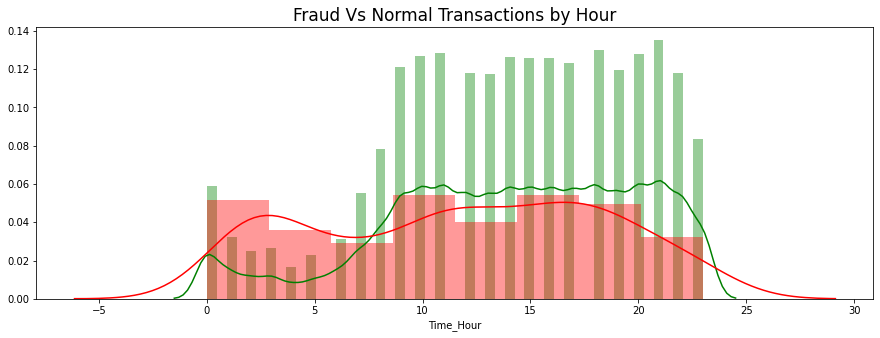

In [18]:
#The fraud Vs normal trasaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

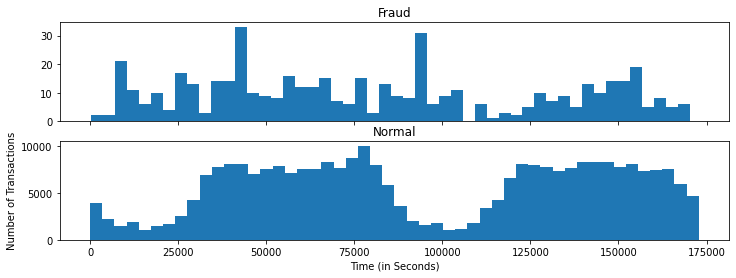

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [20]:
# Creating scatter plot to observe the distribution of classes with Amount

df_Fraud = df[df['Class'] == 1]
df_Regular = df[df['Class'] == 0]

# Fraud Transaction Amount Statistics
print(df_Fraud["Amount"].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [21]:
# Regular transaction amount statistics
print(df_Regular["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Text(0.5, 1.05, 'Amount vs Class Distribution')

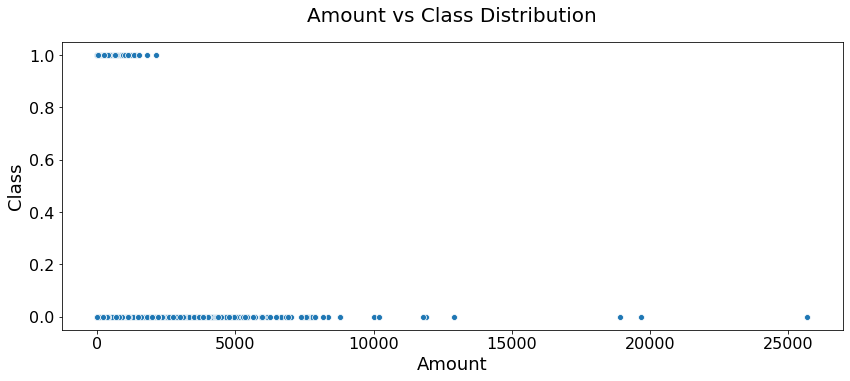

In [22]:
# Bivariate Analysis: Creating scatter plot to observe the distribution of classes with Amount


fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')

# Plot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Amount'], y='Class', palette=cmap, data=df)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)

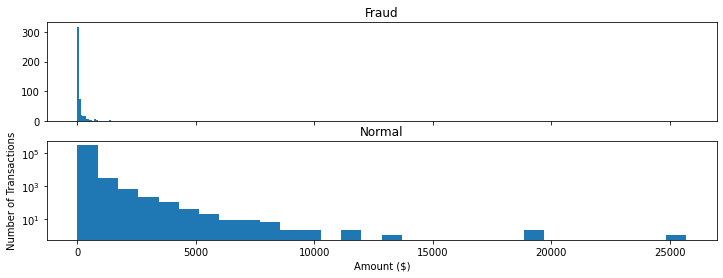

In [23]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [24]:
# Diving more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = df.corr()['Class']

# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)

# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]

# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


Correlation
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413

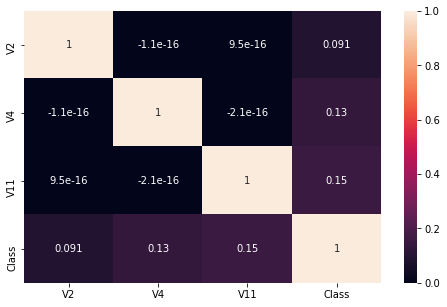

In [25]:
# Plotting heatmap again for relatively strong correlation (>0.09) with the target variable

top_feature = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

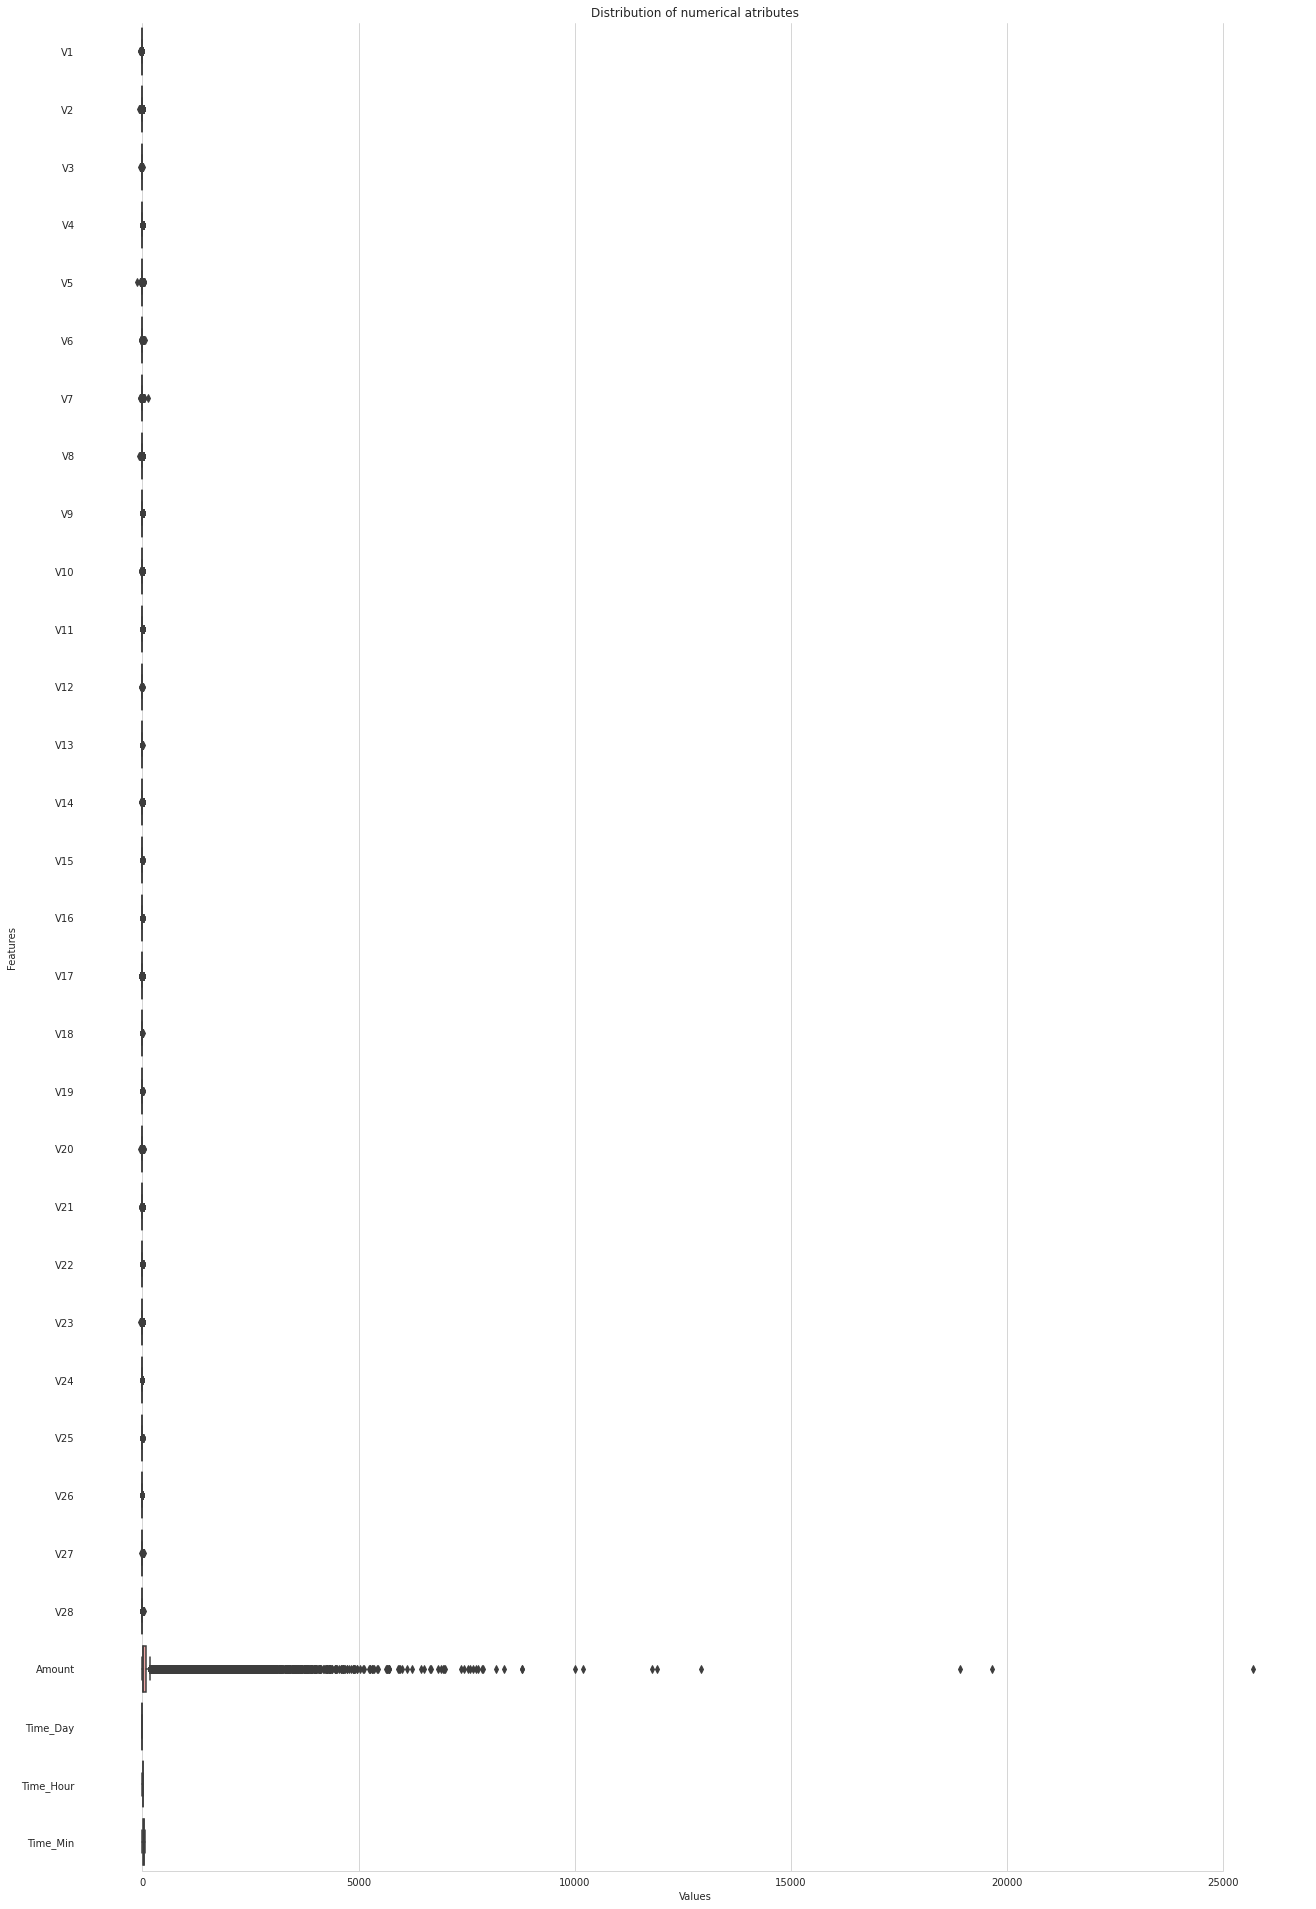

In [26]:
# Plotting distribution of variable
# Boxplot to understand the distribution of numerical attributes

# Selecting only numerical feature from the dataframe:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as its not needed for transformation : 
li_not_plot = ['Class','Time']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(22,34))
# Using log scale:
#ax.set_xscale("log")
ax = sns.boxplot(data=df[li_transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True,left=True)

In [27]:
# Drop unnecessary columns
# As we have derived the Day/Hour/Minutes from the time column we will drop Time

df.drop('Time', axis = 1, inplace= True)

# also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

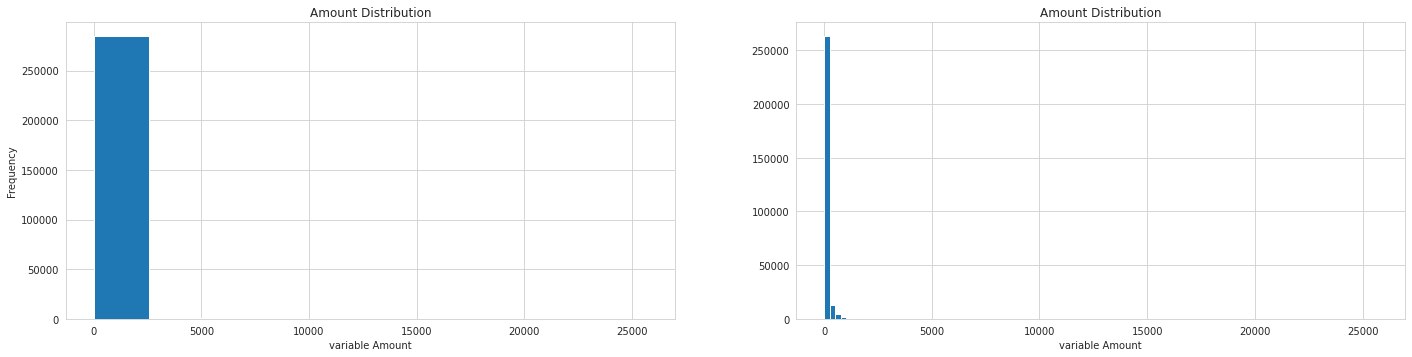

In [28]:
# Let's try to understand the Amount variable as it is not PCA transformed variable

plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")
# plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df['Amount'],bins=100)
plt.show()

### **Train/Test Split**

In [29]:
# Splitting into train & test data

y= df['Class']
X = df.drop(['Class'], axis=1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

In [31]:
# Preserve X_test & y_test to evaluate on the test data once you build the model

print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [32]:
# Plotting the distribution of a variable

cols = list(X.columns.values)
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_Hour']

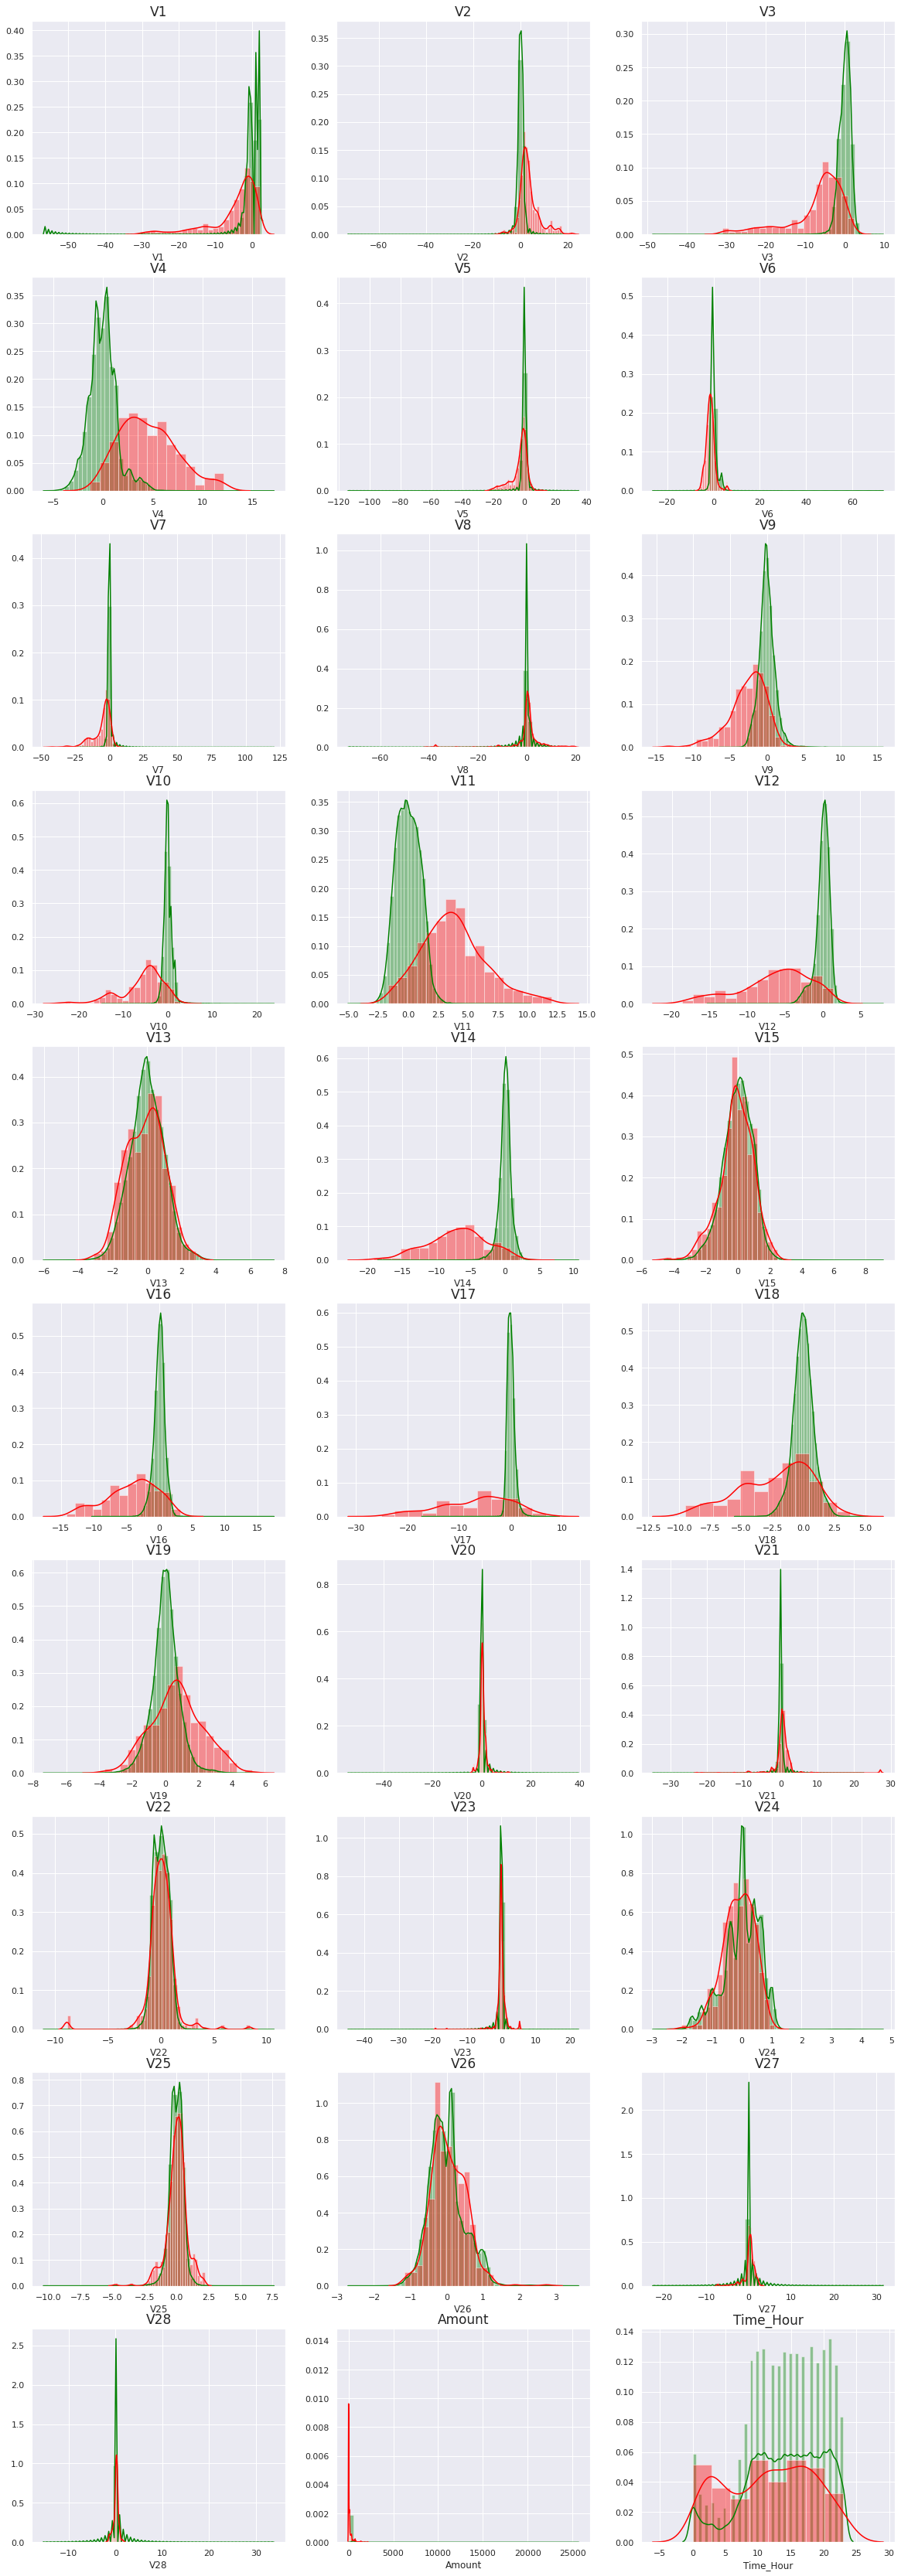

In [33]:
# plotting histogram of a variable from the dataset to observe skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

In [34]:
# Creating model functions for Logistic Regress, KNN, SVM, Decision Tree, Random Forest, XGBoost

# Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

In [35]:
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [36]:
def buildAndRunLogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model #import the package
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  #searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_) 

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_) 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [37]:
def buildAndRunKNNModels(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [38]:
def buildAndRunSVMModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))



  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [39]:
def buildAndRunTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [40]:
def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [41]:
def buildAndRunXGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score
  # fit model no training data
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [42]:
# Power Transformer package present in the preprocessing library provided by sklearn to make distribution more gaussian

# Apply preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [43]:
#Create Dataframe

X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

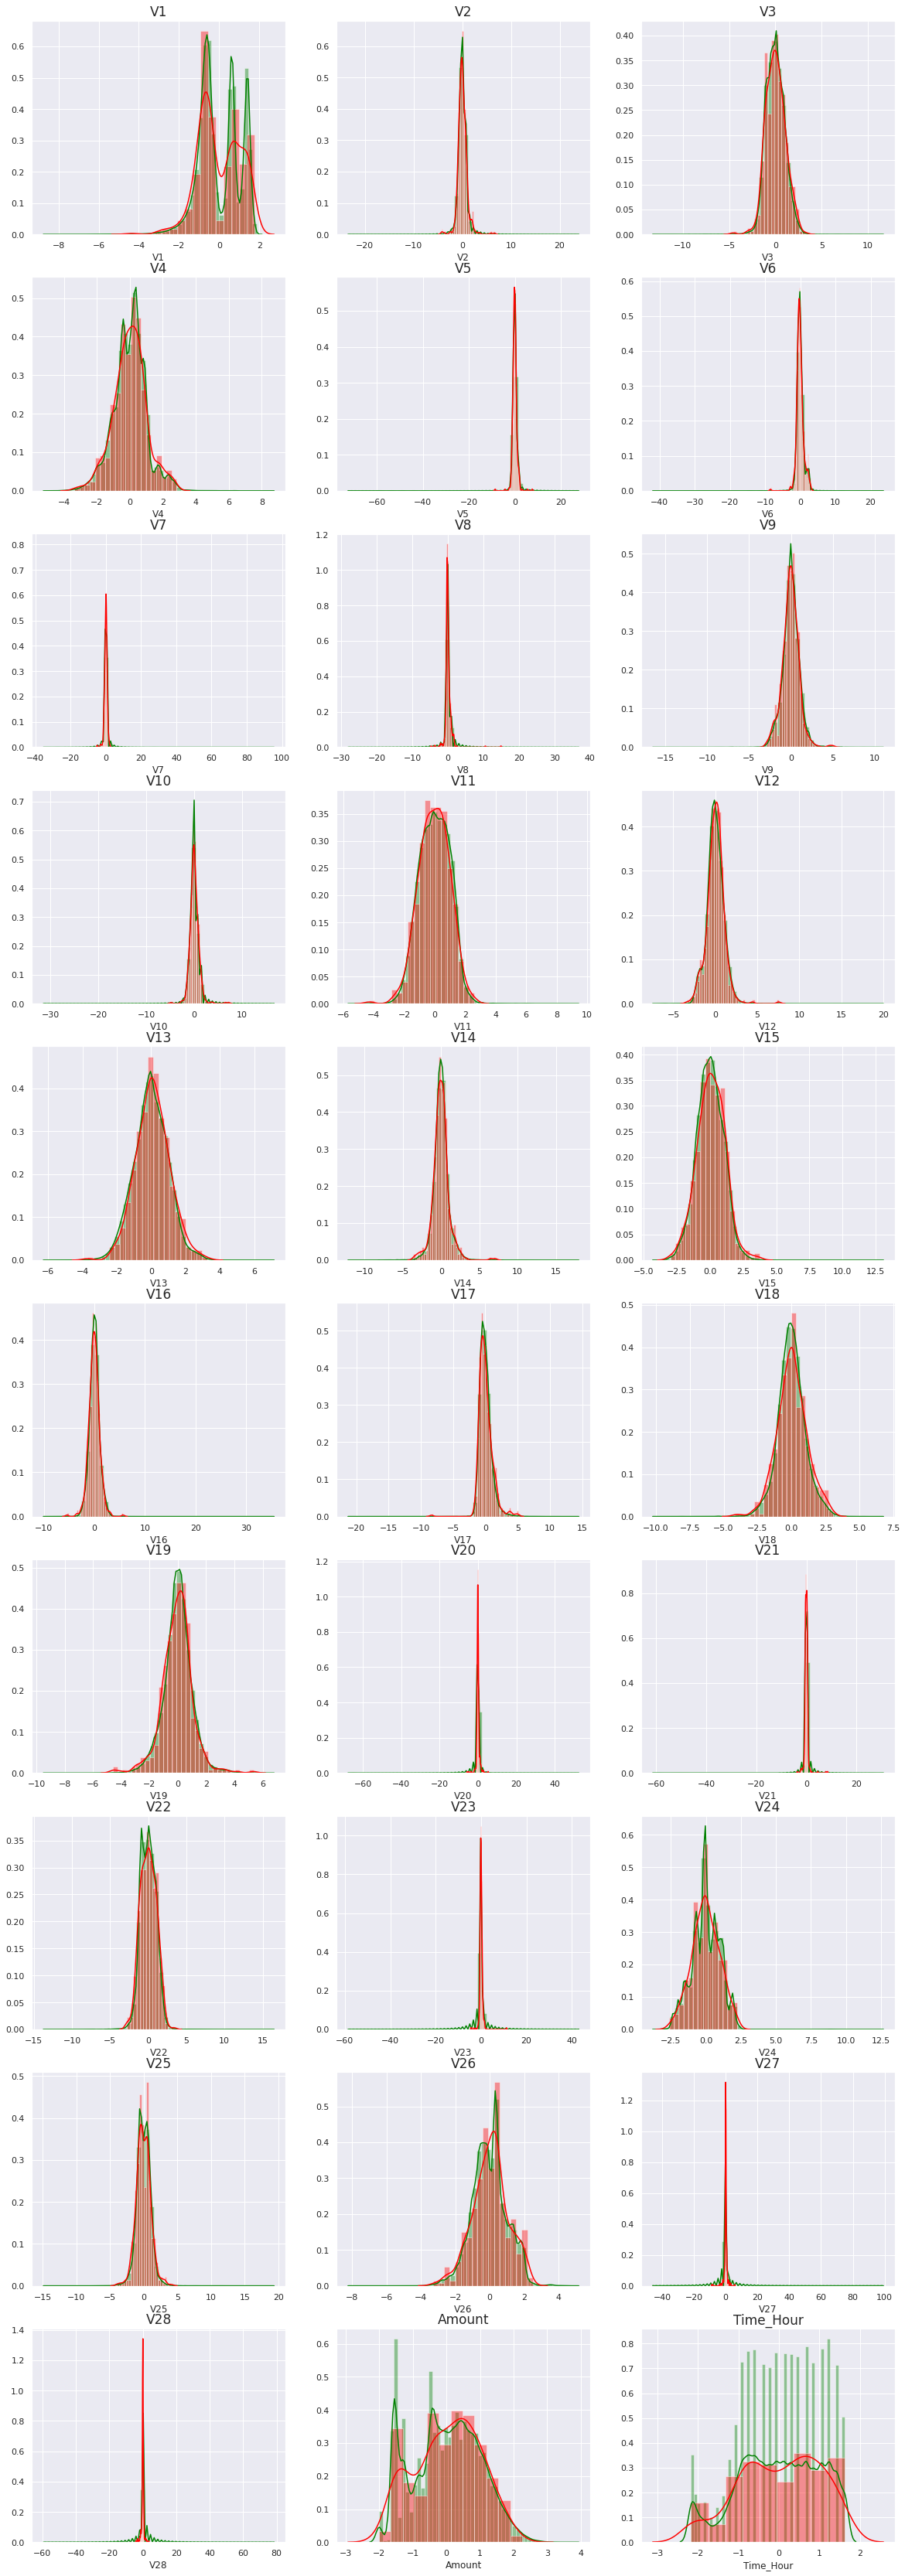

In [44]:
# plotting histogram of a variable from the train dataset again to see the result 

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_records], color='green')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

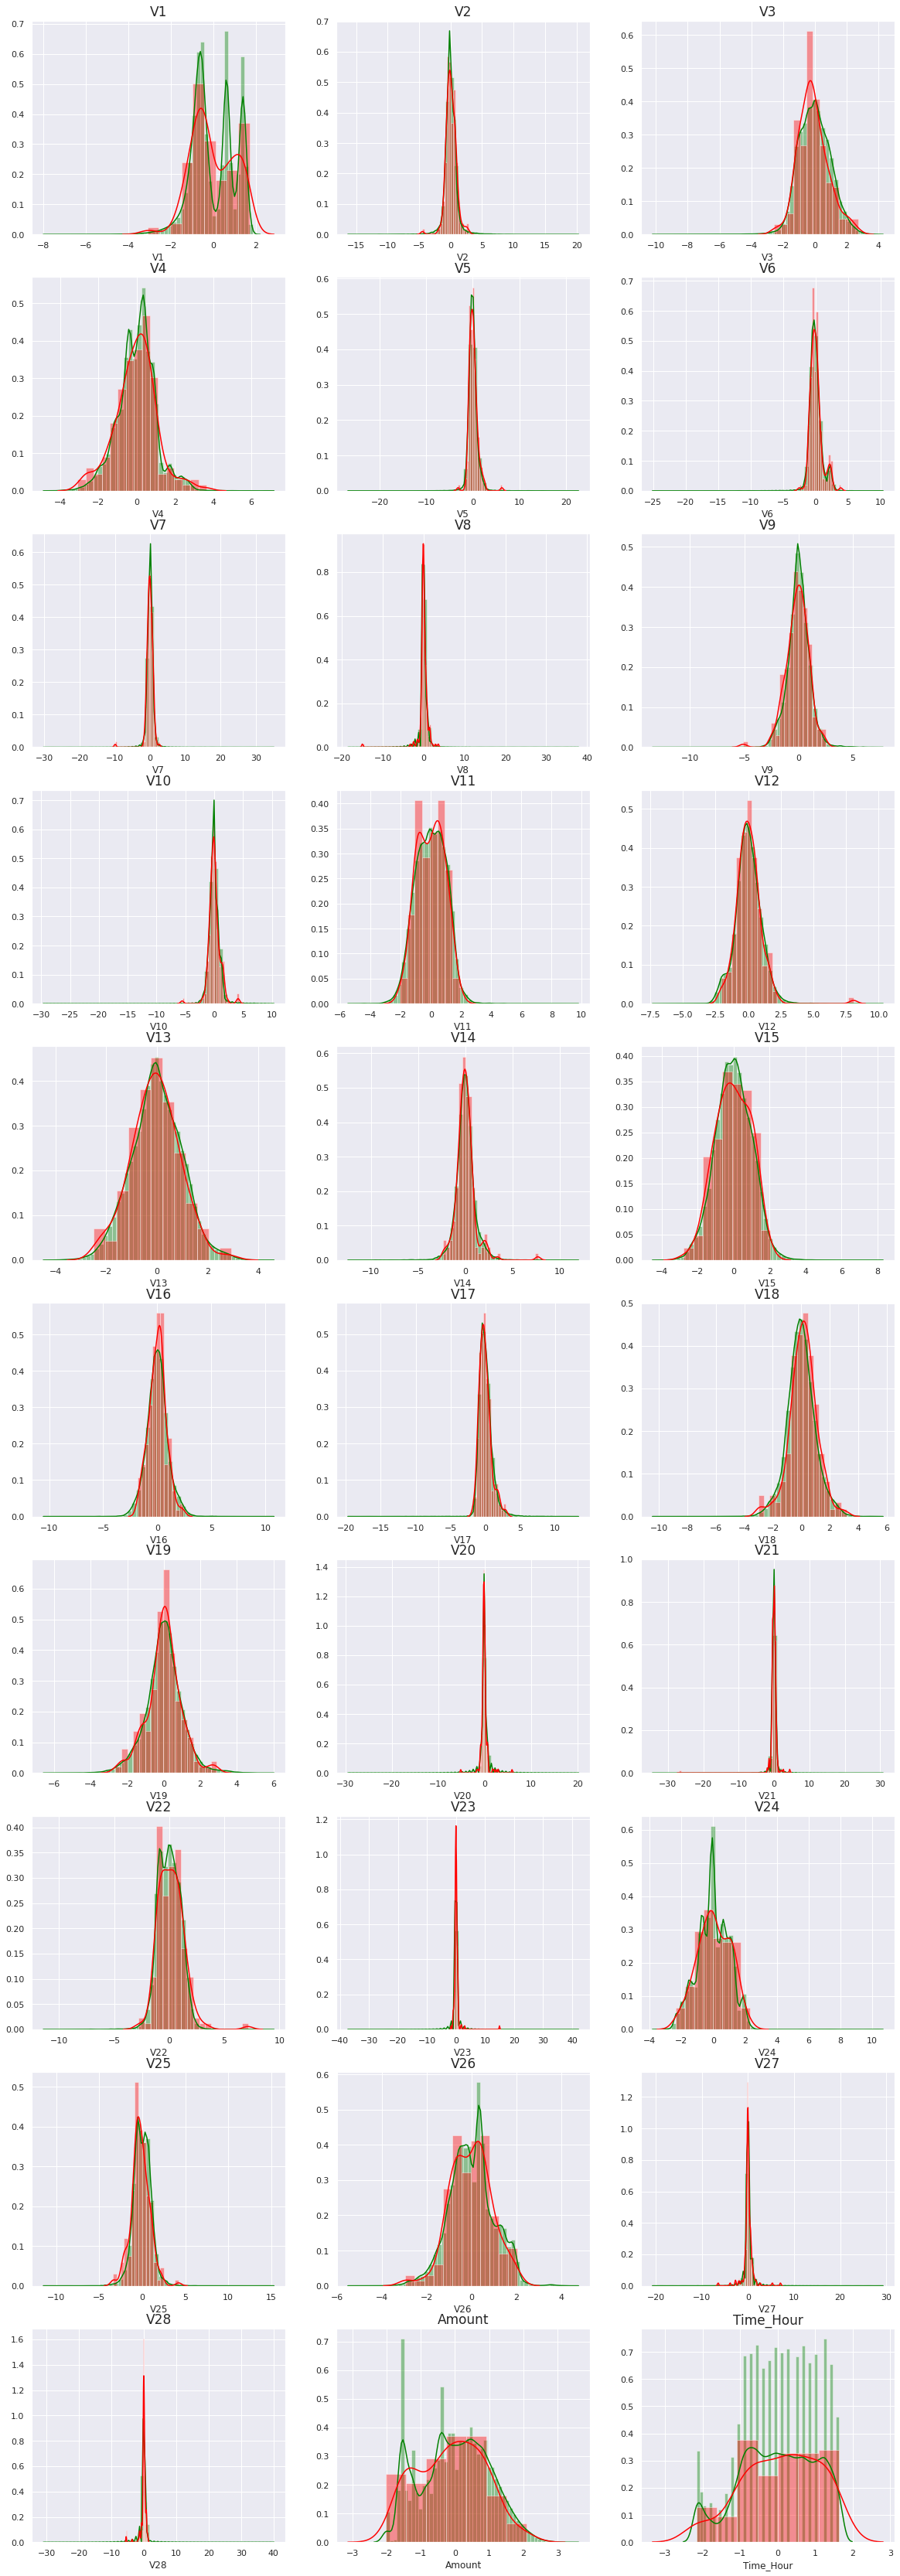

In [45]:
# plotting histogram of a variable from the test dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_test_pt_df[col][normal_records], color='green')
  sns.distplot(X_test_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

## Model Building

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.983760023970567
Max auc_roc for l1: 0.9854770239257755
Parameters for l2 regularisations
[[-0.09276541 -0.06828297 -0.28652331  0.55493742  0.02789795  0.01396825
  -0.06824953 -0.20408006 -0.18143666 -0.20371291  0.17699968 -0.50183428
  -0.11614819 -0.66830552 -0.0815942  -0.18013738 -0.08164992  0.03866812
  -0.03807332 -0.02310099  0.10465199  0.10090233 -0.03198749 -0.02939204
   0.01001787  0.00785392 -0.04474827 -0.02229527  0.02208228  0.08474082]]
[-8.07230494]
{1: array([[0.90398235, 0.90383704, 0.90383704, 0.90383704, 0.90383704,
        0.90419481, 0.96804377, 0.99255279, 0.99488378, 0.99521346,
        0.99521346, 0.99521346, 0.99521346, 0.99521346, 0.99521346,
        0.99521346, 0.99521346, 0.99521346, 0.99521346, 0.99521346],
       [0.9306611 , 0.9306611 , 0.9306611 , 0.9306611 , 0.9306611 ,
        0.93091836, 0.96502028, 0.98005776, 0.97844439, 0.97856203,
        0.97856203, 0.97856203, 0.978562

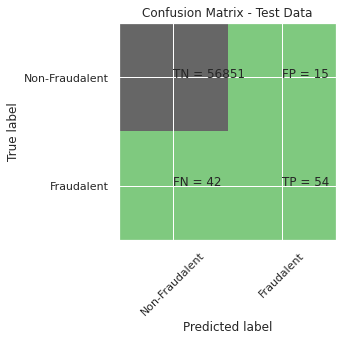

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9989466661985184
Confusion Matrix


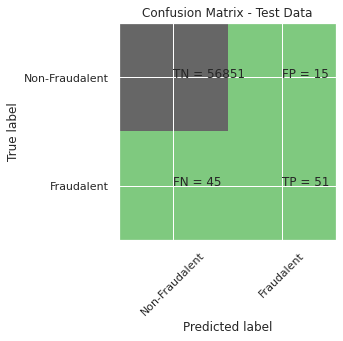

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.53      0.63        96

    accuracy                           1.00     56962
   macro avg       0.89      0.77      0.81     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9668061026506759
l2 threshold: 0.0012891785846003076
ROC for the test dataset 96.7%


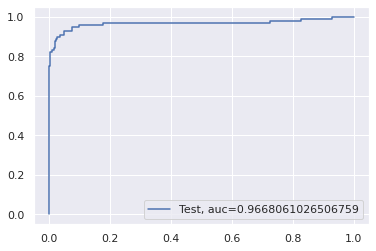

l1 roc_value: 0.9702463906376395
l1 threshold: 0.002675928800502849
ROC for the test dataset 97.0%


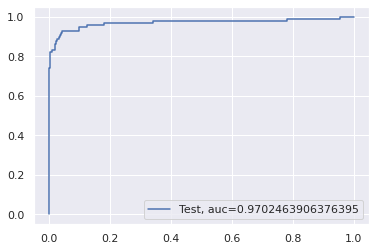

Time Taken by Model: --- 157.63273239135742 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9992977774656788
Confusion Matrix


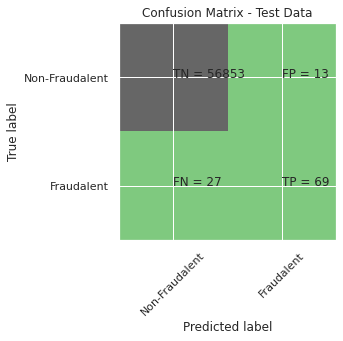

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.72      0.78        96

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.900851068740548
KNN threshold: 0.2
ROC for the test dataset 90.1%


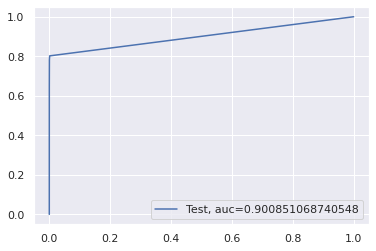

Time Taken by Model: --- 1647.7213144302368 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9988062216916541
Confusion Matrix


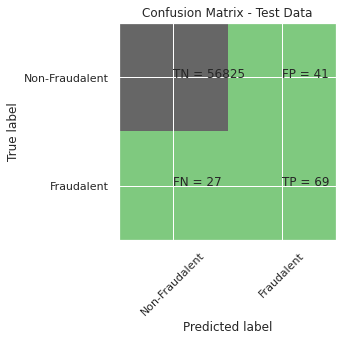

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.63      0.72      0.67        96

    accuracy                           1.00     56962
   macro avg       0.81      0.86      0.83     56962
weighted avg       1.00      1.00      1.00     56962

gini tree_roc_value: 0.8590145033939437
Tree threshold: 1.0
ROC for the test dataset 85.9%


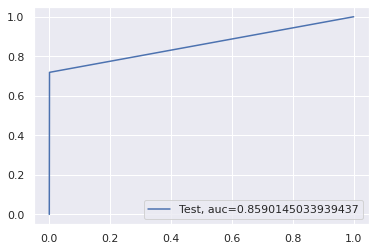

entropy score: 0.9990519995786665
Confusion Matrix


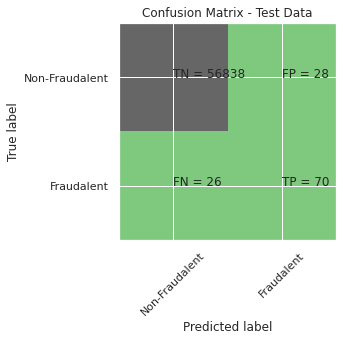

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.71      0.73      0.72        96

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962

entropy tree_roc_value: 0.8643371405291973
Tree threshold: 1.0
ROC for the test dataset 86.4%


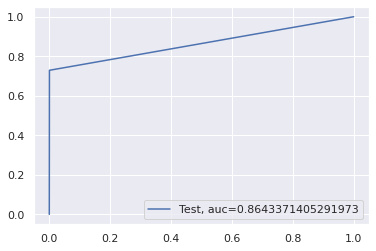

Time Taken by Model: --- 41.0512011051178 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9993504441557529
Confusion Matrix


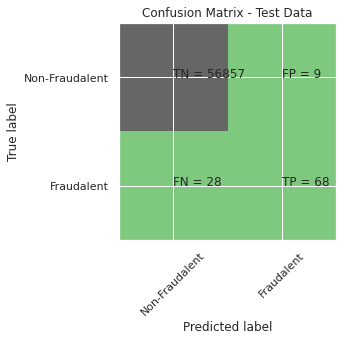

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.940564037972309
Random Forest threshold: 0.01
ROC for the test dataset 94.1%


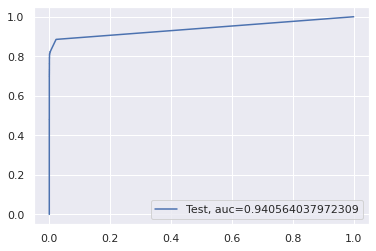

Time Taken by Model: --- 258.019407749176 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9993153330290369
Confusion Matrix


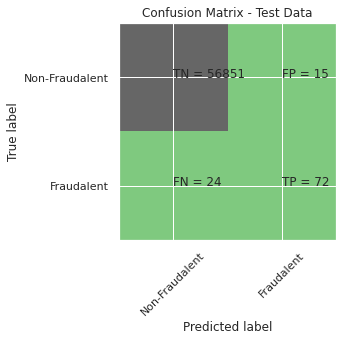

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.83      0.75      0.79        96

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962

XGboost roc_value: 0.9750367091056167
XGBoost threshold: 0.0007558927754871547
ROC for the test dataset 97.5%


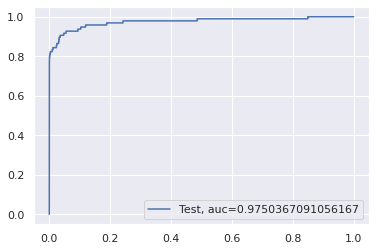

Time Taken by Model: --- 57.34641742706299 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9985604438046417
Confusion Matrix


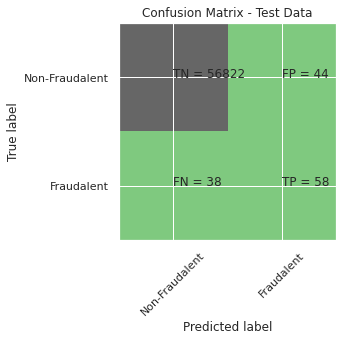

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.78      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.8913403146578507
SVM threshold: 0.0013849213708324976
ROC for the test dataset 89.1%


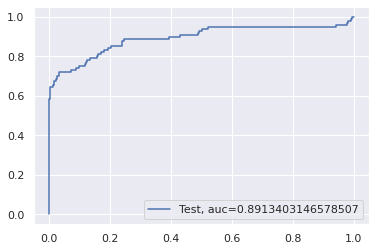

Time Taken by Model: --- 106.91514086723328 seconds ---


In [46]:
# Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [47]:
df_Results.head()

Data_Imbalance_Handiling  ... threshold
0        Power Transformer  ...  0.001289
1        Power Transformer  ...  0.002676
2        Power Transformer  ...  0.200000
3        Power Transformer  ...  1.000000
4        Power Transformer  ...  1.000000

[5 rows x 5 columns]

In [48]:
# Perfroming RepeatedKFold and check the results

from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3      5     12 ... 284790 284794 284802]
TRAIN: [     0      1      2 ... 284802 284805 284806] TEST: [    20     24     36 ... 284800 284803 284804]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     7     10     11 ... 284798 284799 284801]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     4      8     13 ... 284792 284793 284796]
TRAIN: [     3      4      5 ... 284802 284803 284804] TEST: [     0      1      2 ... 284797 284805 284806]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST: [     3      4      8 ... 284799 284802 284804]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    14     18     26 ... 284776 284790 284798]
TRAIN: [     0      1      3 ... 284802 284804 284806] TEST: [     2      5      6 ... 284801 284803 284805]
TRAIN: [     1      2      3 ... 284803 284804 284805] TEST: [     0      9     15 ... 284796 284797 284806]
TRAIN: [     0     

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9866770676996547
Max auc_roc for l1: 0.969157812132712
Parameters for l2 regularisations
[[ 1.36120965e-03  4.74796185e-02 -8.97596085e-02  2.38786704e-01
   8.78977185e-02 -4.47430613e-02 -3.79864355e-02 -1.20294957e-01
  -8.37962863e-02 -1.78905574e-01  1.32450984e-01 -2.02105938e-01
  -4.40131553e-02 -3.76292061e-01 -9.91723838e-03 -1.04364029e-01
  -8.36646286e-02  2.44904018e-03  1.11280103e-02 -2.00713590e-02
   4.63252256e-02  3.04659897e-02 -1.60084573e-02 -1.41725555e-02
  -1.35673799e-02  6.68446680e-03 -1.12533841e-02 -1.47105135e-03
   3.19032515e-04  3.54194187e-03]]
[-7.486666]
{1: array([[0.65731448, 0.65902386, 0.67625818, 0.80026176, 0.90257019,
        0.92072039, 0.93047379, 0.95401981, 0.96852276, 0.97378761,
        0.97378761, 0.97378761, 0.97378761, 0.97378761, 0.97378761,
        0.97378761, 0.97378761, 0.97378761, 0.97378761, 0.97378761],
       [0.55313191, 0.55468981, 0.57576536, 0.745948

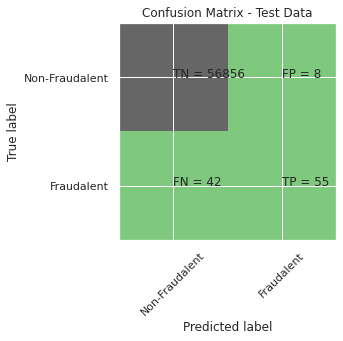

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.57      0.69        97

    accuracy                           1.00     56961
   macro avg       0.94      0.78      0.84     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9991573181650603
Confusion Matrix


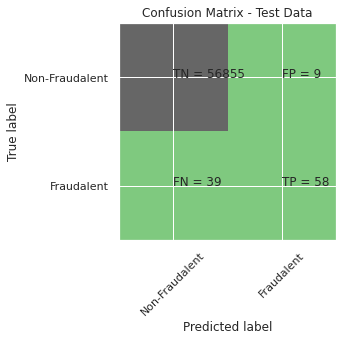

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.60      0.71        97

    accuracy                           1.00     56961
   macro avg       0.93      0.80      0.85     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.971008780581195
l2 threshold: 0.002071920324748138
ROC for the test dataset 97.1%


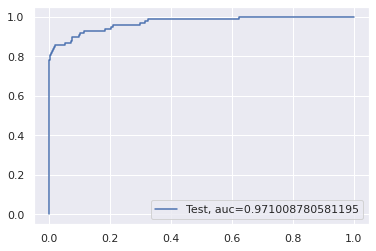

l1 roc_value: 0.8643515147735381
l1 threshold: 0.031293258183148175
ROC for the test dataset 86.4%


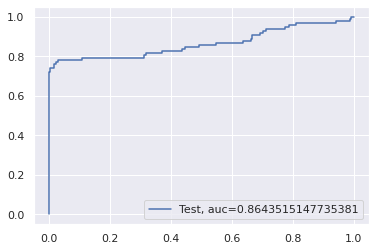

Time Taken by Model: --- 372.9225778579712 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9992450975228665
Confusion Matrix


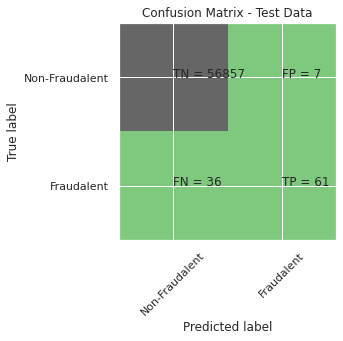

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.63      0.74        97

    accuracy                           1.00     56961
   macro avg       0.95      0.81      0.87     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8657987188821656
KNN threshold: 0.2
ROC for the test dataset 86.6%


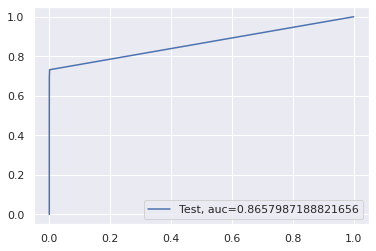

Time Taken by Model: --- 172.62866473197937 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9991924299081828
Confusion Matrix


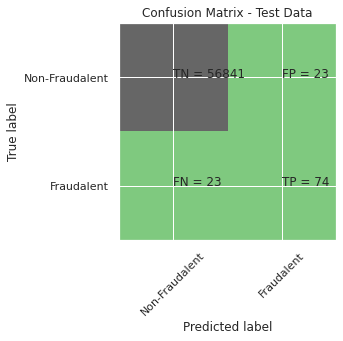

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.76      0.76        97

    accuracy                           1.00     56961
   macro avg       0.88      0.88      0.88     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8812410620529214
Tree threshold: 1.0
ROC for the test dataset 88.1%


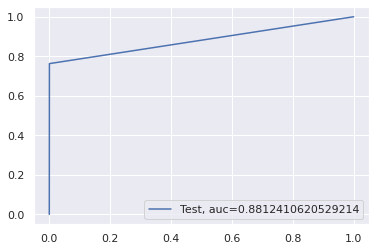

entropy score: 0.9992099857797441
Confusion Matrix


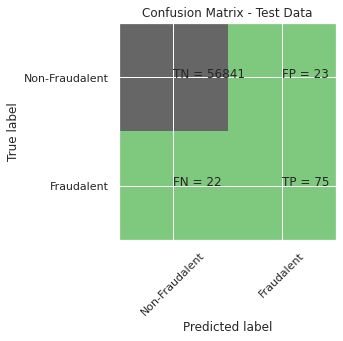

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.77      0.77        97

    accuracy                           1.00     56961
   macro avg       0.88      0.89      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.886395701228179
Tree threshold: 1.0
ROC for the test dataset 88.6%


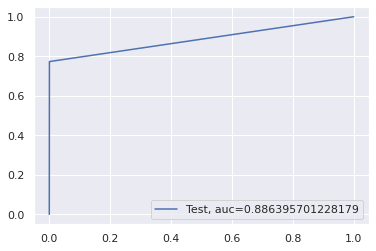

Time Taken by Model: --- 37.03471755981445 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995259914678464
Confusion Matrix


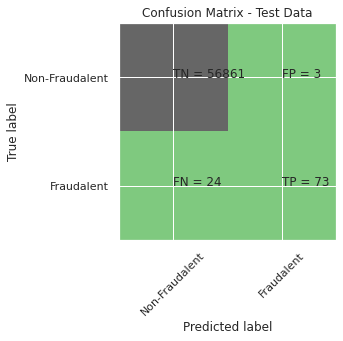

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.75      0.84        97

    accuracy                           1.00     56961
   macro avg       0.98      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9156050210594713
Random Forest threshold: 0.01
ROC for the test dataset 91.6%


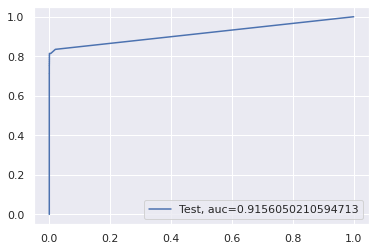

Time Taken by Model: --- 239.6079421043396 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


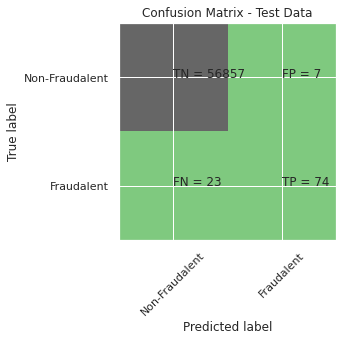

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.76      0.83        97

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9648215637672668
XGBoost threshold: 0.0019843471236526966
ROC for the test dataset 96.5%


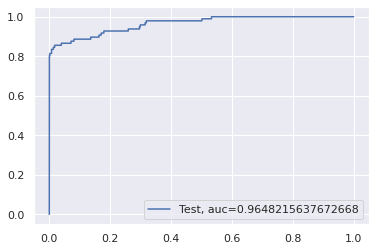

Time Taken by Model: --- 56.43718361854553 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9983673039448043
Confusion Matrix


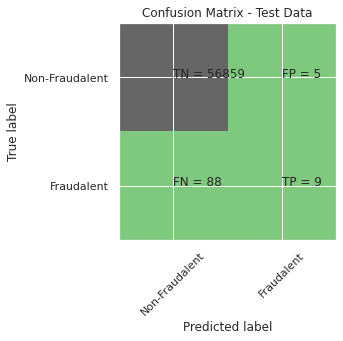

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.64      0.09      0.16        97

    accuracy                           1.00     56961
   macro avg       0.82      0.55      0.58     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.48456744687269754
SVM threshold: 0.004431017688405893
ROC for the test dataset 48.5%


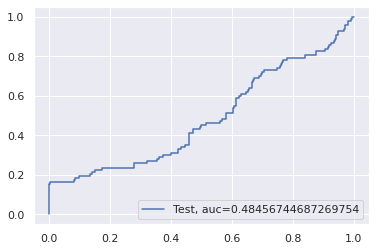

Time Taken by Model: --- 191.02582144737244 seconds ---


In [49]:
# Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [50]:
df_Results

Data_Imbalance_Handiling  ... threshold
0                Power Transformer  ...  0.001289
1                Power Transformer  ...  0.002676
2                Power Transformer  ...  0.200000
3                Power Transformer  ...  1.000000
4                Power Transformer  ...  1.000000
5                Power Transformer  ...  0.010000
6                Power Transformer  ...  0.000756
7                Power Transformer  ...  0.001385
8   RepeatedKFold Cross Validation  ...  0.002072
9   RepeatedKFold Cross Validation  ...  0.031293
10  RepeatedKFold Cross Validation  ...  0.200000
11  RepeatedKFold Cross Validation  ...  1.000000
12  RepeatedKFold Cross Validation  ...  1.000000
13  RepeatedKFold Cross Validation  ...  0.010000
14  RepeatedKFold Cross Validation  ...  0.001984
15  RepeatedKFold Cross Validation  ...  0.004431

[16 rows x 5 columns]

**XGBoost with Repeated KFold cross validation has provided with best results with ROC_Value of 0.977785**

In [51]:
# Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']

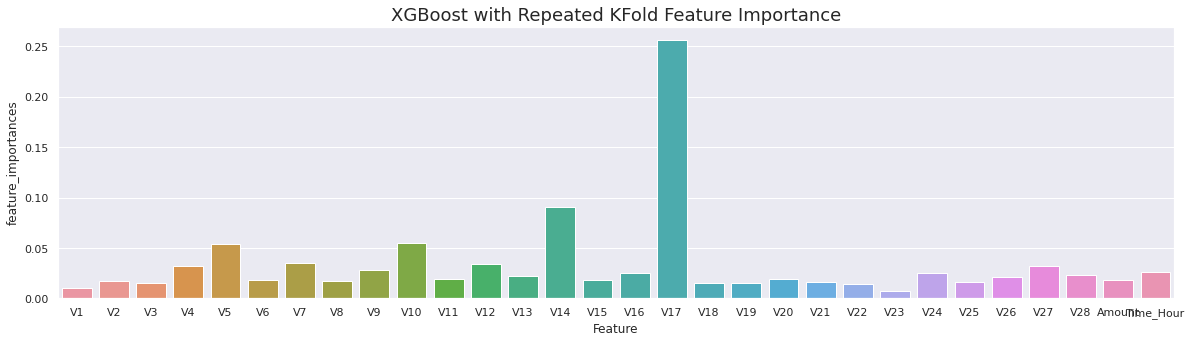

In [52]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

In [53]:
# Perfroming StratifiedKFold

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


Similarly exploring other algorithms by building models:
KNN, SVM, Decision Tree, Random Forest, XGBoost

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.982552383813862
Max auc_roc for l1: 0.9532044417995286
Parameters for l2 regularisations
[[ 6.85139233e-03  6.17754487e-02 -6.71812892e-02  2.18613707e-01
   5.41818363e-02 -3.20377133e-02 -2.28974175e-02 -1.14988071e-01
  -6.93795526e-02 -1.63673872e-01  1.28016335e-01 -1.92133511e-01
  -3.69083488e-02 -3.60608541e-01  3.48475228e-03 -8.79624763e-02
  -7.27253829e-02 -7.05776486e-04  3.90161817e-03 -2.80743299e-02
   3.81909632e-02  2.33588614e-02 -1.16098485e-02 -9.98603232e-03
  -6.55263654e-03  6.29741877e-03 -1.01442016e-02 -1.67911649e-03
   4.00150036e-04  3.10464020e-04]]
[-7.42734858]
{1: array([[0.69244522, 0.69421053, 0.71448798, 0.83769702, 0.95579612,
        0.97136042, 0.9891556 , 0.99473675, 0.99129968, 0.99109226,
        0.99109226, 0.99109226, 0.99109226, 0.99109226, 0.99109226,
        0.99109226, 0.99109226, 0.99109226, 0.99109226, 0.99109226],
       [0.60698465, 0.60863434, 0.6291165 , 0.7688

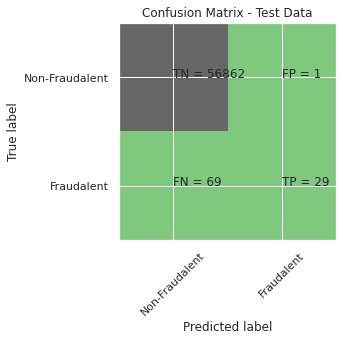

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.998630642018223
Confusion Matrix


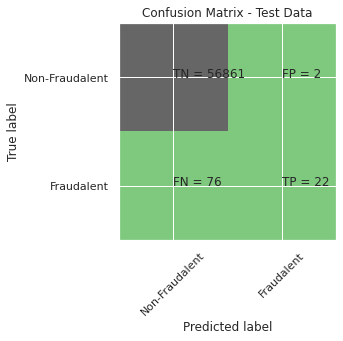

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.92      0.22      0.36        98

    accuracy                           1.00     56961
   macro avg       0.96      0.61      0.68     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9833392970645163
l2 threshold: 0.001569008833684328
ROC for the test dataset 98.3%


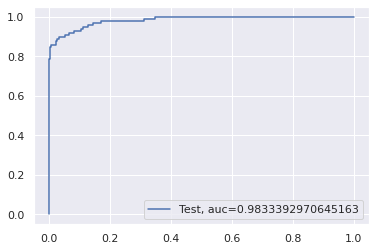

l1 roc_value: 0.9234125917394727
l1 threshold: 0.004244430667996755
ROC for the test dataset 92.3%


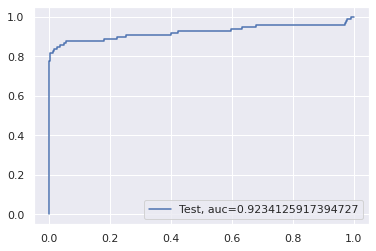

Time Taken by Model: --- 375.89320039749146 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9991924299081828
Confusion Matrix


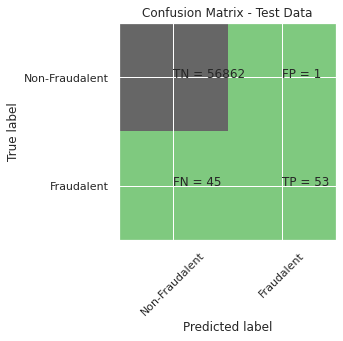

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8057457828285457
KNN threshold: 0.2
ROC for the test dataset 80.6%


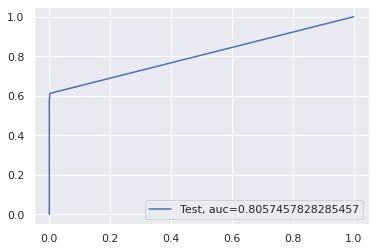

Time Taken by Model: --- 173.9582965373993 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.998841312476958
Confusion Matrix


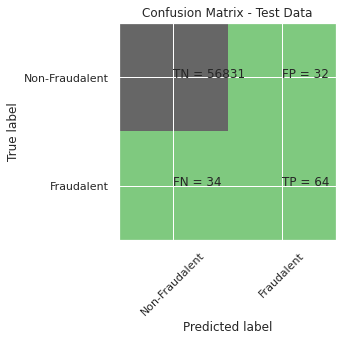

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8262492341959029
Tree threshold: 1.0
ROC for the test dataset 82.6%


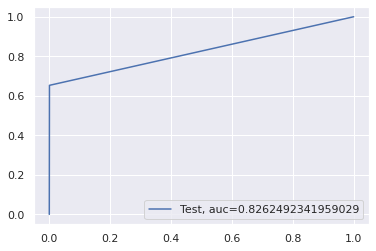

entropy score: 0.9990168711925703
Confusion Matrix


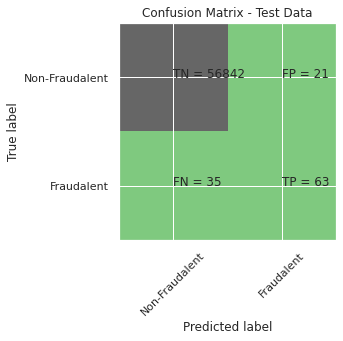

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212439170839185
Tree threshold: 1.0
ROC for the test dataset 82.1%


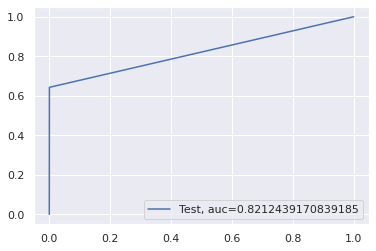

Time Taken by Model: --- 37.72136616706848 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


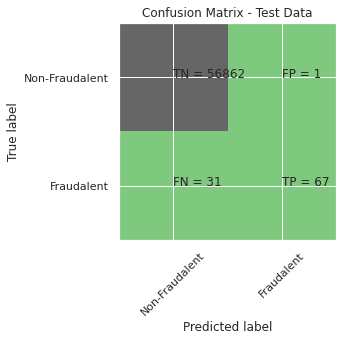

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9464721329855826
Random Forest threshold: 0.01
ROC for the test dataset 94.6%


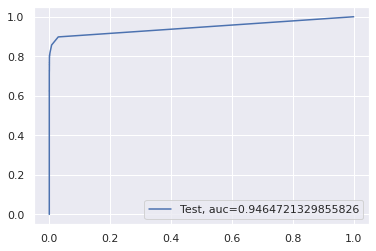

Time Taken by Model: --- 243.8199861049652 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9993855444953564
Confusion Matrix


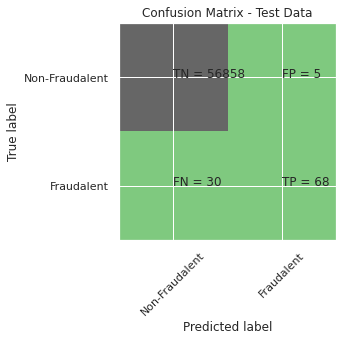

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.69      0.80        98

    accuracy                           1.00     56961
   macro avg       0.97      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9781480694558744
XGBoost threshold: 0.002443221863359213
ROC for the test dataset 97.8%


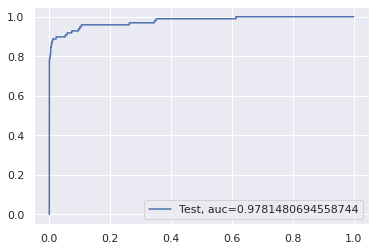

Time Taken by Model: --- 56.62542128562927 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9982795245869981
Confusion Matrix


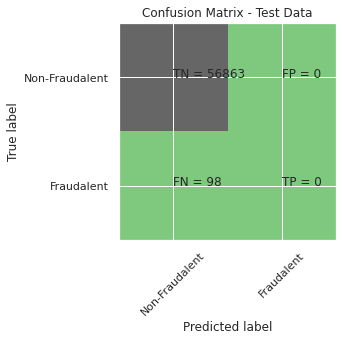

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.40177034885494567
SVM threshold: 0.004351712565512817
ROC for the test dataset 40.2%


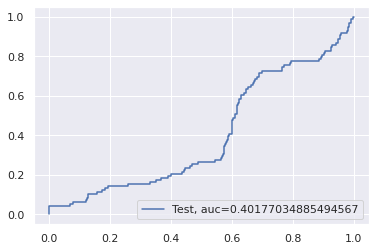

Time Taken by Model: --- 192.29022526741028 seconds ---


In [54]:
# Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [55]:
df_Results

Data_Imbalance_Handiling  ... threshold
0                  Power Transformer  ...  0.001289
1                  Power Transformer  ...  0.002676
2                  Power Transformer  ...  0.200000
3                  Power Transformer  ...  1.000000
4                  Power Transformer  ...  1.000000
5                  Power Transformer  ...  0.010000
6                  Power Transformer  ...  0.000756
7                  Power Transformer  ...  0.001385
8     RepeatedKFold Cross Validation  ...  0.002072
9     RepeatedKFold Cross Validation  ...  0.031293
10    RepeatedKFold Cross Validation  ...  0.200000
11    RepeatedKFold Cross Validation  ...  1.000000
12    RepeatedKFold Cross Validation  ...  1.000000
13    RepeatedKFold Cross Validation  ...  0.010000
14    RepeatedKFold Cross Validation  ...  0.001984
15    RepeatedKFold Cross Validation  ...  0.004431
16  StratifiedKFold Cross Validation  ...  0.001569
17  StratifiedKFold Cross Validation  ...  0.004244
18  StratifiedKFold Cross Validation  ...  0.200000
19  StratifiedKFold Cross Validation  ...  1.000000
20  StratifiedKFold Cross Validation  ...  1.000000
21  StratifiedKFold Cross Validation  ...  0.010000
22  StratifiedKFold Cross Validation  ...  0.002443
23  StratifiedKFold Cross Validation  ...  0.004352

[24 rows x 5 columns]

**Logistic Regression with L2 Regularisation for StratifiedFold cross validation provided best results**

In [56]:
# Applying the best hyperparameter on the model
# Predicting on the test dataset

# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )


searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 


# Finding predicted values
y_pred_l2 = searchCV_l2.predict(X_test)


# Finding predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))

Max auc_roc for l2: 0.9860157961461928
Parameters for l2 regularisations
[[ 2.05494512e-02  3.27890625e-02 -8.96514836e-02  2.38302750e-01
   8.29640042e-02 -4.90363237e-02 -3.31411706e-02 -1.08612881e-01
  -9.26053454e-02 -1.75808446e-01  1.35492913e-01 -2.08141147e-01
  -4.34399635e-02 -3.78889848e-01 -1.11305988e-02 -1.04749939e-01
  -1.14544376e-01 -8.46144242e-03  1.49894309e-02 -5.86707388e-03
   3.98051253e-02  2.46455931e-02  1.95896795e-03 -1.57936078e-02
  -7.89511943e-03  5.19255364e-03 -3.25772934e-03 -2.37002046e-04
   3.01640888e-04  4.53251460e-03]]
[-7.50114736]
{1: array([[0.582166  , 0.58434192, 0.6102234 , 0.77826009, 0.94270322,
        0.98595298, 0.99602302, 0.9940266 , 0.9941426 , 0.99499001,
        0.99342462, 0.99342462, 0.99342462, 0.99342462, 0.99342462,
        0.99342462, 0.99342462, 0.99342462, 0.99342462, 0.99342462],
       [0.56080922, 0.56256092, 0.57926348, 0.72051132, 0.88967906,
        0.93826774, 0.9754206 , 0.97876629, 0.97975913, 0.98089289,
  

In [57]:

searchCV_l2.coef_

array([[ 2.05494512e-02,  3.27890625e-02, -8.96514836e-02,
         2.38302750e-01,  8.29640042e-02, -4.90363237e-02,
        -3.31411706e-02, -1.08612881e-01, -9.26053454e-02,
        -1.75808446e-01,  1.35492913e-01, -2.08141147e-01,
        -4.34399635e-02, -3.78889848e-01, -1.11305988e-02,
        -1.04749939e-01, -1.14544376e-01, -8.46144242e-03,
         1.49894309e-02, -5.86707388e-03,  3.98051253e-02,
         2.46455931e-02,  1.95896795e-03, -1.57936078e-02,
        -7.89511943e-03,  5.19255364e-03, -3.25772934e-03,
        -2.37002046e-04,  3.01640888e-04,  4.53251460e-03]])

In [58]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

coefficients

Feature  Importance Coefficient
0          V1                0.020549
1          V2                0.032789
2          V3               -0.089651
3          V4                0.238303
4          V5                0.082964
5          V6               -0.049036
6          V7               -0.033141
7          V8               -0.108613
8          V9               -0.092605
9         V10               -0.175808
10        V11                0.135493
11        V12               -0.208141
12        V13               -0.043440
13        V14               -0.378890
14        V15               -0.011131
15        V16               -0.104750
16        V17               -0.114544
17        V18               -0.008461
18        V19                0.014989
19        V20               -0.005867
20        V21                0.039805
21        V22                0.024646
22        V23                0.001959
23        V24               -0.015794
24        V25               -0.007895
25        V26                0.005193
26        V27               -0.003258
27        V28               -0.000237
28     Amount                0.000302
29  Time_Hour                0.004533

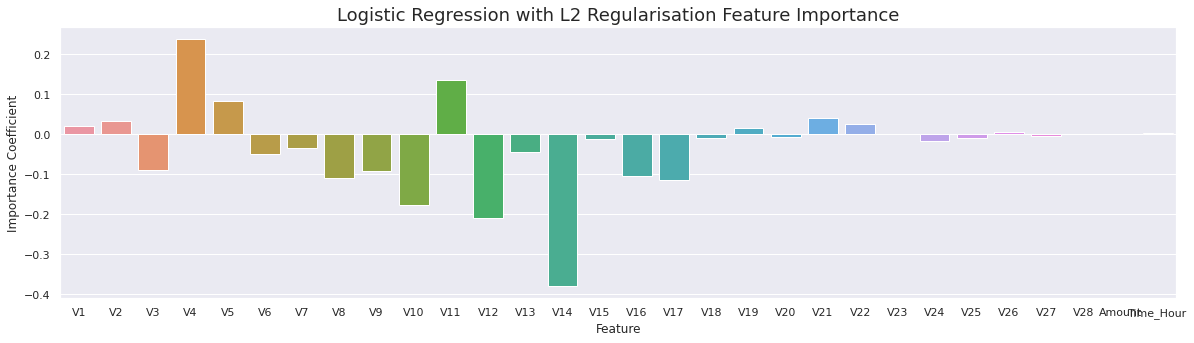

In [59]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()

**V4, V11, v5 has + ve imporatnce. V14, V12, V10 seems to have -ve impact on the predictaions**

In [60]:
# Undersampling the models

from imblearn.under_sampling import RandomUnderSampler
#Define Oversampler
RUS = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_Under, y_Under = RUS.fit_resample(X_train, y_train)
#Create Dataframe
X_Under = pd.DataFrame(data=X_Under,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9852039399380755
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[-0.06239522  0.02964083 -0.15458348  0.4346342   0.07594658 -0.06621697
  -0.06080172 -0.10085468 -0.06691098 -0.17926225  0.16986148 -0.30492248
  -0.06643847 -0.40953589 -0.02176238 -0.06802937 -0.03174481  0.01404217
  -0.0135326  -0.08796404  0.03278471  0.03439171  0.03142151 -0.02489672
   0.03359375 -0.01986313  0.03323305  0.00876466  0.00243843  0.01699142]]
[-3.39590317]
{1: array([[0.59455128, 0.59487179, 0.59871795, 0.63910256, 0.78461538,
        0.91730769, 0.9650641 , 0.98076923, 0.99455128, 0.98782051,
        0.98782051, 0.98782051, 0.98782051, 0.98782051, 0.98782051,
        0.98782051, 0.98782051, 0.98782051, 0.98782051, 0.98782051],
       [0.48375569, 0.48408057, 0.48895387, 0.54126056, 0.72449643,
        0.87524366, 0.93144899, 0.95614035, 0.96133853, 0.96101365,
        0.96101365, 0.96101365, 0.96101365, 0.96101365

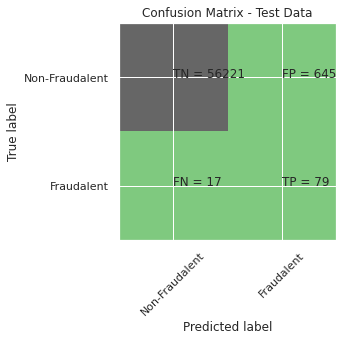

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.11      0.82      0.19        96

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.59     56962
weighted avg       1.00      0.99      0.99     56962

Accuarcy of Logistic model with l1 regularisation : 0.9983146659176293
Confusion Matrix


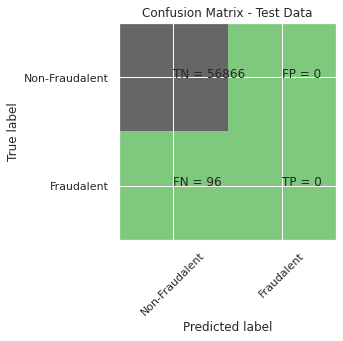

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9703780964606853
l2 threshold: 0.1534014427735688
ROC for the test dataset 97.0%


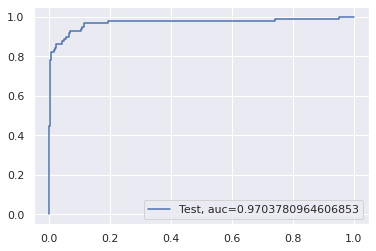

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


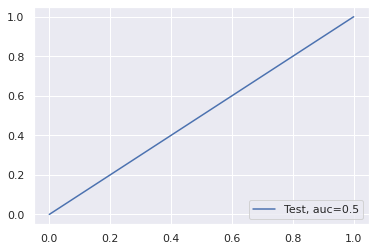

Time Taken by Model: --- 3.1238083839416504 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9533022014676451
Confusion Matrix


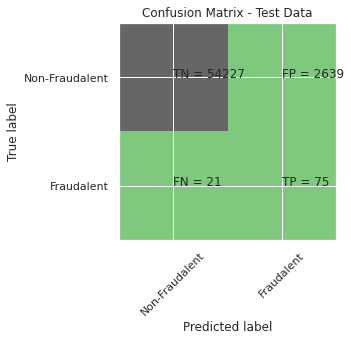

classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56866
           1       0.03      0.78      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.87      0.51     56962
weighted avg       1.00      0.95      0.97     56962

KNN roc_value: 0.9450316863327823
KNN threshold: 0.4
ROC for the test dataset 94.5%


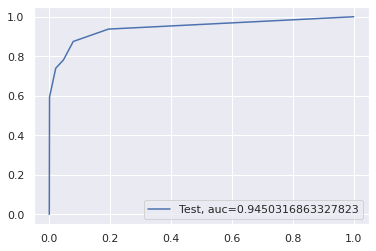

Time Taken by Model: --- 6.713480234146118 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9479126435167304
Confusion Matrix


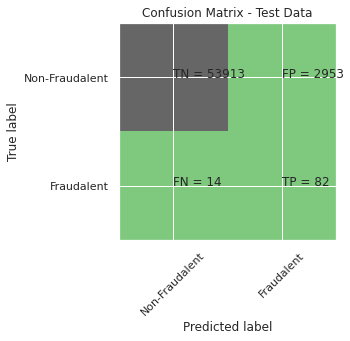

classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.85      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.95      0.97     56962

gini tree_roc_value: 0.9011187850971288
Tree threshold: 1.0
ROC for the test dataset 90.1%


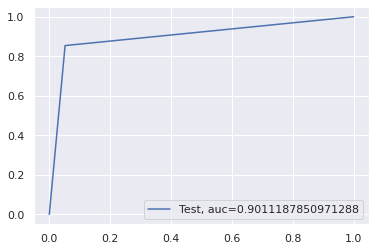

entropy score: 0.9446999754222113
Confusion Matrix


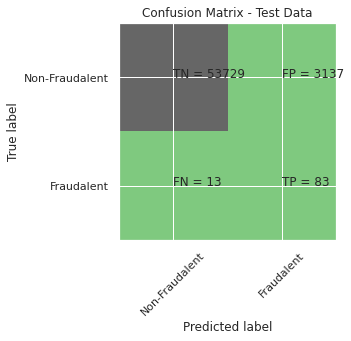

classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56866
           1       0.03      0.86      0.05        96

    accuracy                           0.94     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.94      0.97     56962

entropy tree_roc_value: 0.9047092800032827
Tree threshold: 1.0
ROC for the test dataset 90.5%


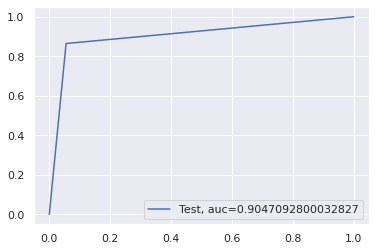

Time Taken by Model: --- 1.180771827697754 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9889926617745164
Confusion Matrix


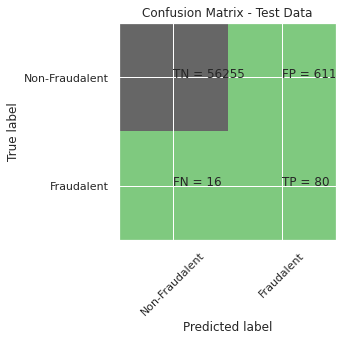

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.12      0.83      0.20        96

    accuracy                           0.99     56962
   macro avg       0.56      0.91      0.60     56962
weighted avg       1.00      0.99      0.99     56962

Random Forest roc_value: 0.9689084499818286
Random Forest threshold: 0.43
ROC for the test dataset 96.9%


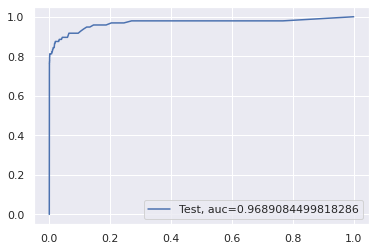

Time Taken by Model: --- 2.980072259902954 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9865173273410344
Confusion Matrix


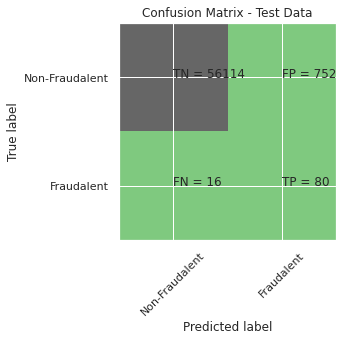

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.10      0.83      0.17        96

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.58     56962
weighted avg       1.00      0.99      0.99     56962

XGboost roc_value: 0.9805534245712142
XGBoost threshold: 0.1315755695104599
ROC for the test dataset 98.1%


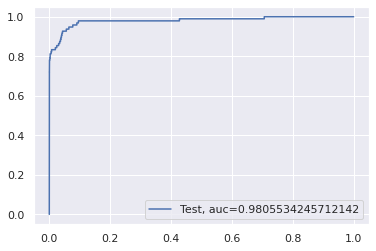

Time Taken by Model: --- 1.4170141220092773 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.6301569467364208
Confusion Matrix


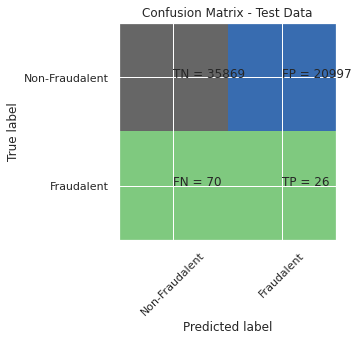

classification Report
              precision    recall  f1-score   support

           0       1.00      0.63      0.77     56866
           1       0.00      0.27      0.00        96

    accuracy                           0.63     56962
   macro avg       0.50      0.45      0.39     56962
weighted avg       1.00      0.63      0.77     56962

SVM roc_value: 0.44441556319534814
SVM threshold: 0.3886518675492312
ROC for the test dataset 44.4%


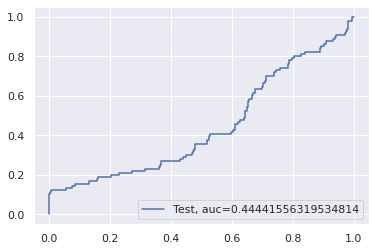

Time Taken by Model: --- 5.160846471786499 seconds ---


In [61]:
# Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Random Undersampling", X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [62]:
df_Results

Data_Imbalance_Handiling  ... threshold
0                  Power Transformer  ...  0.001289
1                  Power Transformer  ...  0.002676
2                  Power Transformer  ...  0.200000
3                  Power Transformer  ...  1.000000
4                  Power Transformer  ...  1.000000
5                  Power Transformer  ...  0.010000
6                  Power Transformer  ...  0.000756
7                  Power Transformer  ...  0.001385
8     RepeatedKFold Cross Validation  ...  0.002072
9     RepeatedKFold Cross Validation  ...  0.031293
10    RepeatedKFold Cross Validation  ...  0.200000
11    RepeatedKFold Cross Validation  ...  1.000000
12    RepeatedKFold Cross Validation  ...  1.000000
13    RepeatedKFold Cross Validation  ...  0.010000
14    RepeatedKFold Cross Validation  ...  0.001984
15    RepeatedKFold Cross Validation  ...  0.004431
16  StratifiedKFold Cross Validation  ...  0.001569
17  StratifiedKFold Cross Validation  ...  0.004244
18  StratifiedKFold Cross Validation  ...  0.200000
19  StratifiedKFold Cross Validation  ...  1.000000
20  StratifiedKFold Cross Validation  ...  1.000000
21  StratifiedKFold Cross Validation  ...  0.010000
22  StratifiedKFold Cross Validation  ...  0.002443
23  StratifiedKFold Cross Validation  ...  0.004352
24              Random Undersampling  ...  0.153401
25              Random Undersampling  ...  1.500000
26              Random Undersampling  ...  0.400000
27              Random Undersampling  ...  1.000000
28              Random Undersampling  ...  1.000000
29              Random Undersampling  ...  0.430000
30              Random Undersampling  ...  0.131576
31              Random Undersampling  ...  0.388652

[32 rows x 5 columns]

Undersampling impoved the XGBoost Results

## Model building with balancing Classes

#### Perform class balancing with
1. Random Oversampling
2. SMOTE
3. ADASYN

### Oversampling with RandomOverSampler and StratifiedKFold Cross Validation
We will use Random Oversampling method to handle the class imbalance


1.   Display class distibution with and without 
Random Oversampling.
2.   Use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets

Once we have train and test dataset, feed the data to below models:

1. Logistic Regression with L2 Regularisation
2. Logistic Regression with L1 Regularisation
3. KNN
4. Decision tree model with Gini criteria
5. Decision tree model with Entropy criteria
6. Random Forest
7. XGBoost

Once results are obtained for the above model, compare and select model which provided best results for the 'Random oversampling techinique'

In [63]:
"""
from imblearn.over_sampling import RandomOverSampler
#Define Oversampler
ROS = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = ROS.fit_resample(X_train, y_train)
"""

'\nfrom imblearn.over_sampling import RandomOverSampler\n#Define Oversampler\nROS = RandomOverSampler(sampling_strategy=0.5)\n# fit and apply the transform\nX_over, y_over = ROS.fit_resample(X_train, y_train)\n'

In [64]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9866258314747931
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.39326682  0.39938085  0.28833997  0.85065833  0.36503962 -0.49575954
  -0.37329994 -0.33614594 -0.24678931 -0.68388075  0.30482365 -0.92247601
  -0.31843369 -0.91308711  0.0088734  -0.56071206 -0.30921295 -0.12783065
   0.14046209 -0.7497889   0.07246672  0.53665153  0.15057675 -0.42616435
   0.19115573 -0.02129589 -0.40381348  0.1750137   0.00573692  0.03897564]]
[-5.1608008]
{1: array([[0.62946081, 0.75658218, 0.90343097, 0.95445386, 0.97605199,
        0.98396134, 0.98544942, 0.9858377 , 0.98597943, 0.98604512,
        0.98605787, 0.98605787, 0.98605787, 0.98605787, 0.98605787,
        0.98605787, 0.98605787, 0.98605787, 0.98605787, 0.98605787],
       [0.63143906, 0.75744676, 0.90498107, 0.95619548, 0.97690482,
        0.98438493, 0.98567869, 0.98598705, 0.98623787, 0.98633727,
        0.98634822, 0.98634822, 0.98634822, 0.98634822,

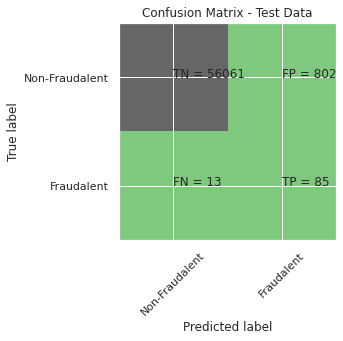

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.87      0.17        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.58     56961
weighted avg       1.00      0.99      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


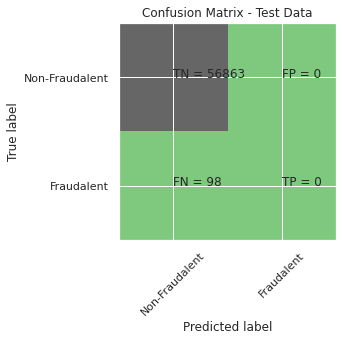

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9806297771909355
l2 threshold: 0.44629769847700945
ROC for the test dataset 98.1%


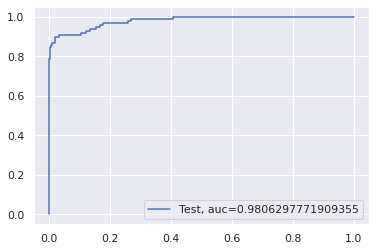

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


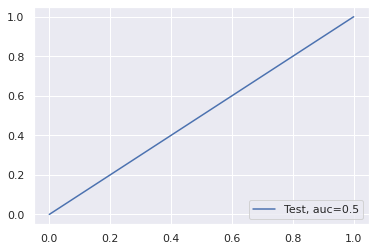

Time Taken by Model: --- 508.3265643119812 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9980688541282632
Confusion Matrix


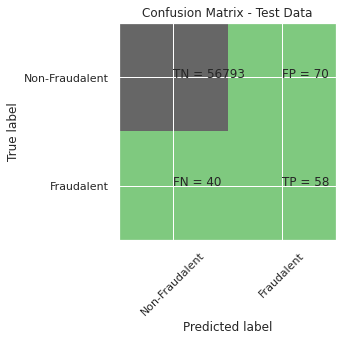

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.805604465728046
KNN threshold: 0.2
ROC for the test dataset 80.6%


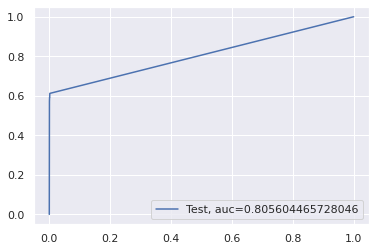

Time Taken by Model: --- 192.29146122932434 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9990870946788153
Confusion Matrix


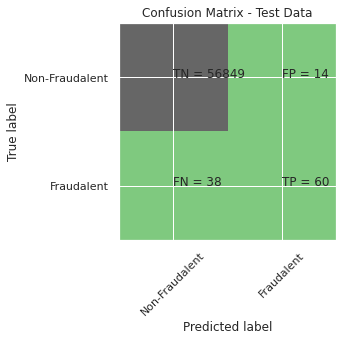

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.81      0.61      0.70        98

    accuracy                           1.00     56961
   macro avg       0.91      0.81      0.85     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8059993460831565
Tree threshold: 1.0
ROC for the test dataset 80.6%


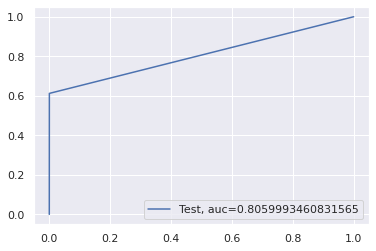

entropy score: 0.9990344270641316
Confusion Matrix


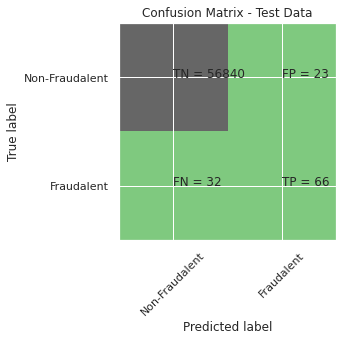

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.74      0.67      0.71        98

    accuracy                           1.00     56961
   macro avg       0.87      0.84      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.836532453404836
Tree threshold: 1.0
ROC for the test dataset 83.7%


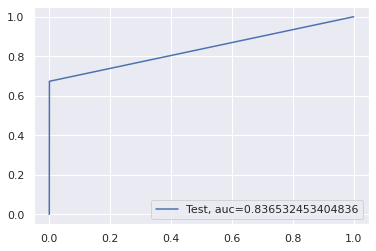

Time Taken by Model: --- 29.261620044708252 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


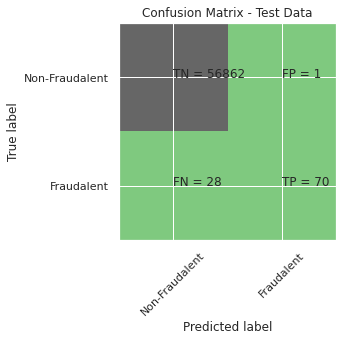

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.71      0.83        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9508761121880123
Random Forest threshold: 0.01
ROC for the test dataset 95.1%


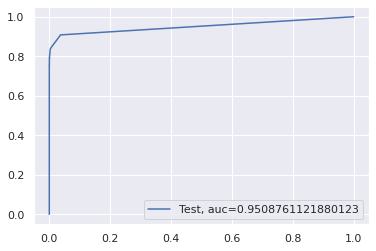

Time Taken by Model: --- 205.3097071647644 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9964888256877513
Confusion Matrix


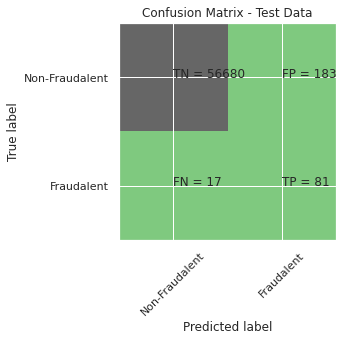

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.31      0.83      0.45        98

    accuracy                           1.00     56961
   macro avg       0.65      0.91      0.72     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.982067981510878
XGBoost threshold: 0.14717982709407806
ROC for the test dataset 98.2%


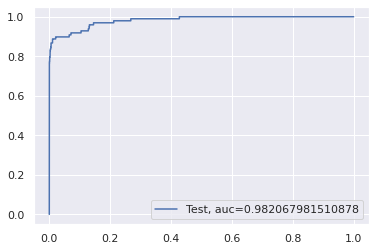

Time Taken by Model: --- 75.46346592903137 seconds ---
--------------------------------------------------------------------------------


In [65]:
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "
# Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handiling , X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [66]:
df_Results

Data_Imbalance_Handiling  ... threshold
0                              Power Transformer  ...  0.001289
1                              Power Transformer  ...  0.002676
2                              Power Transformer  ...  0.200000
3                              Power Transformer  ...  1.000000
4                              Power Transformer  ...  1.000000
5                              Power Transformer  ...  0.010000
6                              Power Transformer  ...  0.000756
7                              Power Transformer  ...  0.001385
8                 RepeatedKFold Cross Validation  ...  0.002072
9                 RepeatedKFold Cross Validation  ...  0.031293
10                RepeatedKFold Cross Validation  ...  0.200000
11                RepeatedKFold Cross Validation  ...  1.000000
12                RepeatedKFold Cross Validation  ...  1.000000
13                RepeatedKFold Cross Validation  ...  0.010000
14                RepeatedKFold Cross Validation  ...  0.001984
15                RepeatedKFold Cross Validation  ...  0.004431
16              StratifiedKFold Cross Validation  ...  0.001569
17              StratifiedKFold Cross Validation  ...  0.004244
18              StratifiedKFold Cross Validation  ...  0.200000
19              StratifiedKFold Cross Validation  ...  1.000000
20              StratifiedKFold Cross Validation  ...  1.000000
21              StratifiedKFold Cross Validation  ...  0.010000
22              StratifiedKFold Cross Validation  ...  0.002443
23              StratifiedKFold Cross Validation  ...  0.004352
24                          Random Undersampling  ...  0.153401
25                          Random Undersampling  ...  1.500000
26                          Random Undersampling  ...  0.400000
27                          Random Undersampling  ...  1.000000
28                          Random Undersampling  ...  1.000000
29                          Random Undersampling  ...  0.430000
30                          Random Undersampling  ...  0.131576
31                          Random Undersampling  ...  0.388652
32  Random Oversampling with StratifiedKFold CV   ...  0.446298
33  Random Oversampling with StratifiedKFold CV   ...  1.500000
34  Random Oversampling with StratifiedKFold CV   ...  0.200000
35  Random Oversampling with StratifiedKFold CV   ...  1.000000
36  Random Oversampling with StratifiedKFold CV   ...  1.000000
37  Random Oversampling with StratifiedKFold CV   ...  0.010000
38  Random Oversampling with StratifiedKFold CV   ...  0.147180

[39 rows x 5 columns]

Random Oversampling has +ve change in prediction for XGBoost

### Oversampling with SMOTE


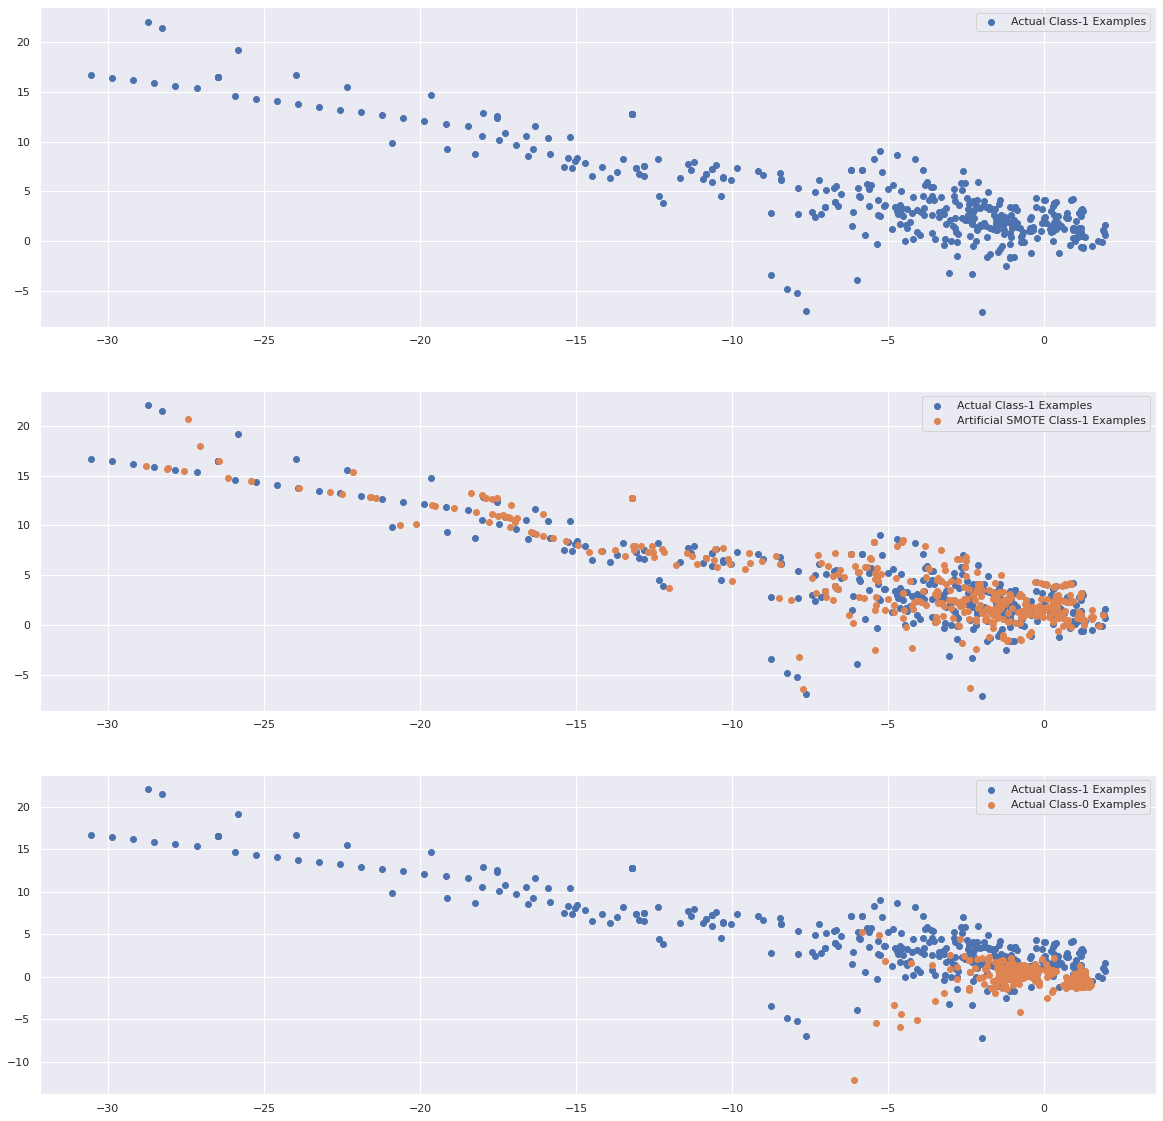

In [67]:
from imblearn import over_sampling
SMOTE = over_sampling.SMOTE(random_state=0)

X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train) 

#Create dataframe
#X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


#Create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [68]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9931097764111401
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.7732628   0.71963287  0.67449012  0.93817716  0.52161111 -0.92453533
  -0.69757323 -0.50072878 -0.39639681 -0.91309049  0.62482619 -1.29304859
  -0.21550507 -1.5144778   0.10885543 -0.77976472 -0.83913558 -0.42652265
   0.22281993 -1.08033762 -0.01509549  0.5741215   0.4155427  -0.89802921
   0.50130269  0.03836659 -0.19066733  0.8462861   0.00910223  0.03330456]]
[-5.5895278]
{1: array([[0.64885856, 0.7848513 , 0.9172895 , 0.96622762, 0.9856963 ,
        0.98987474, 0.99085632, 0.99170264, 0.99204533, 0.9921428 ,
        0.9921527 , 0.9921527 , 0.9921527 , 0.9921527 , 0.9921527 ,
        0.9921527 , 0.9921527 , 0.9921527 , 0.9921527 , 0.9921527 ],
       [0.64564205, 0.78391169, 0.91896288, 0.96868714, 0.98727477,
        0.99110178, 0.99198637, 0.99283415, 0.99319852, 0.99329555,
        0.99331059, 0.99331059, 0.99331059, 0.99331059,

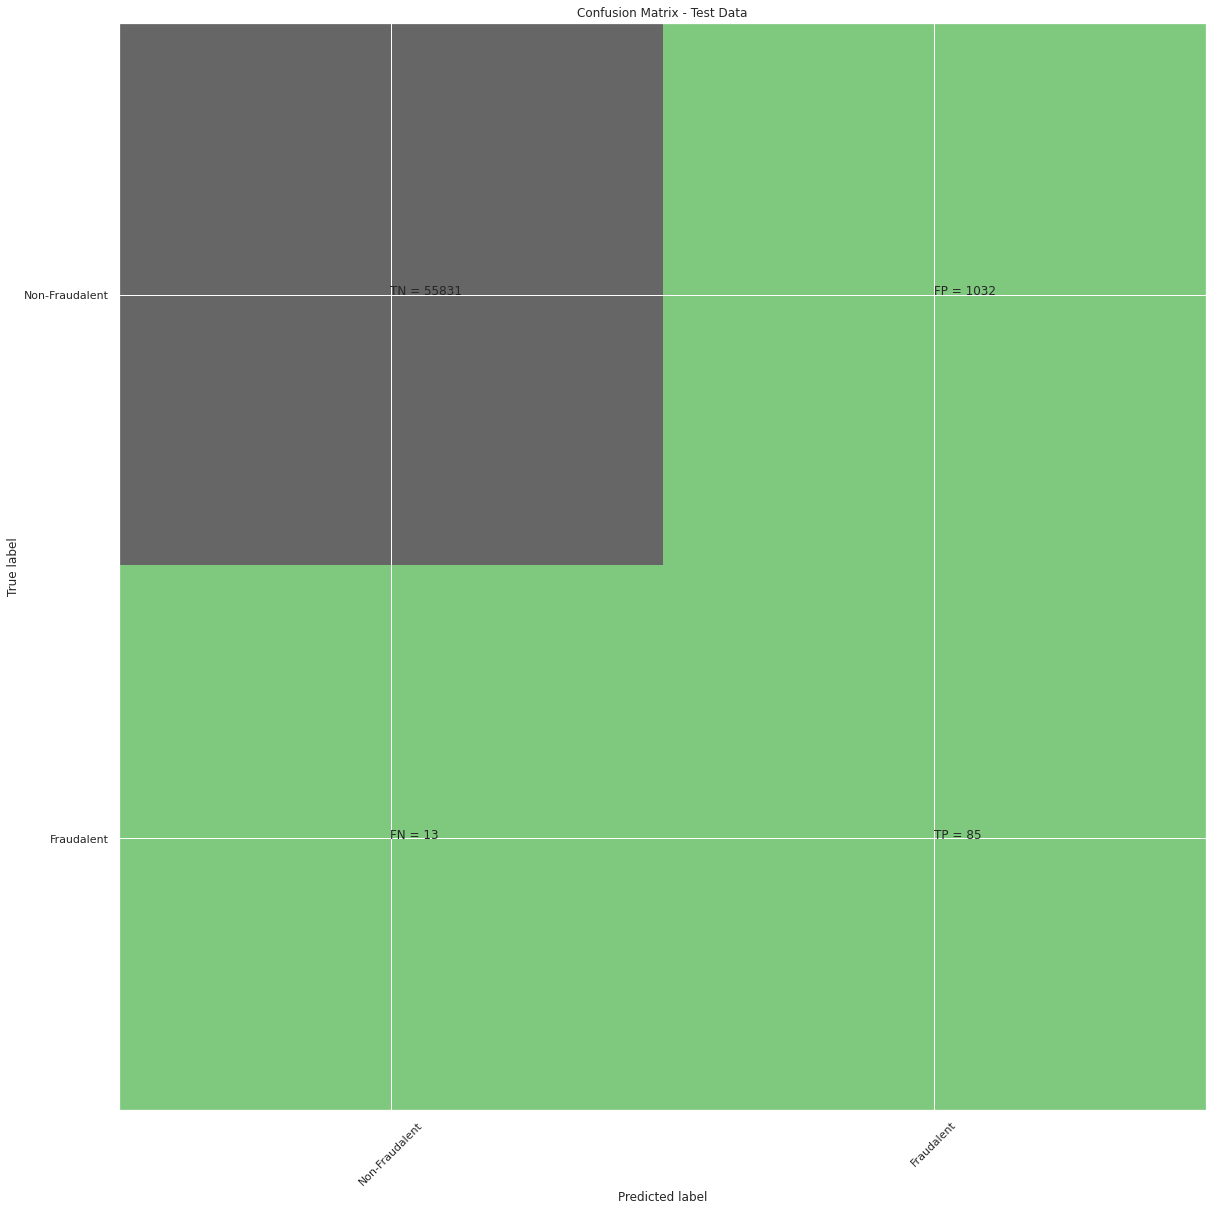

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.08      0.87      0.14        98

    accuracy                           0.98     56961
   macro avg       0.54      0.92      0.57     56961
weighted avg       1.00      0.98      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


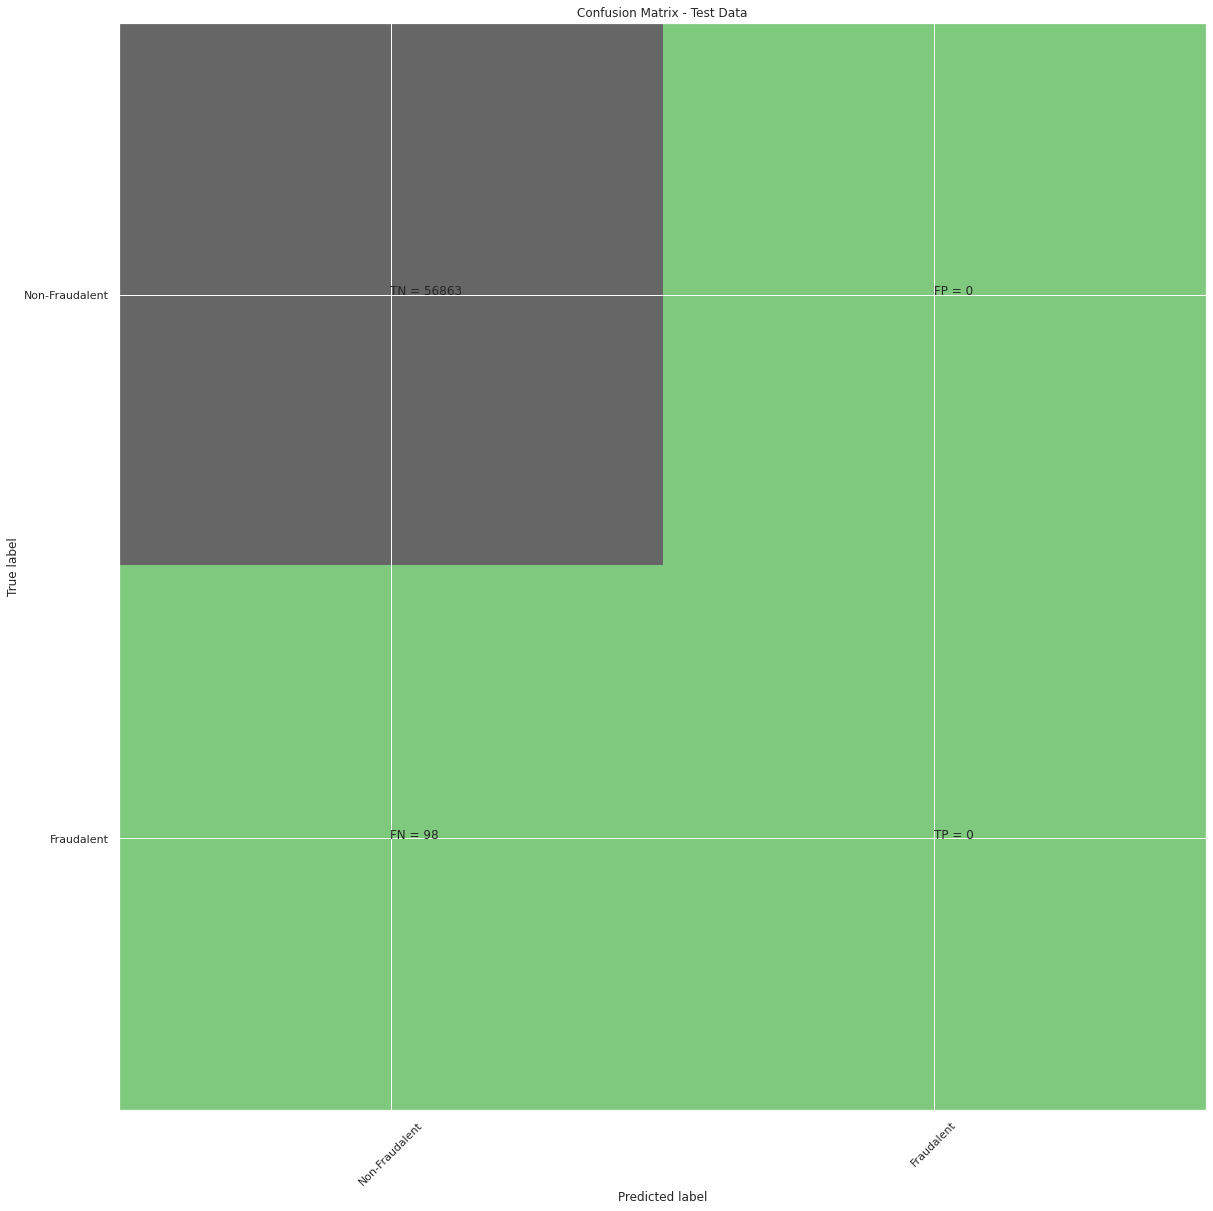

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9747225429397618
l2 threshold: 0.4466408116071014
ROC for the test dataset 97.5%


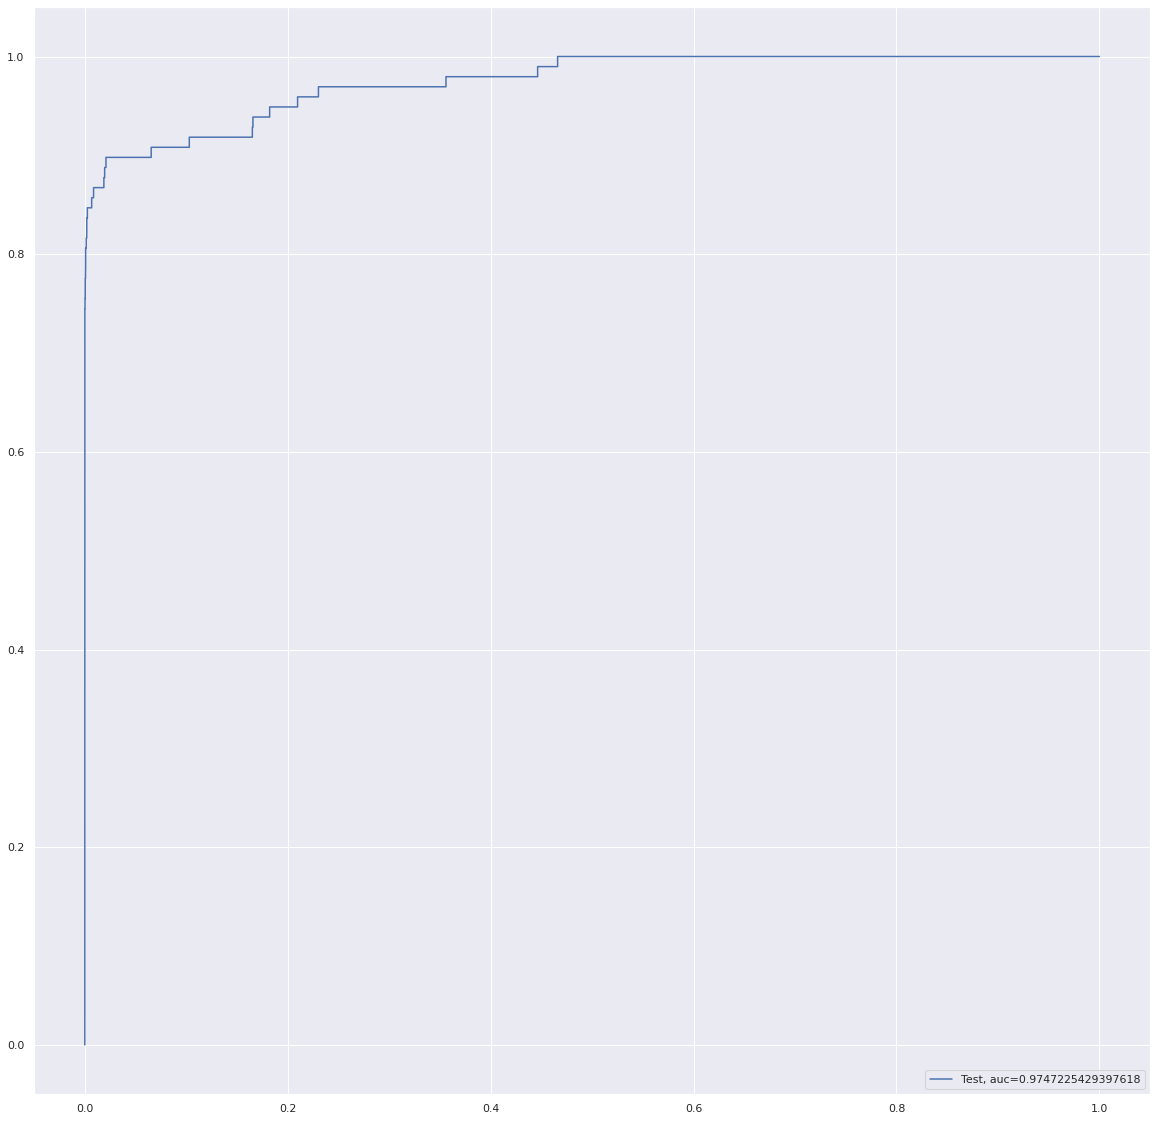

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


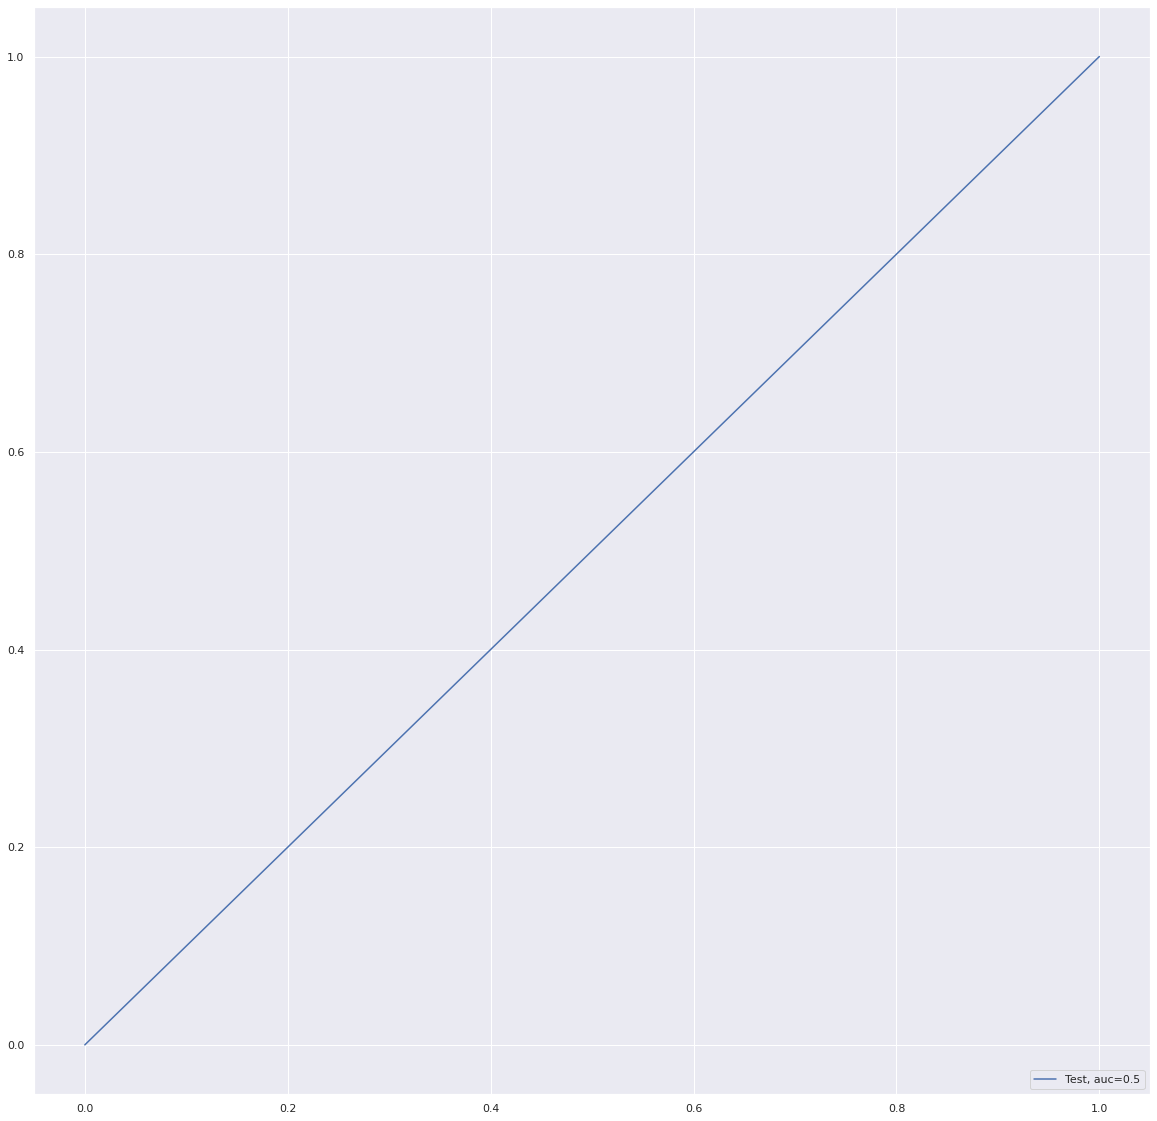

Time Taken by Model: --- 655.8478517532349 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9944699004582083
Confusion Matrix


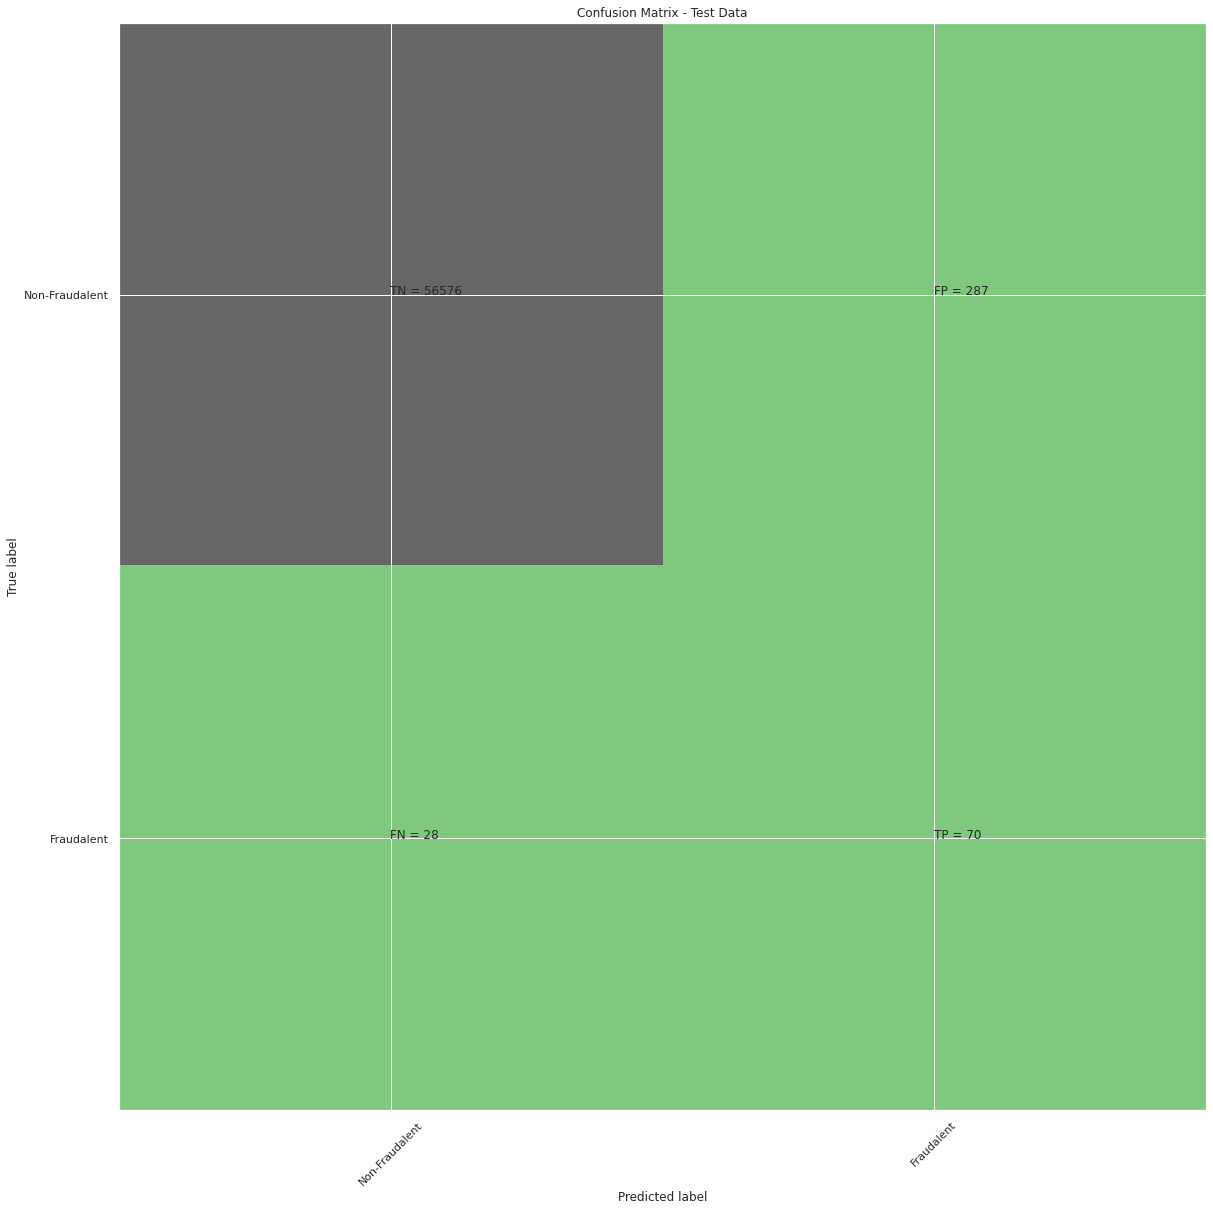

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.71      0.31        98

    accuracy                           0.99     56961
   macro avg       0.60      0.85      0.65     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8602128926417127
KNN threshold: 0.4
ROC for the test dataset 86.0%


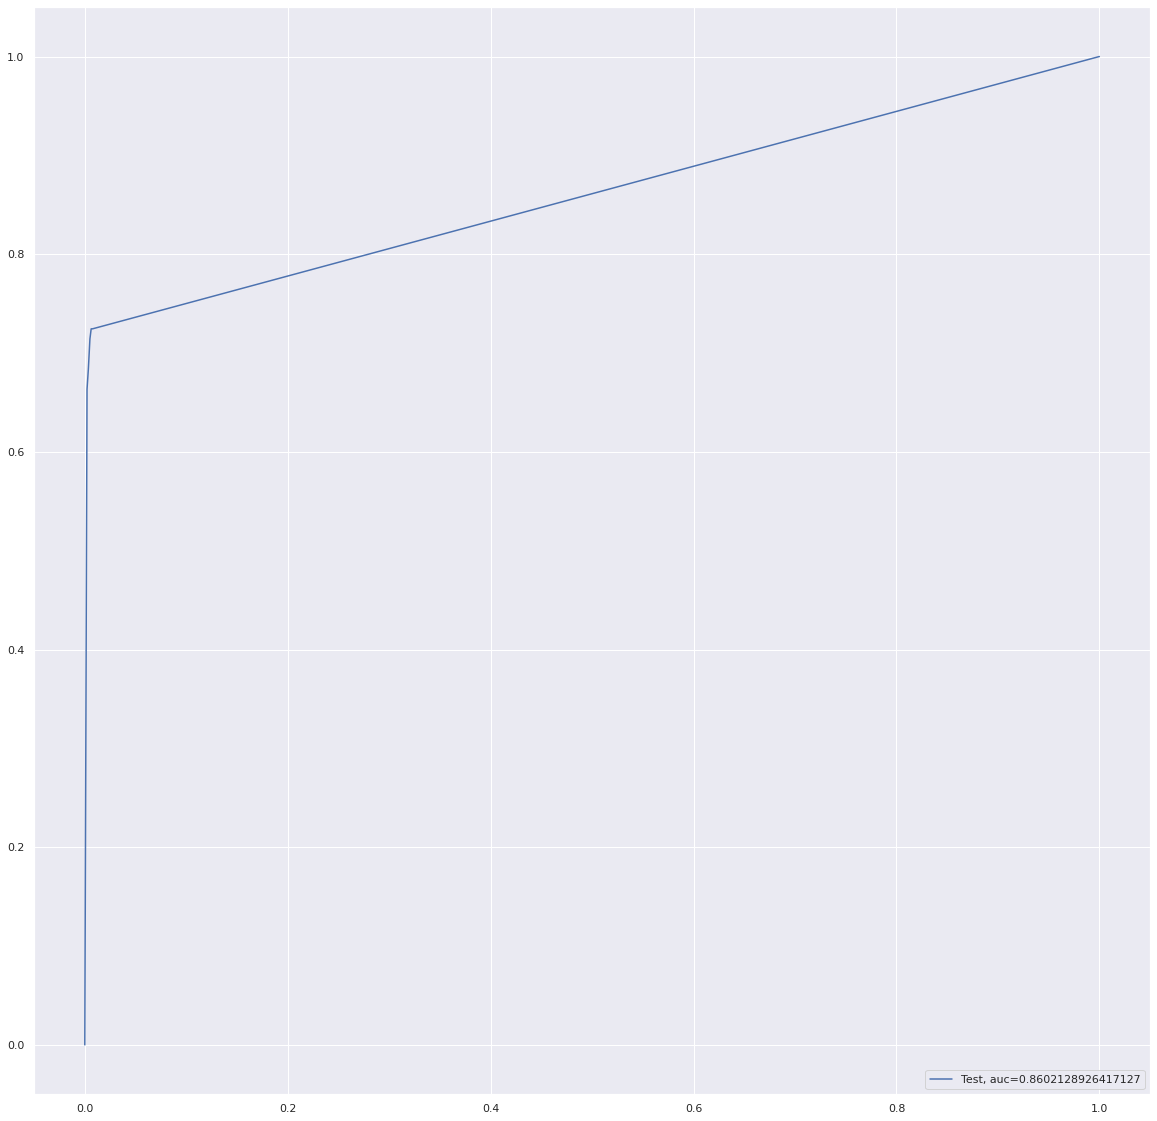

Time Taken by Model: --- 193.63600206375122 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9974719544951809
Confusion Matrix


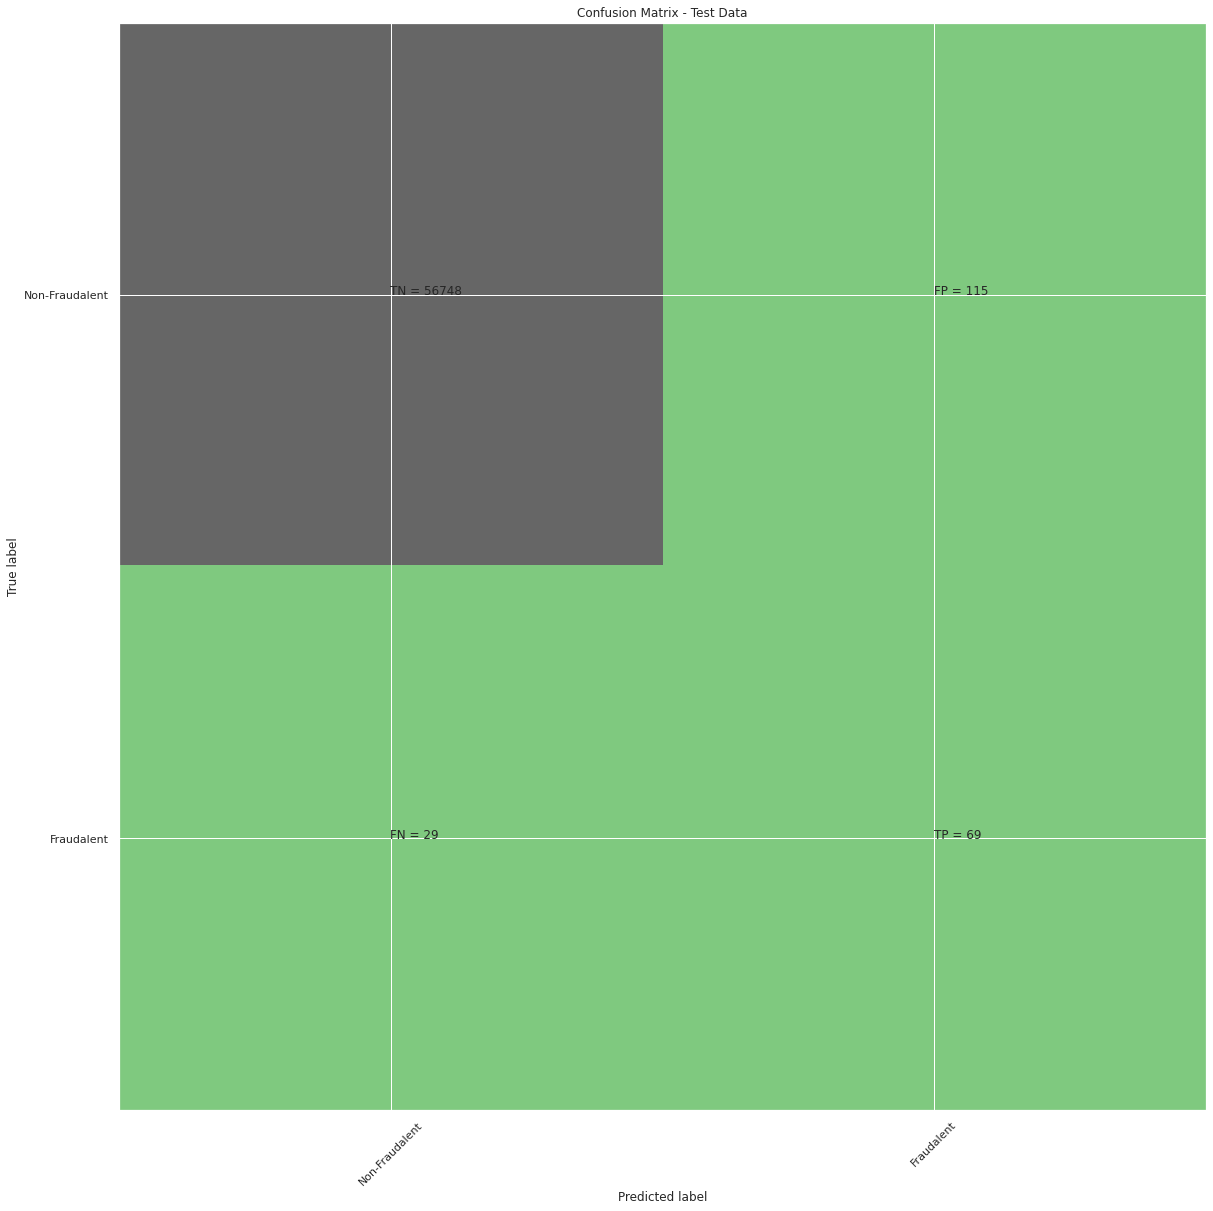

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.38      0.70      0.49        98

    accuracy                           1.00     56961
   macro avg       0.69      0.85      0.74     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.851029613962955
Tree threshold: 1.0
ROC for the test dataset 85.1%


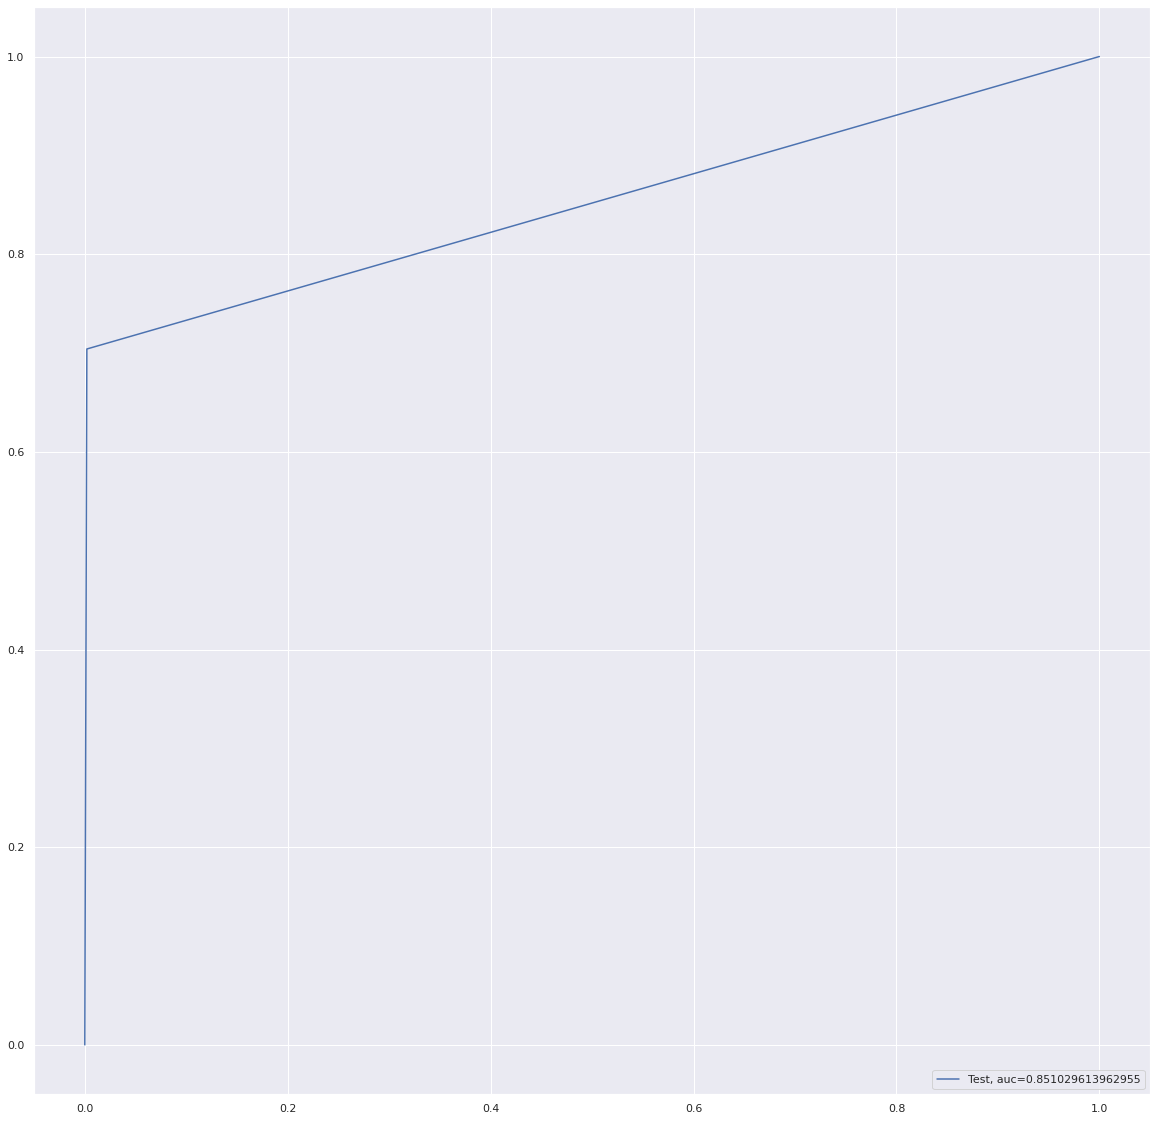

entropy score: 0.9929074278892576
Confusion Matrix


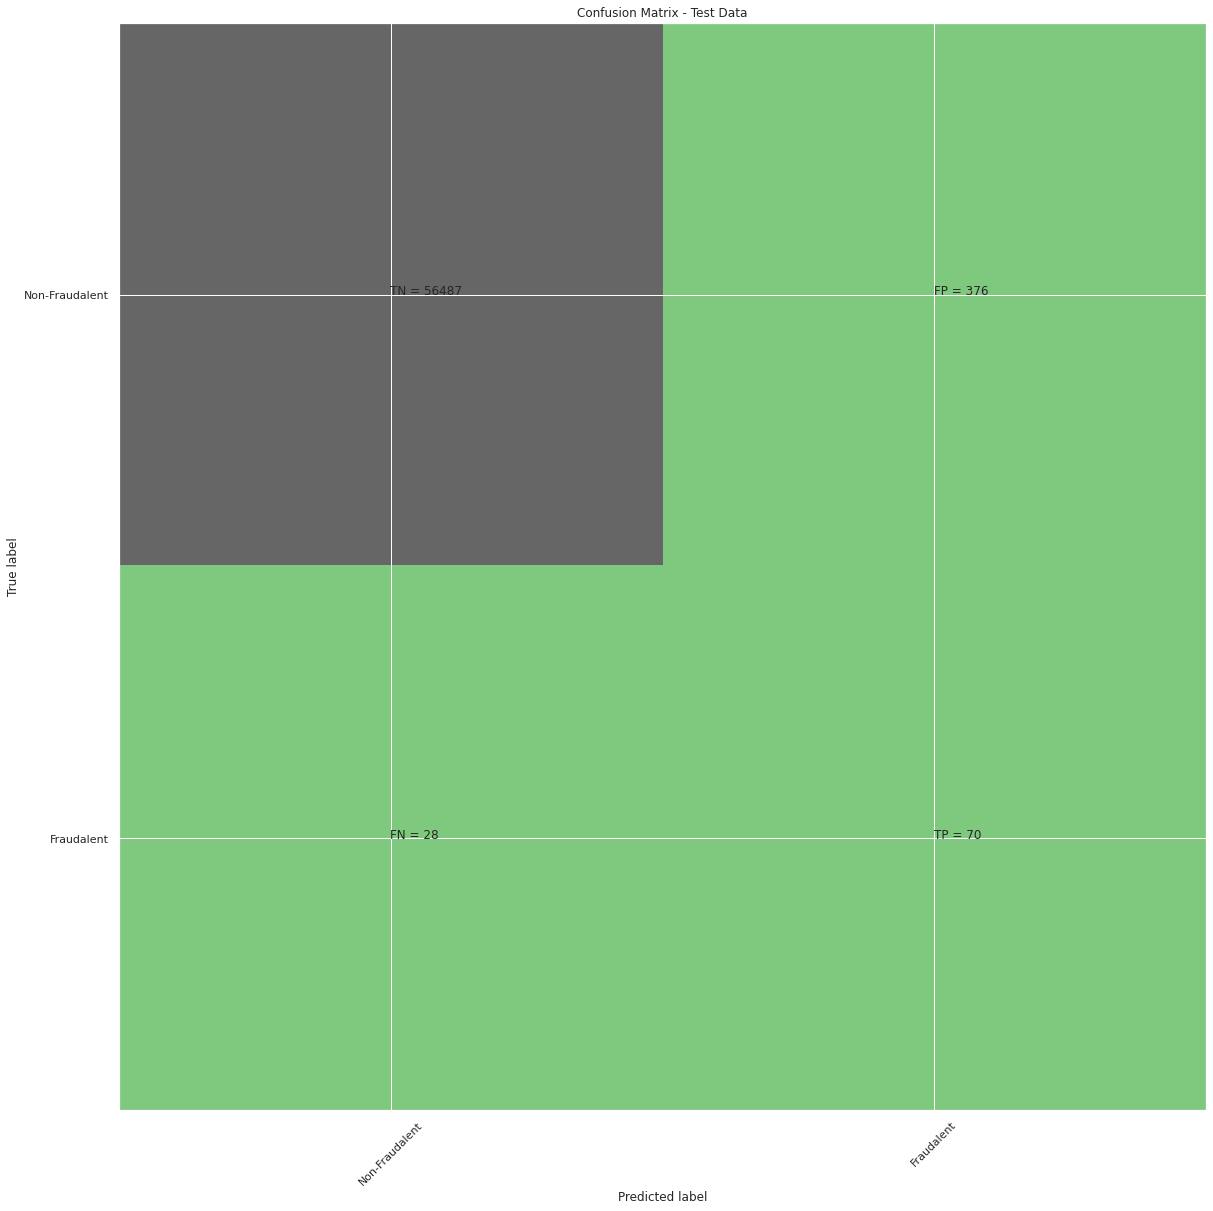

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.16      0.71      0.26        98

    accuracy                           0.99     56961
   macro avg       0.58      0.85      0.63     56961
weighted avg       1.00      0.99      1.00     56961

entropy tree_roc_value: 0.8538366650671664
Tree threshold: 1.0
ROC for the test dataset 85.4%


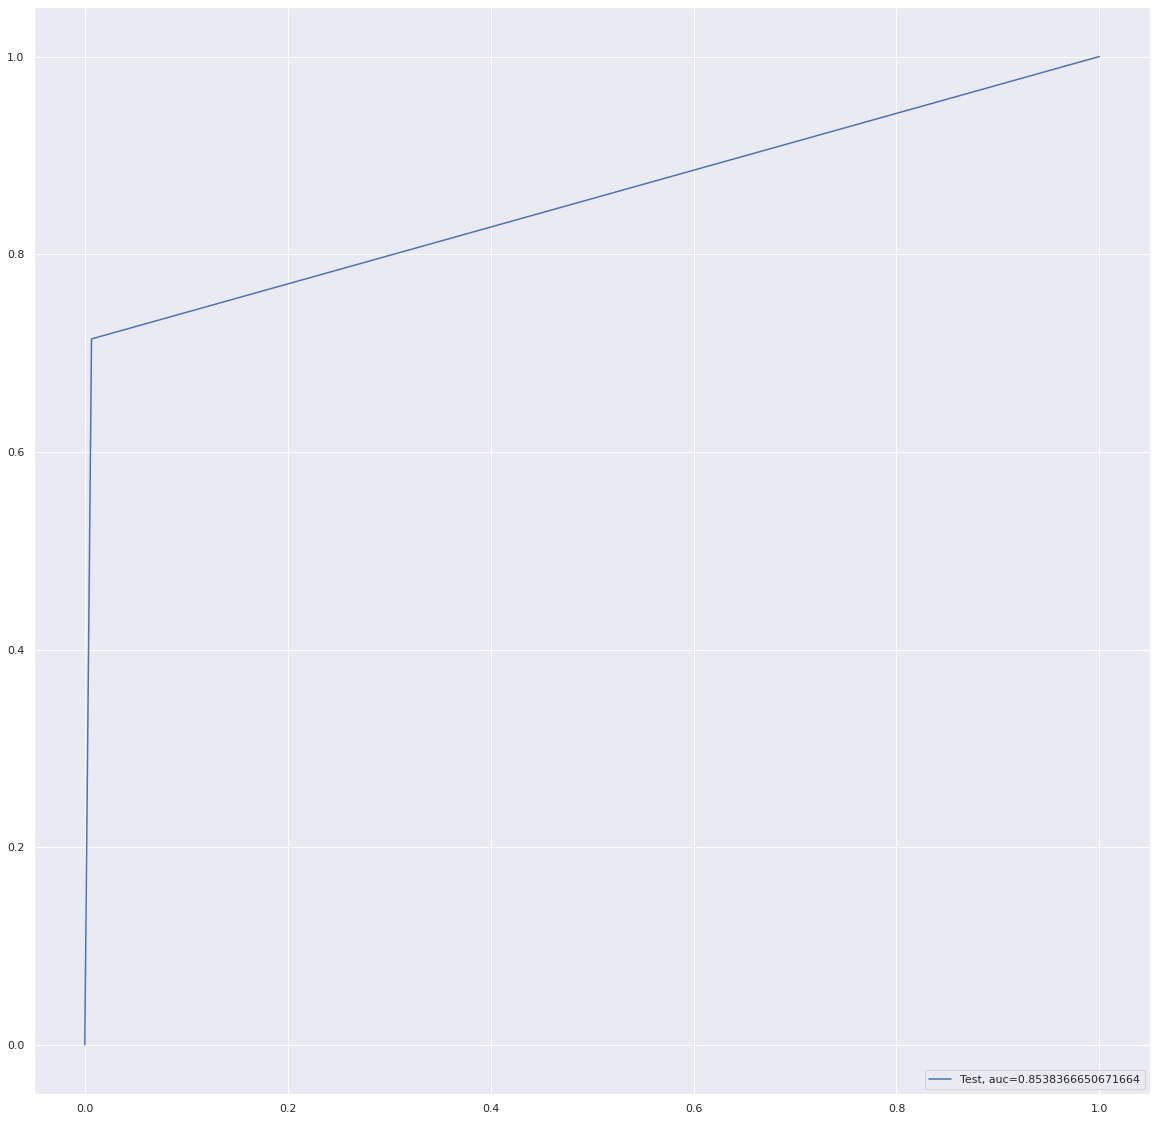

Time Taken by Model: --- 93.37067127227783 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


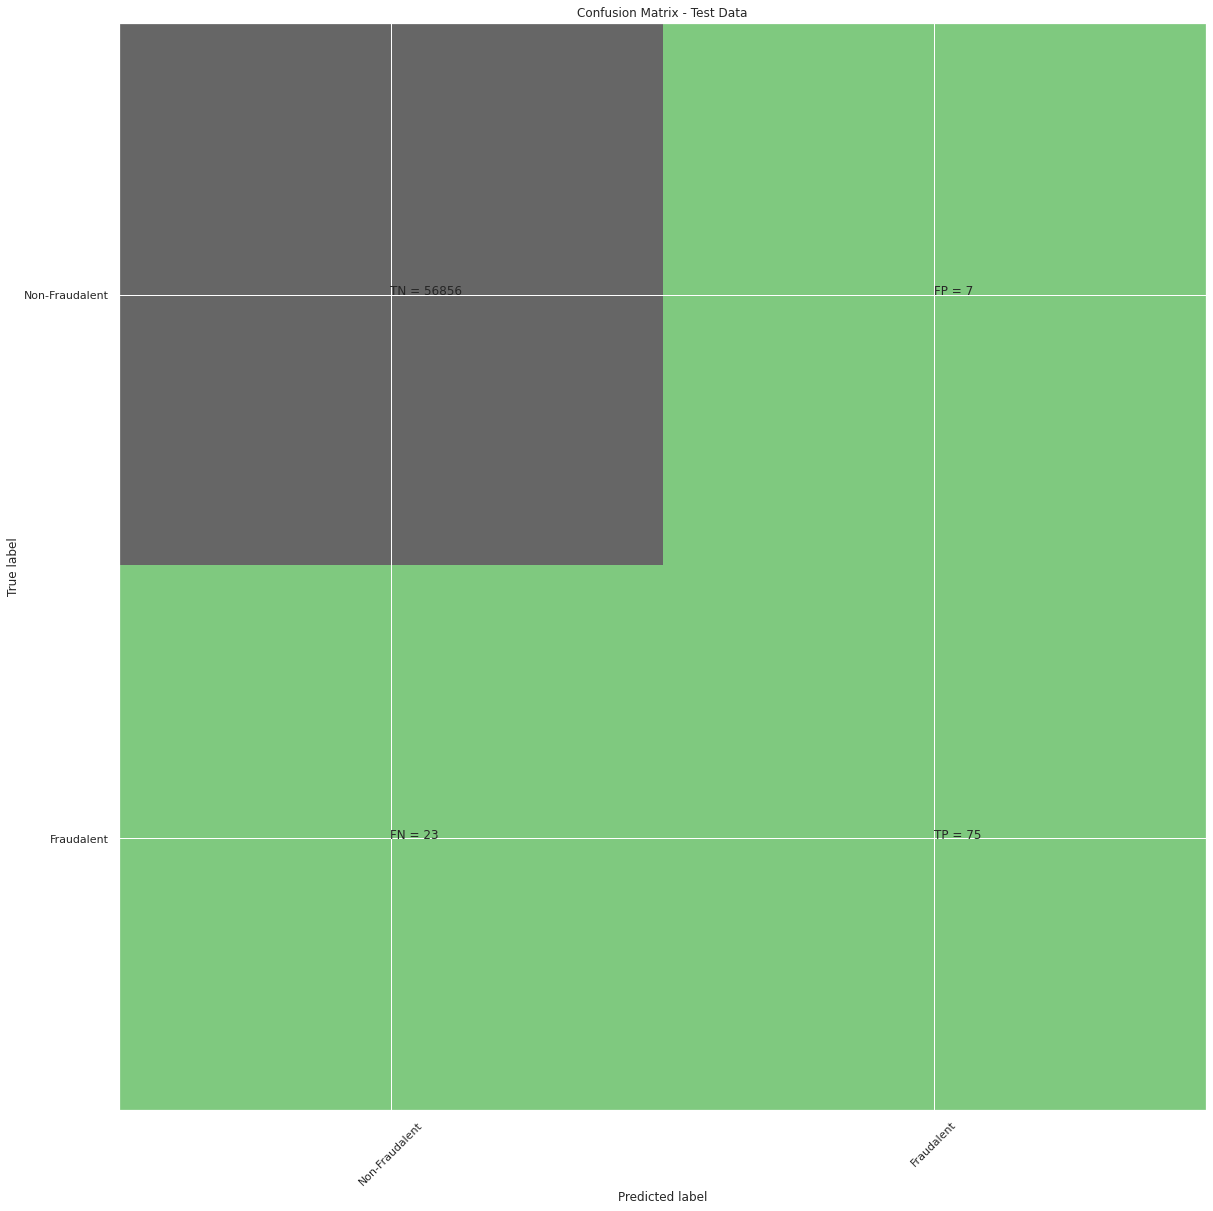

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.77      0.83        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9560013020912778
Random Forest threshold: 0.06
ROC for the test dataset 95.6%


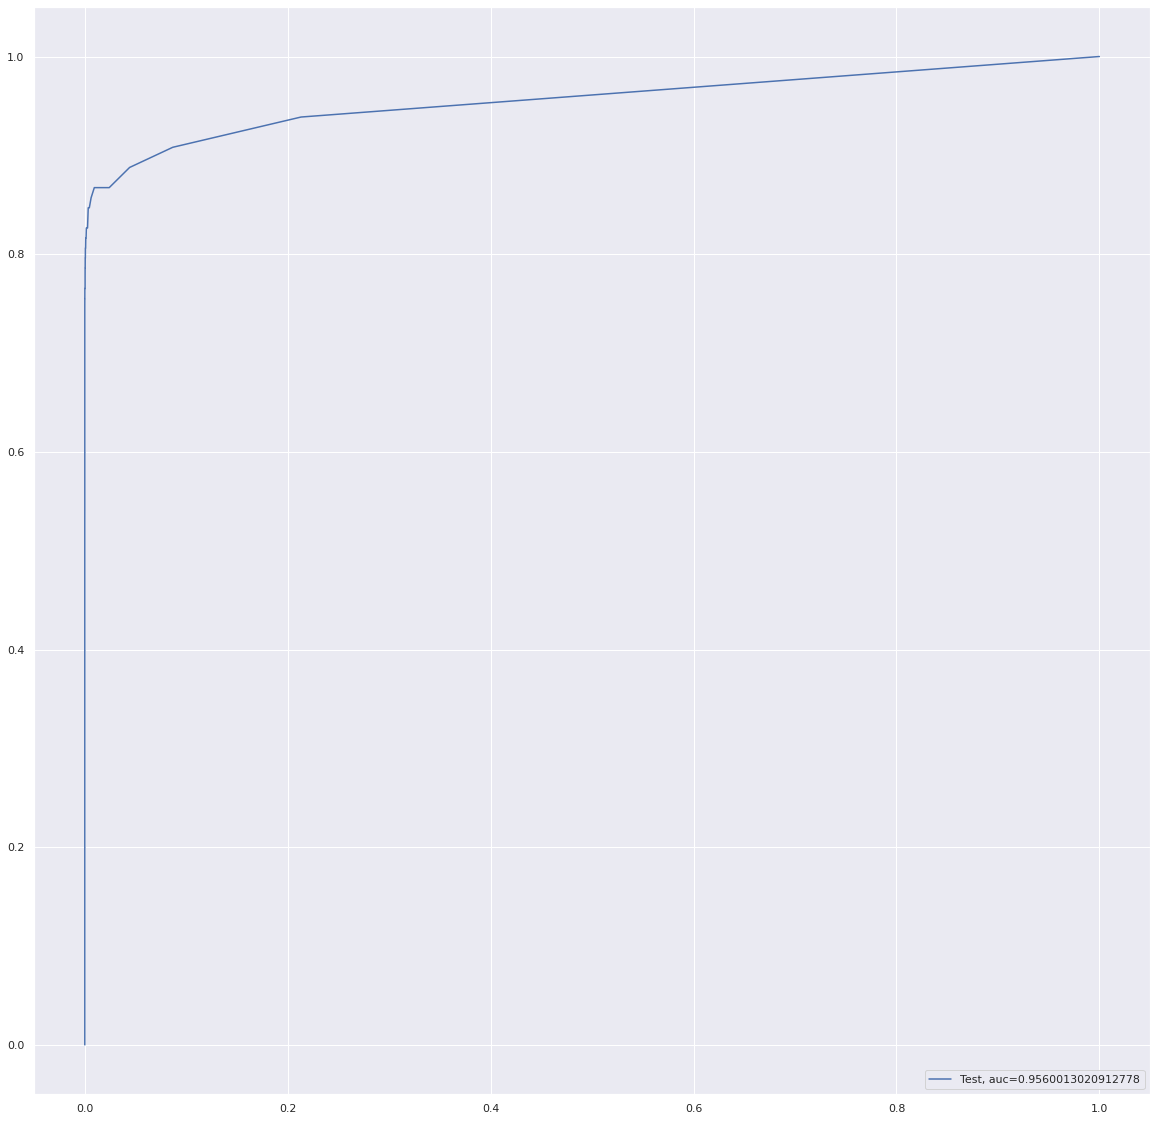

Time Taken by Model: --- 439.5706329345703 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9930303189901862
Confusion Matrix


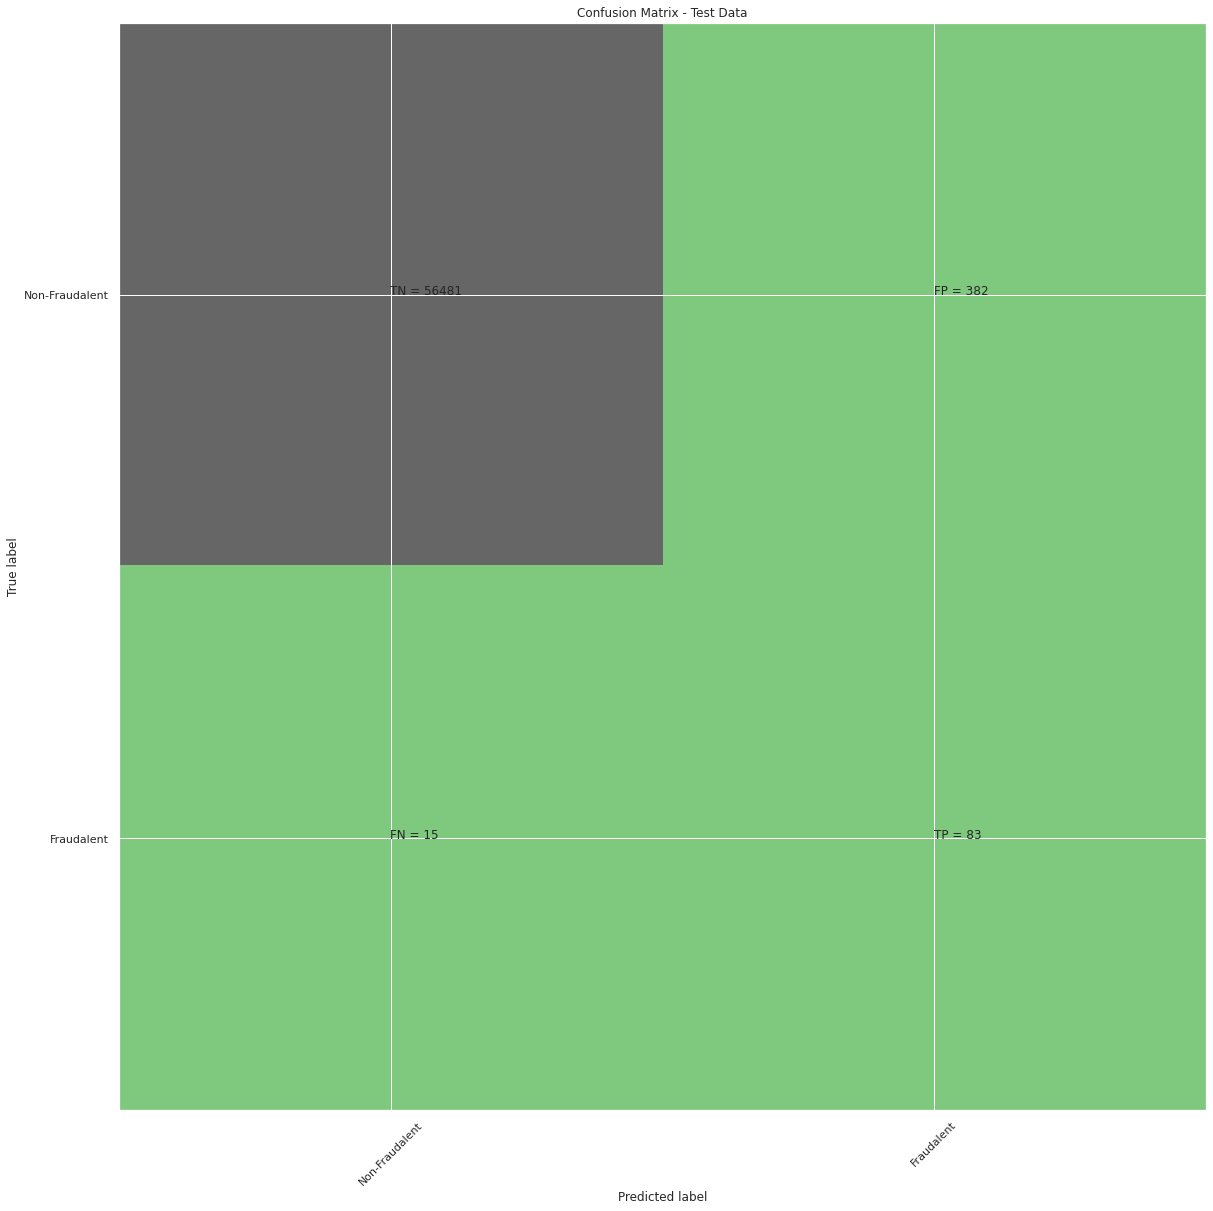

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.18      0.85      0.29        98

    accuracy                           0.99     56961
   macro avg       0.59      0.92      0.65     56961
weighted avg       1.00      0.99      1.00     56961

XGboost roc_value: 0.9781836903377147
XGBoost threshold: 0.2731809616088867
ROC for the test dataset 97.8%


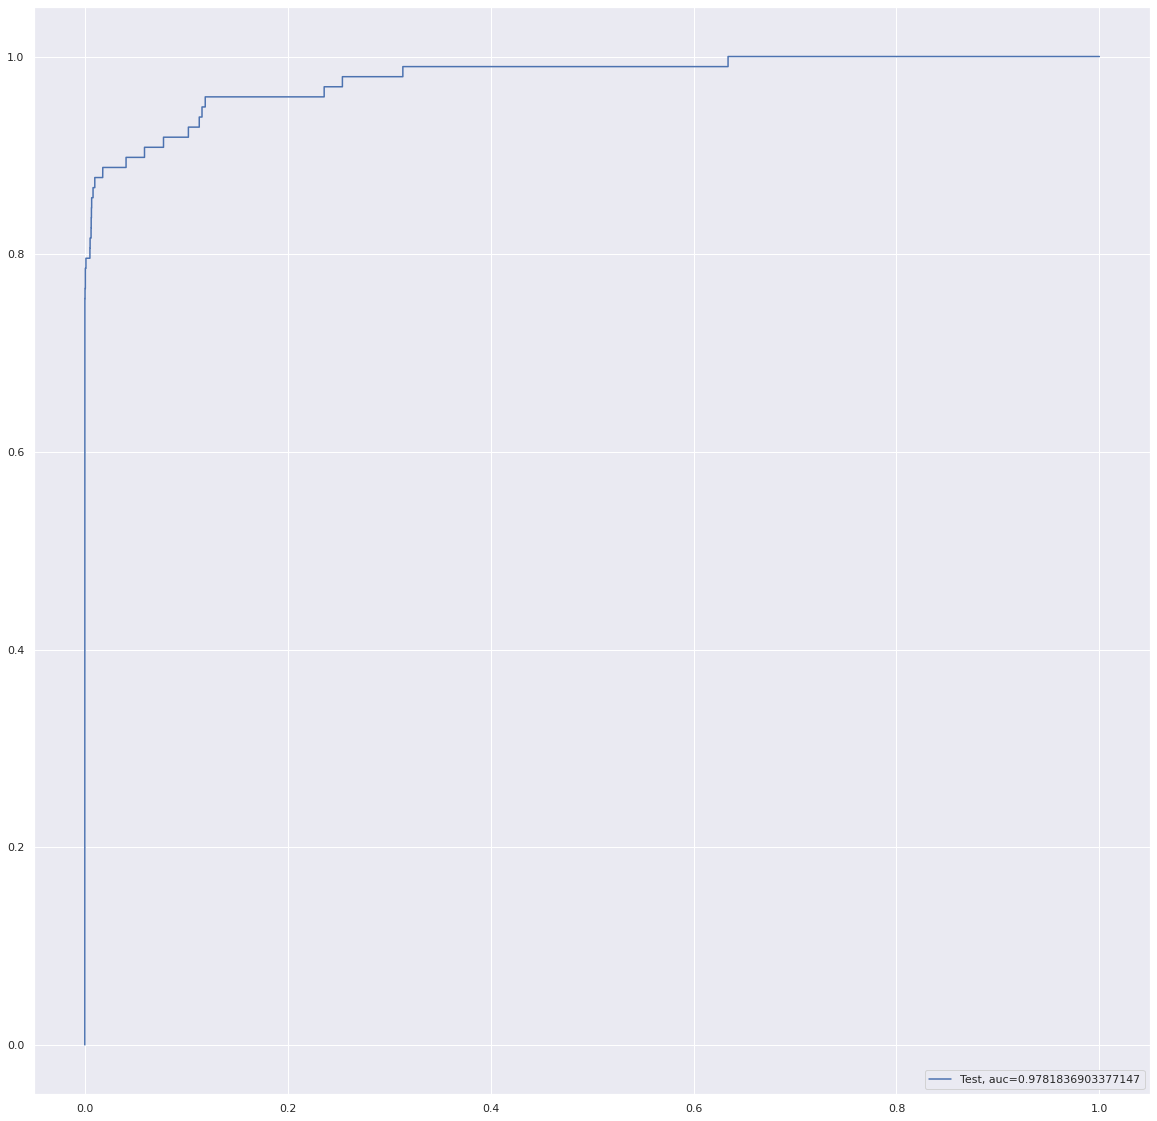

Time Taken by Model: --- 133.6730477809906 seconds ---
--------------------------------------------------------------------------------


In [69]:
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "
# Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [70]:
df_Results

Data_Imbalance_Handiling  ... threshold
0                              Power Transformer  ...  0.001289
1                              Power Transformer  ...  0.002676
2                              Power Transformer  ...  0.200000
3                              Power Transformer  ...  1.000000
4                              Power Transformer  ...  1.000000
5                              Power Transformer  ...  0.010000
6                              Power Transformer  ...  0.000756
7                              Power Transformer  ...  0.001385
8                 RepeatedKFold Cross Validation  ...  0.002072
9                 RepeatedKFold Cross Validation  ...  0.031293
10                RepeatedKFold Cross Validation  ...  0.200000
11                RepeatedKFold Cross Validation  ...  1.000000
12                RepeatedKFold Cross Validation  ...  1.000000
13                RepeatedKFold Cross Validation  ...  0.010000
14                RepeatedKFold Cross Validation  ...  0.001984
15                RepeatedKFold Cross Validation  ...  0.004431
16              StratifiedKFold Cross Validation  ...  0.001569
17              StratifiedKFold Cross Validation  ...  0.004244
18              StratifiedKFold Cross Validation  ...  0.200000
19              StratifiedKFold Cross Validation  ...  1.000000
20              StratifiedKFold Cross Validation  ...  1.000000
21              StratifiedKFold Cross Validation  ...  0.010000
22              StratifiedKFold Cross Validation  ...  0.002443
23              StratifiedKFold Cross Validation  ...  0.004352
24                          Random Undersampling  ...  0.153401
25                          Random Undersampling  ...  1.500000
26                          Random Undersampling  ...  0.400000
27                          Random Undersampling  ...  1.000000
28                          Random Undersampling  ...  1.000000
29                          Random Undersampling  ...  0.430000
30                          Random Undersampling  ...  0.131576
31                          Random Undersampling  ...  0.388652
32  Random Oversampling with StratifiedKFold CV   ...  0.446298
33  Random Oversampling with StratifiedKFold CV   ...  1.500000
34  Random Oversampling with StratifiedKFold CV   ...  0.200000
35  Random Oversampling with StratifiedKFold CV   ...  1.000000
36  Random Oversampling with StratifiedKFold CV   ...  1.000000
37  Random Oversampling with StratifiedKFold CV   ...  0.010000
38  Random Oversampling with StratifiedKFold CV   ...  0.147180
39   SMOTE Oversampling with StratifiedKFold CV   ...  0.446641
40   SMOTE Oversampling with StratifiedKFold CV   ...  1.500000
41   SMOTE Oversampling with StratifiedKFold CV   ...  0.400000
42   SMOTE Oversampling with StratifiedKFold CV   ...  1.000000
43   SMOTE Oversampling with StratifiedKFold CV   ...  1.000000
44   SMOTE Oversampling with StratifiedKFold CV   ...  0.060000
45   SMOTE Oversampling with StratifiedKFold CV   ...  0.273181

[46 rows x 5 columns]

Looking at Accuracy and ROC value - XGBoost has provided best results for SMOTE oversampling technique

### Oversampling with ADASYN 

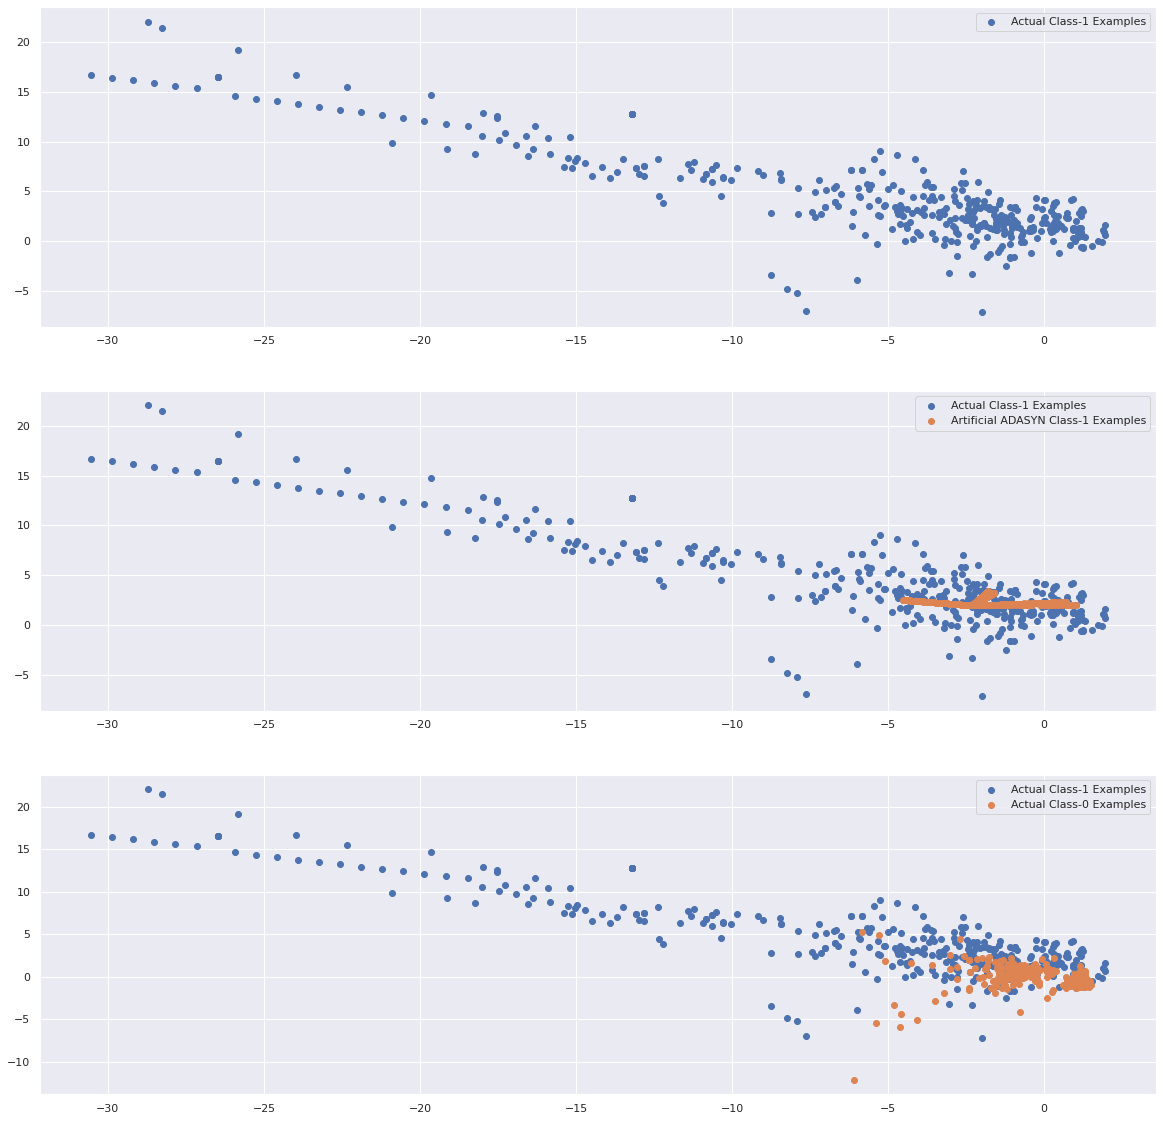

In [71]:
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ADASYN = over_sampling.ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_sample(X_train, y_train) 

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_ADASYN[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [72]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9837840925609461
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.99536558  1.040472    0.86054532  0.95478253  0.78892654 -1.1802698
  -0.92251805 -0.58391691 -0.33968518 -0.90295945  0.80087087 -1.49823958
  -0.14145136 -1.97554486  0.13217482 -0.99877928 -1.125551   -0.50111868
   0.37693768 -1.40758233 -0.18341086  0.72687459  0.65838876 -1.08083968
   0.69686219  0.19660966  0.13556606  1.2859248   0.01275172  0.04680201]]
[-5.43870501]
{1: array([[0.61021517, 0.63159046, 0.72080484, 0.87495728, 0.96155685,
        0.97622443, 0.97996651, 0.98264108, 0.98380927, 0.98416981,
        0.98422199, 0.98422199, 0.98422199, 0.98422199, 0.98422199,
        0.98422199, 0.98422199, 0.98422199, 0.98422199, 0.98422199],
       [0.61045493, 0.63159708, 0.71938814, 0.87086492, 0.9587103 ,
        0.97444715, 0.97873341, 0.98183648, 0.98311067, 0.98346534,
        0.98351997, 0.98351997, 0.98351997, 0.98351997,

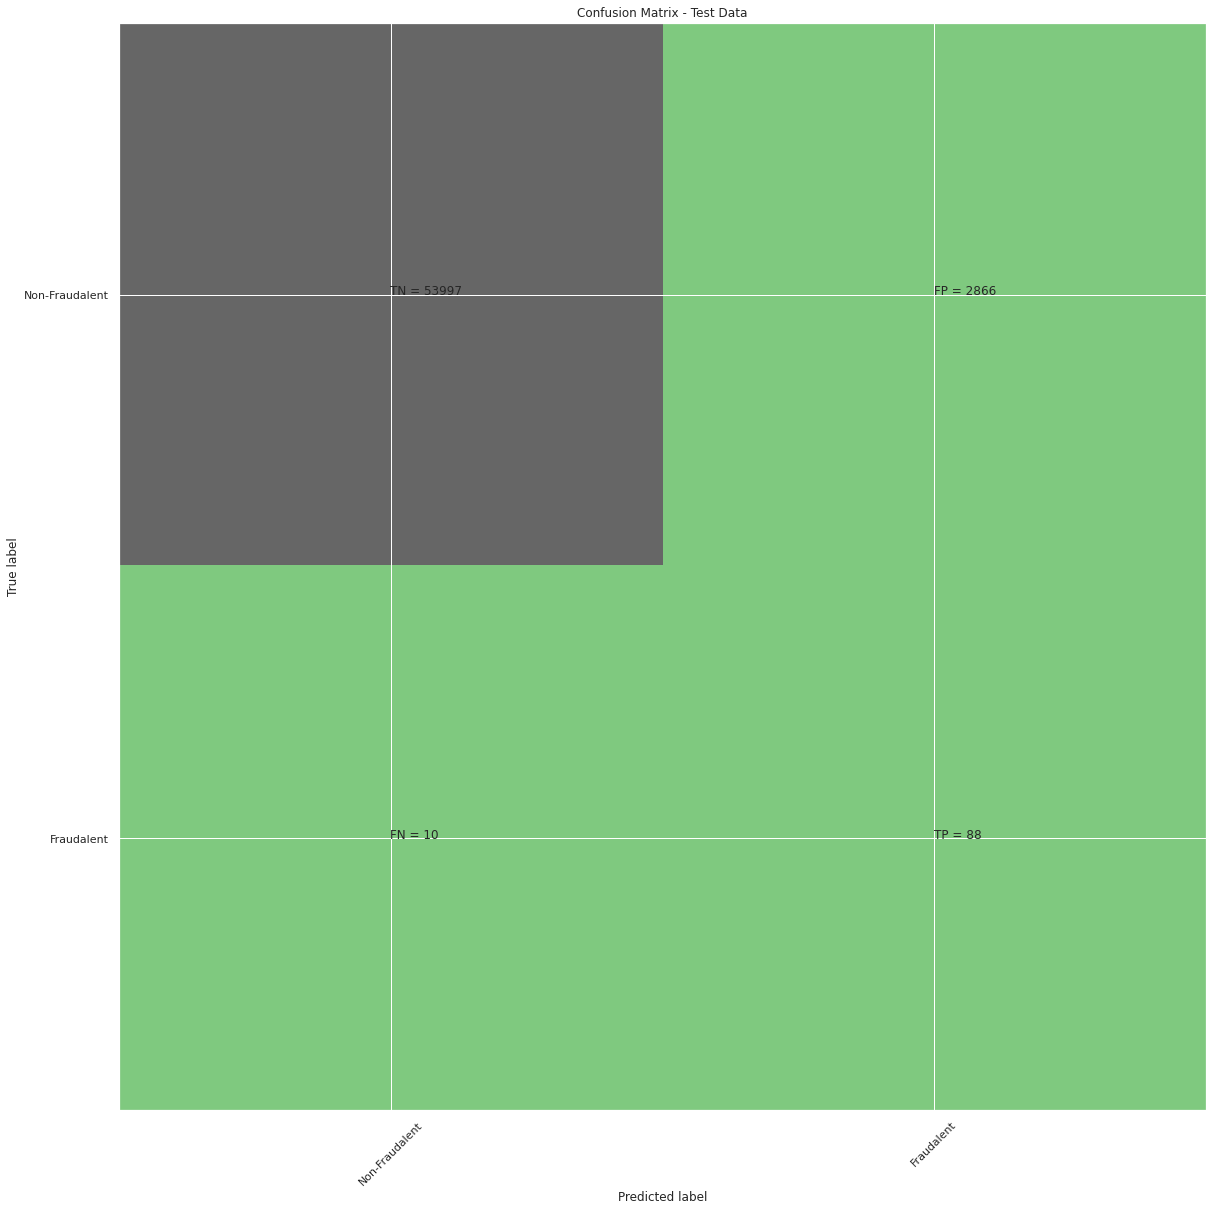

classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56863
           1       0.03      0.90      0.06        98

    accuracy                           0.95     56961
   macro avg       0.51      0.92      0.52     56961
weighted avg       1.00      0.95      0.97     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


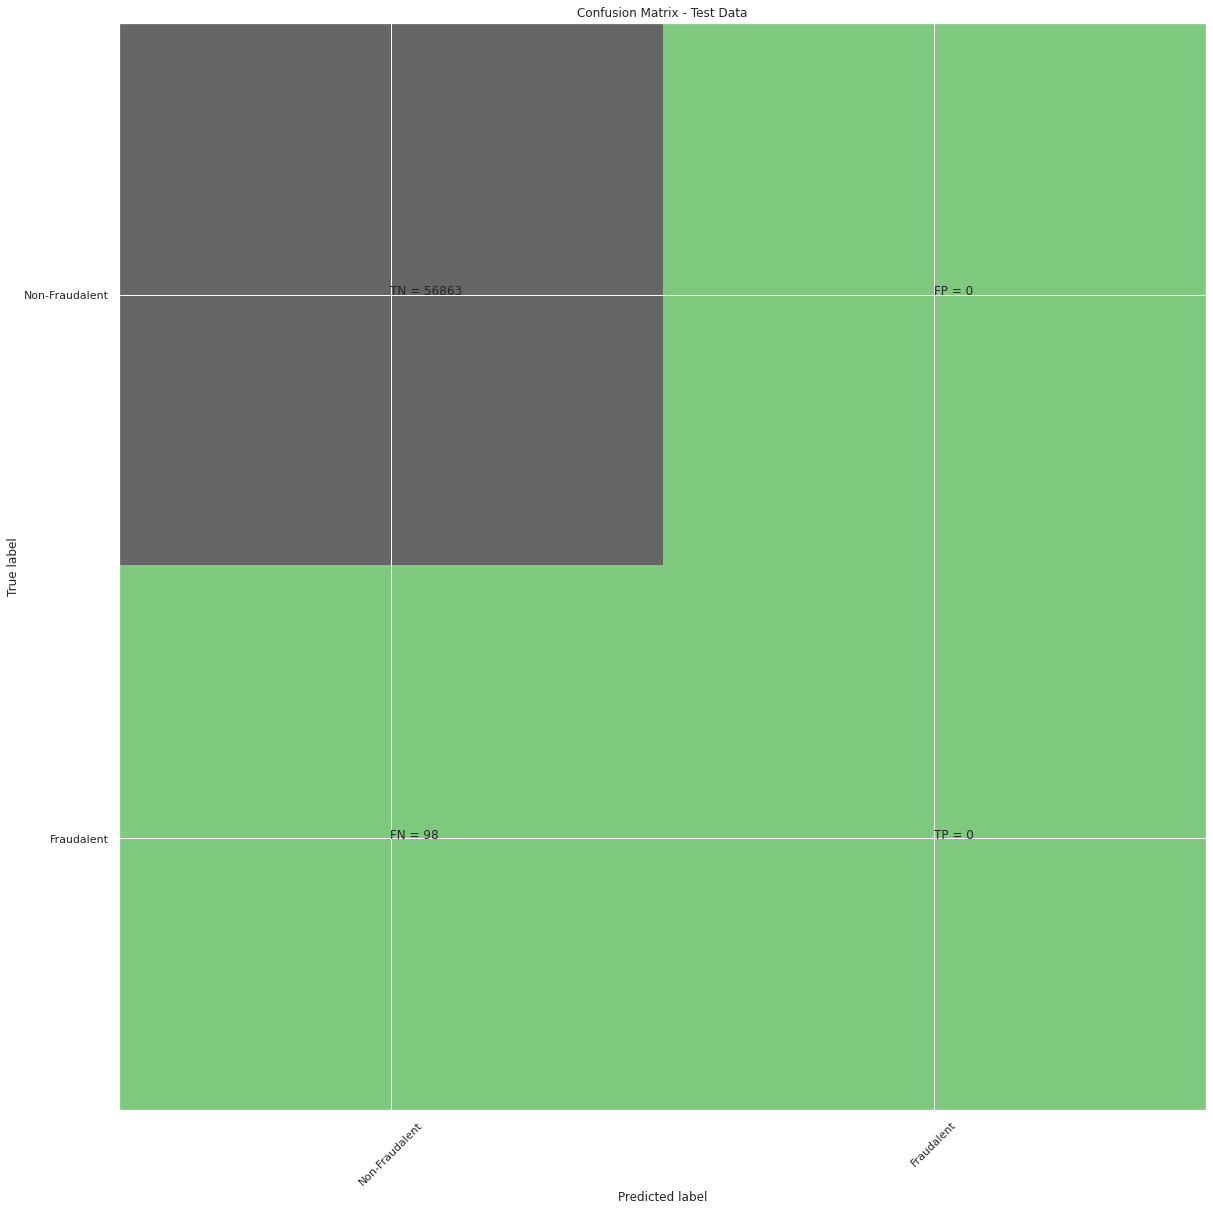

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9743735121328133
l2 threshold: 0.6511566701269308
ROC for the test dataset 97.4%


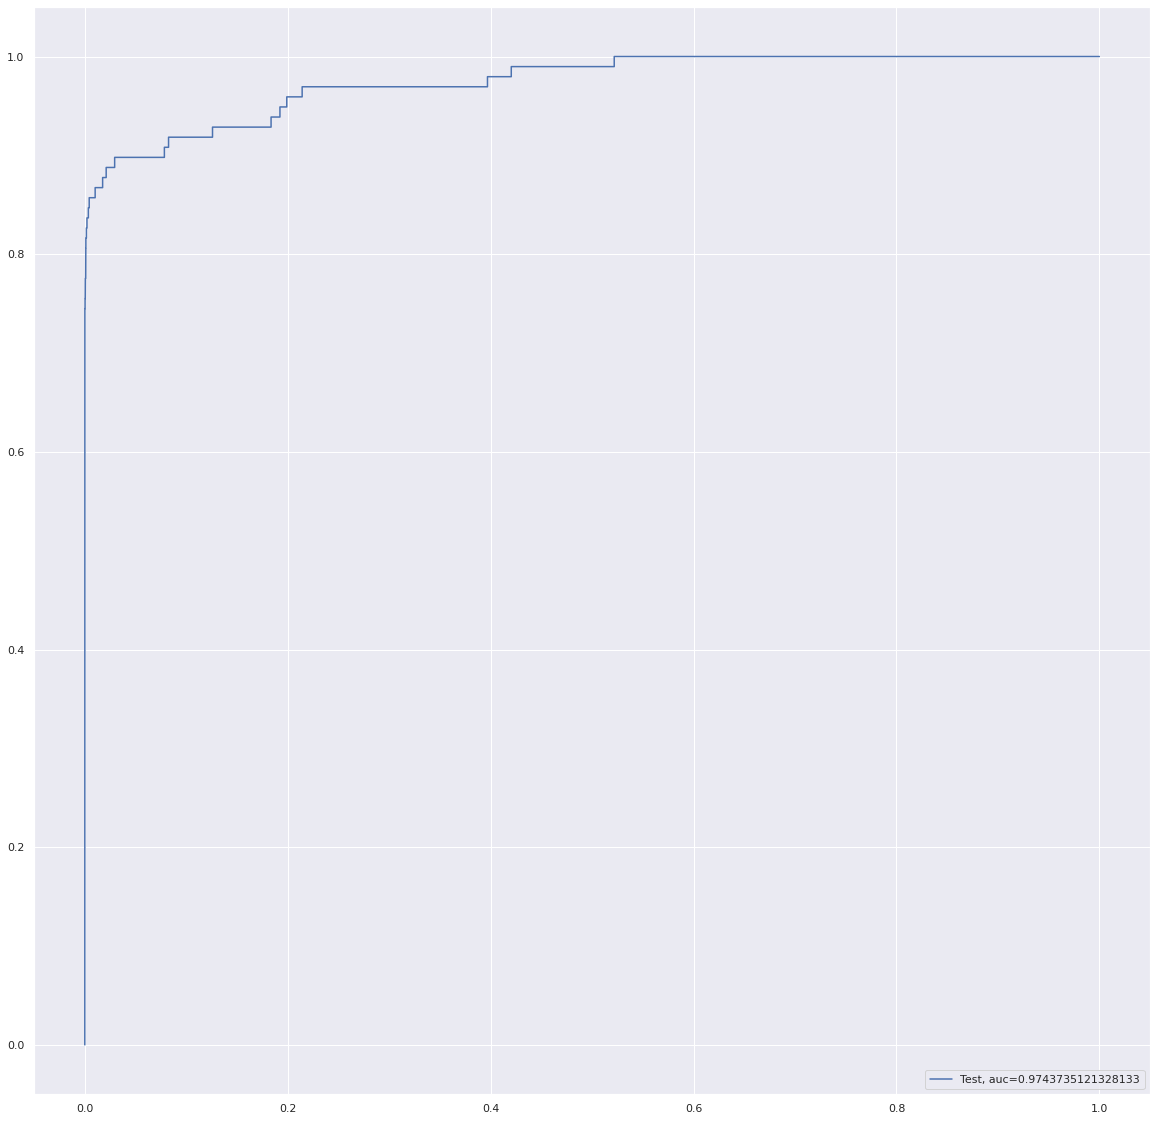

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


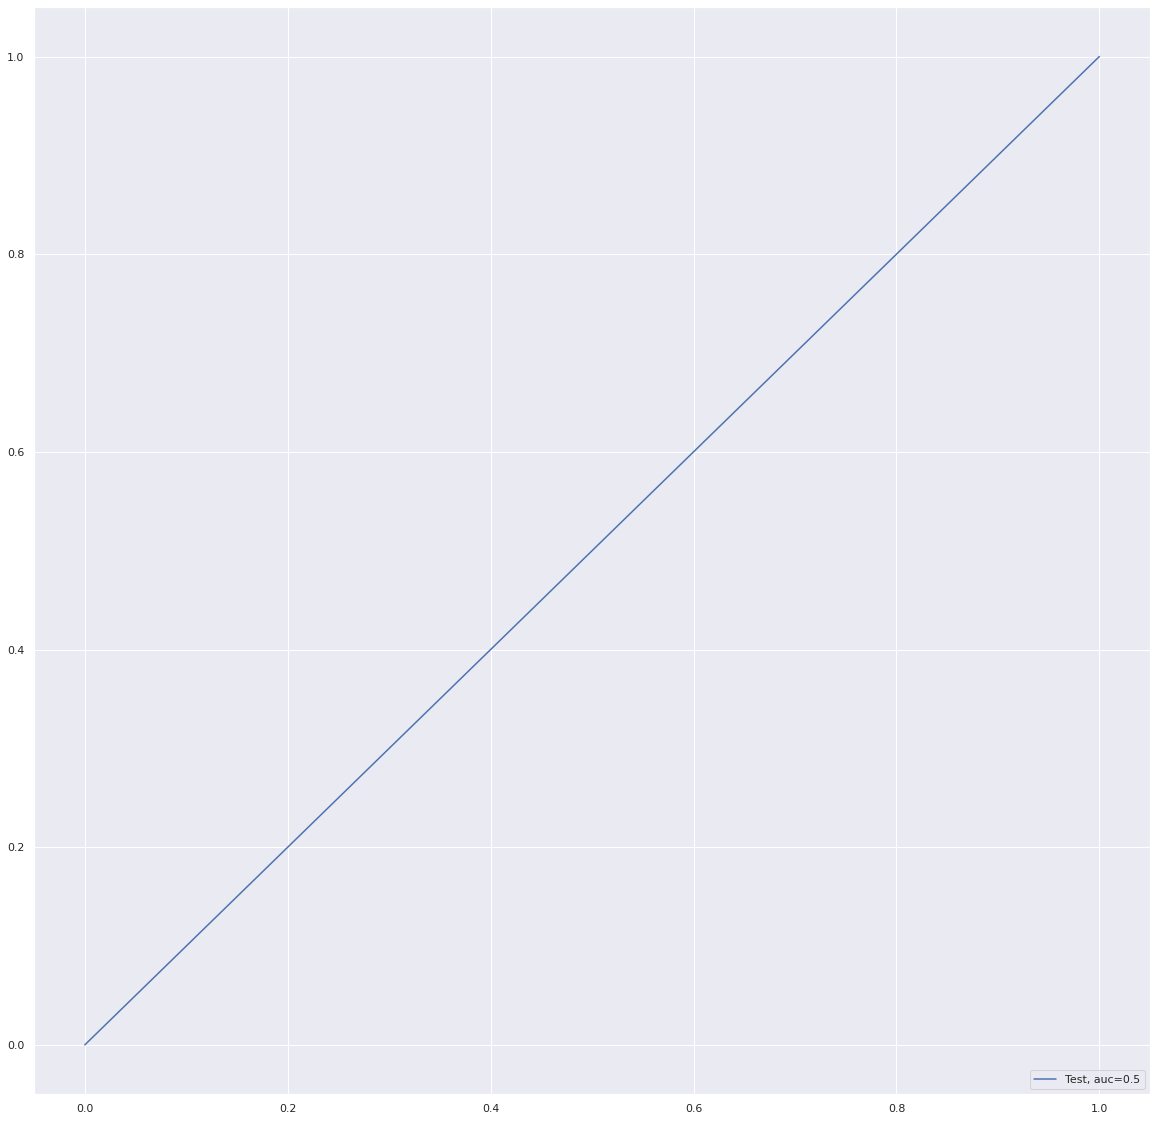

Time Taken by Model: --- 702.4430825710297 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9942943417425958
Confusion Matrix


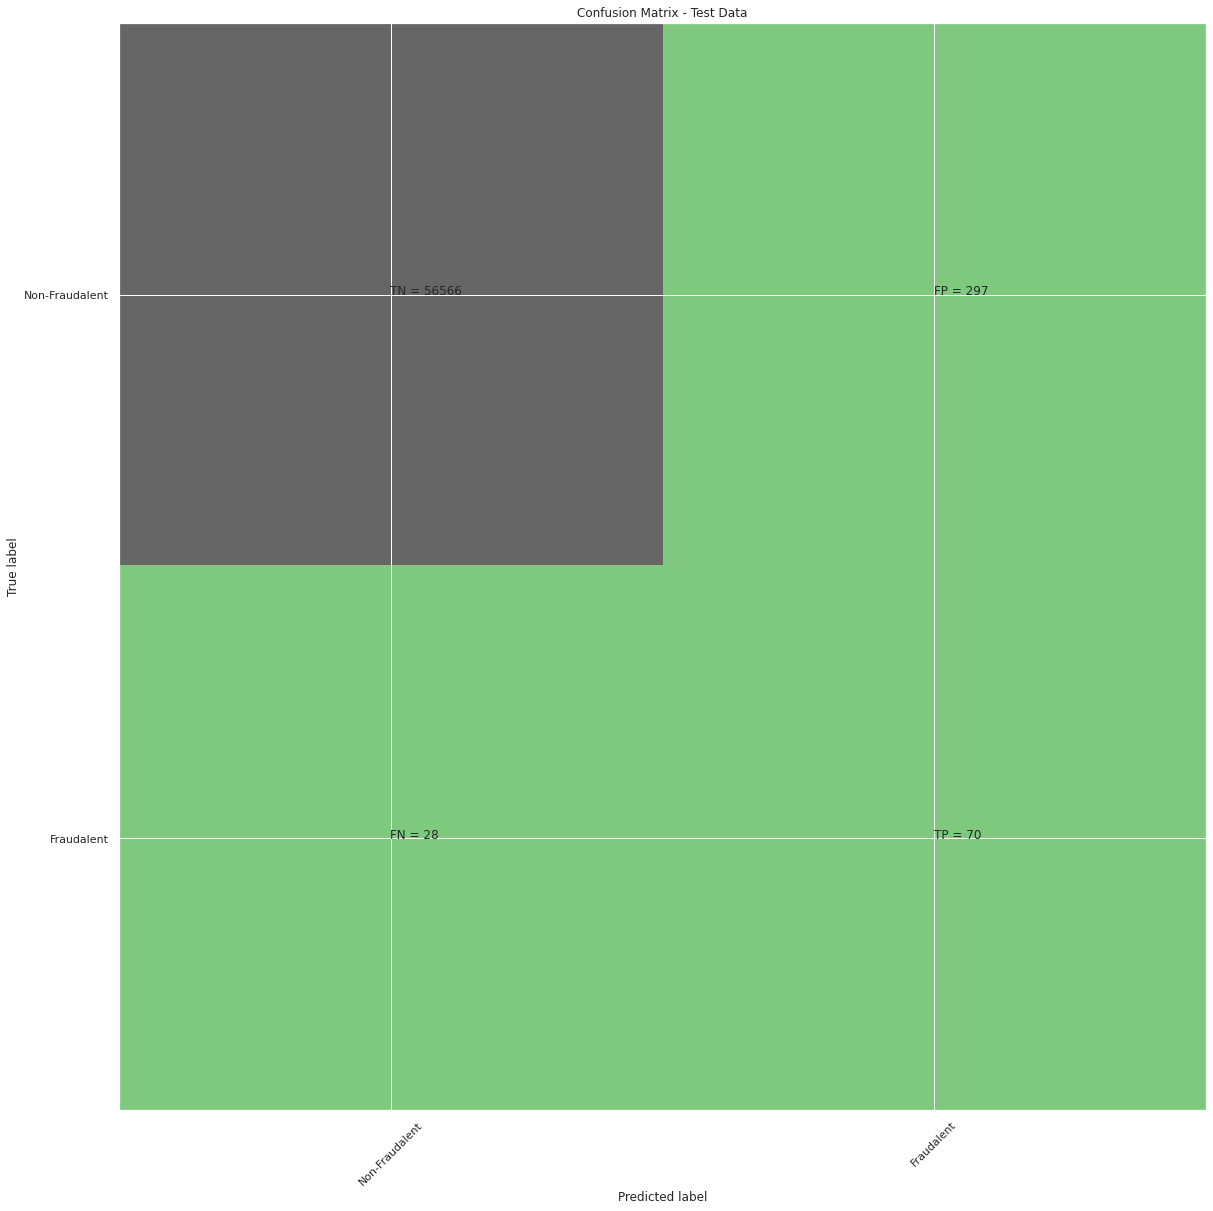

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.19      0.71      0.30        98

    accuracy                           0.99     56961
   macro avg       0.60      0.85      0.65     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8601572630529446
KNN threshold: 0.4
ROC for the test dataset 86.0%


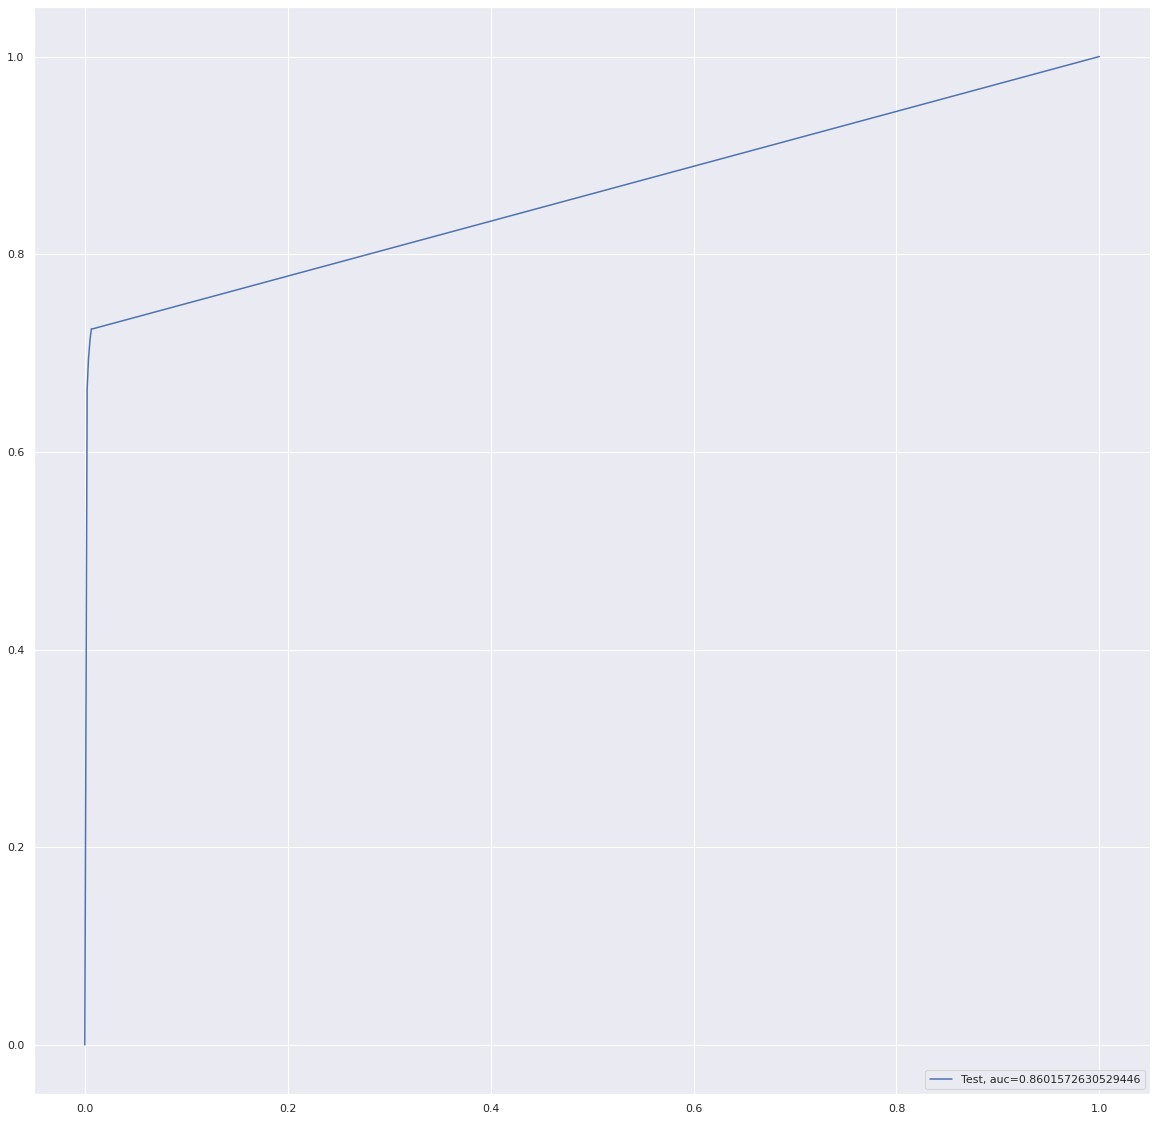

Time Taken by Model: --- 206.63178730010986 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9968750548620986
Confusion Matrix


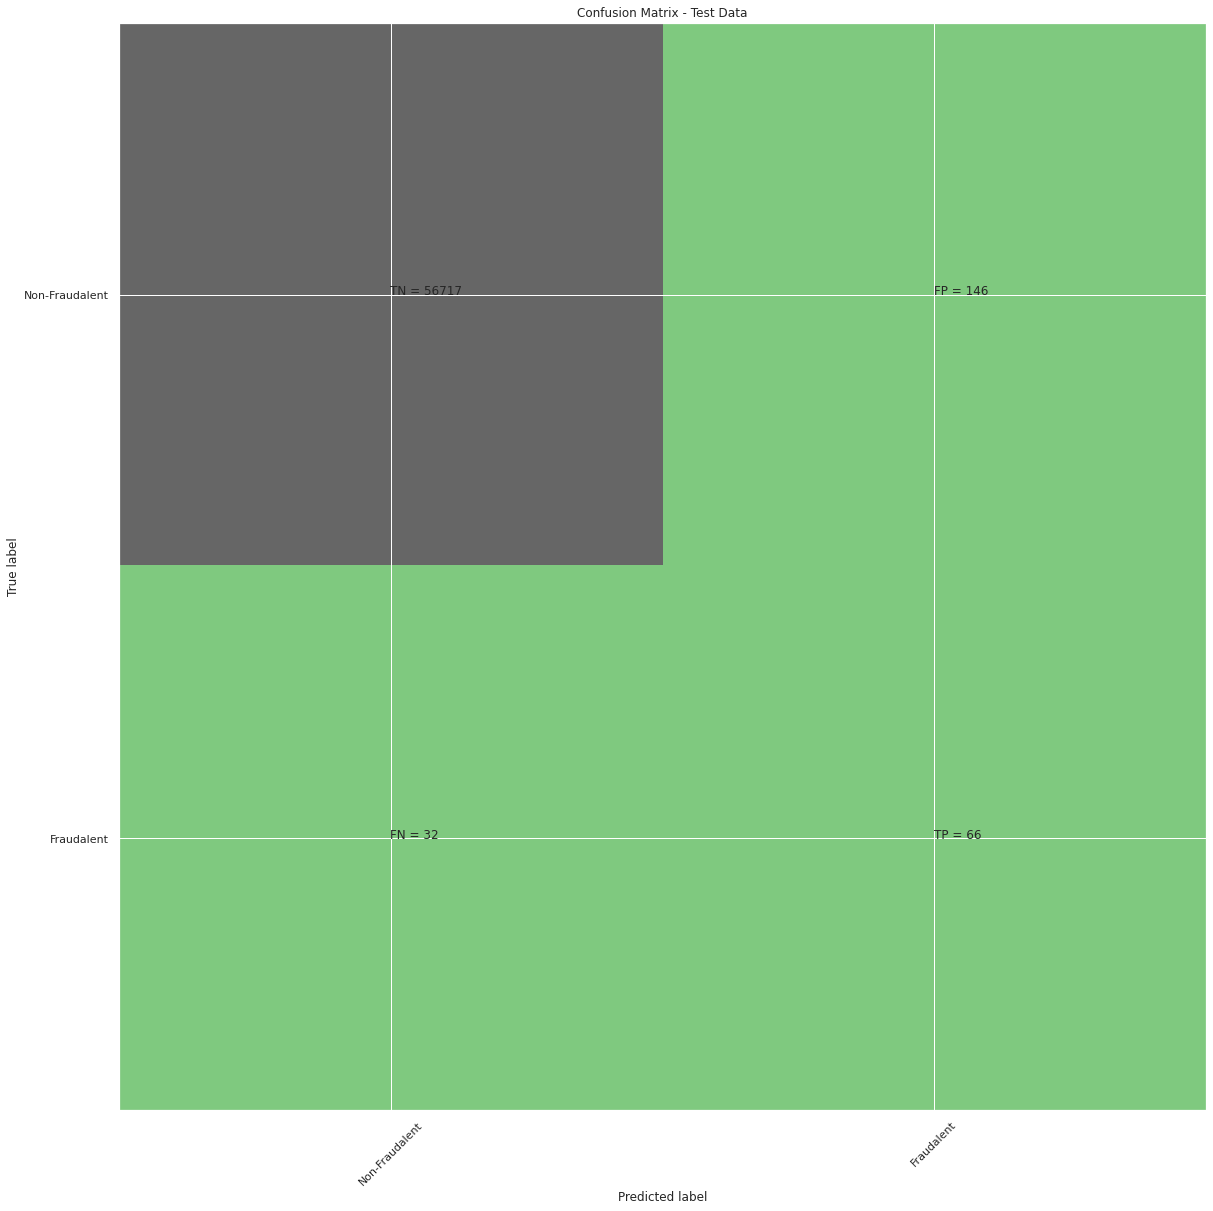

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.31      0.67      0.43        98

    accuracy                           1.00     56961
   macro avg       0.66      0.84      0.71     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8354509065290115
Tree threshold: 1.0
ROC for the test dataset 83.5%


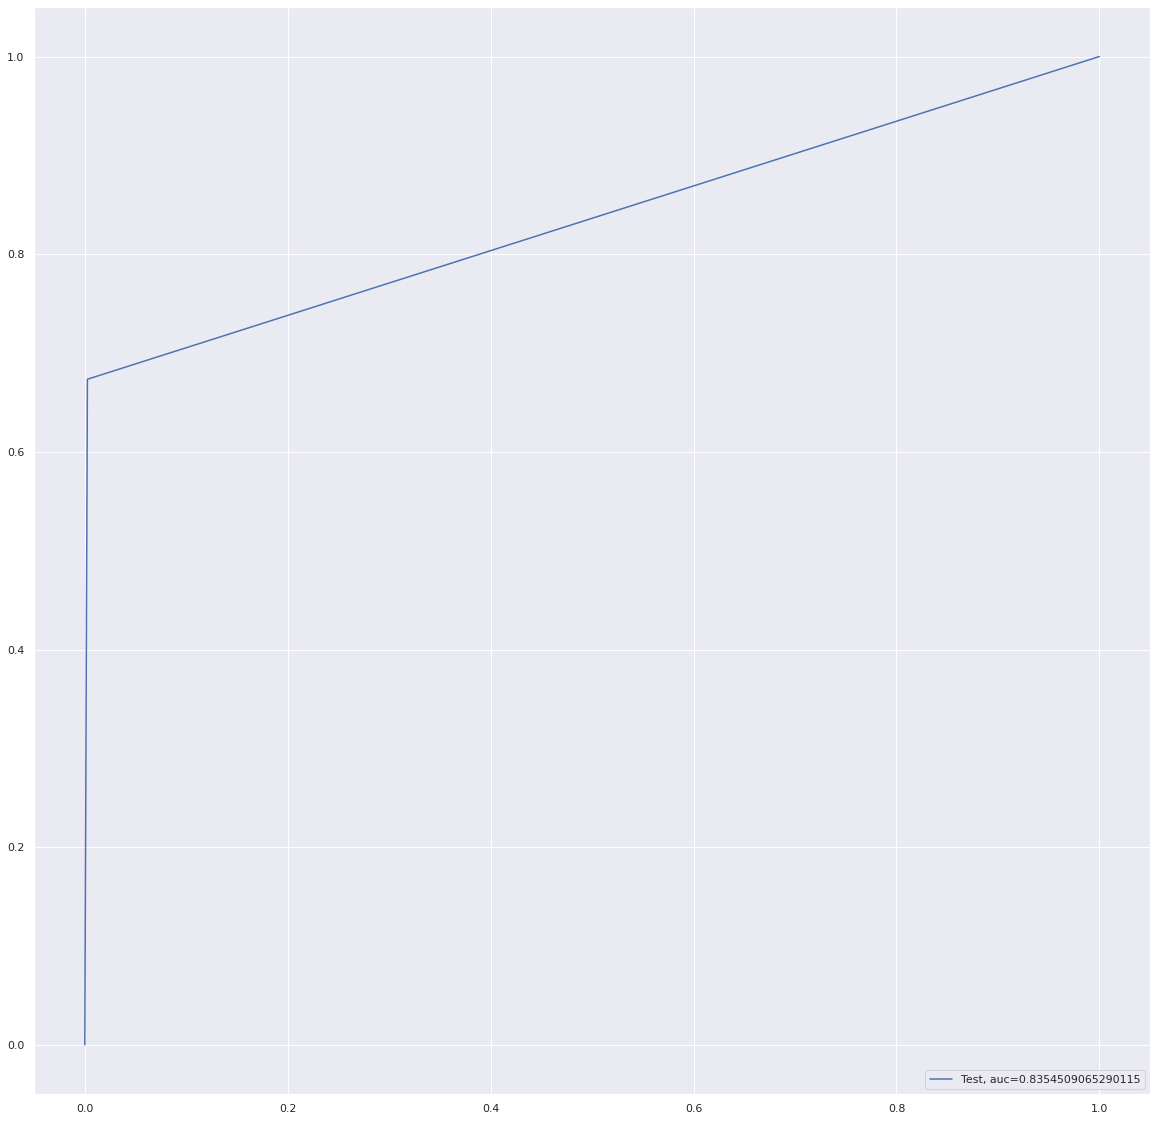

entropy score: 0.997910851284212
Confusion Matrix


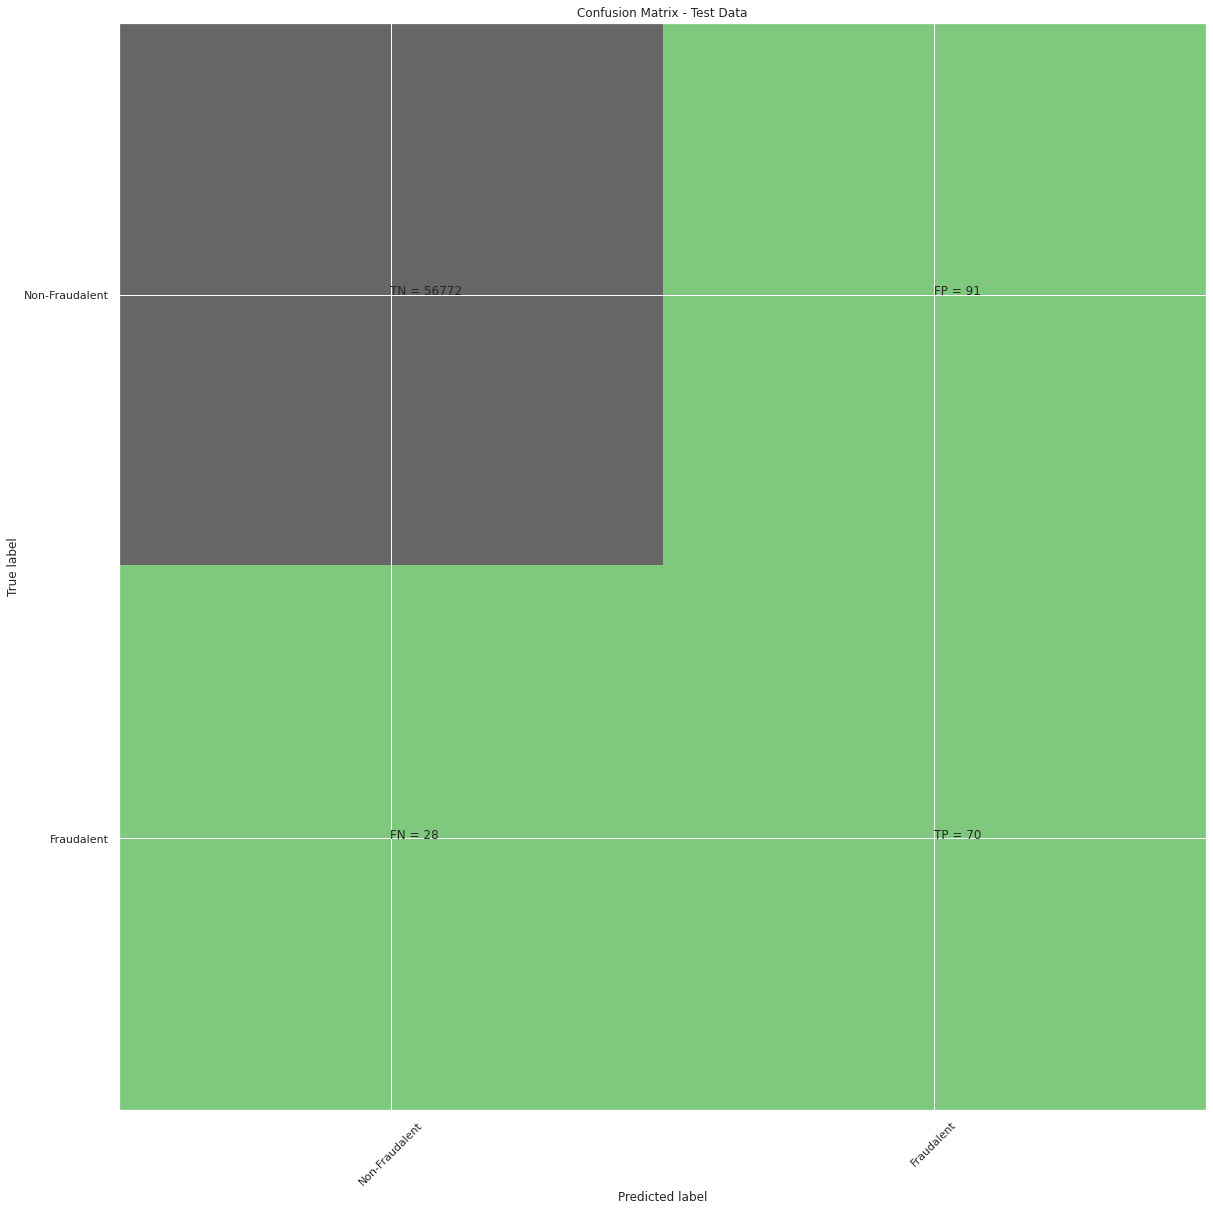

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.43      0.71      0.54        98

    accuracy                           1.00     56961
   macro avg       0.72      0.86      0.77     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8563426883160278
Tree threshold: 1.0
ROC for the test dataset 85.6%


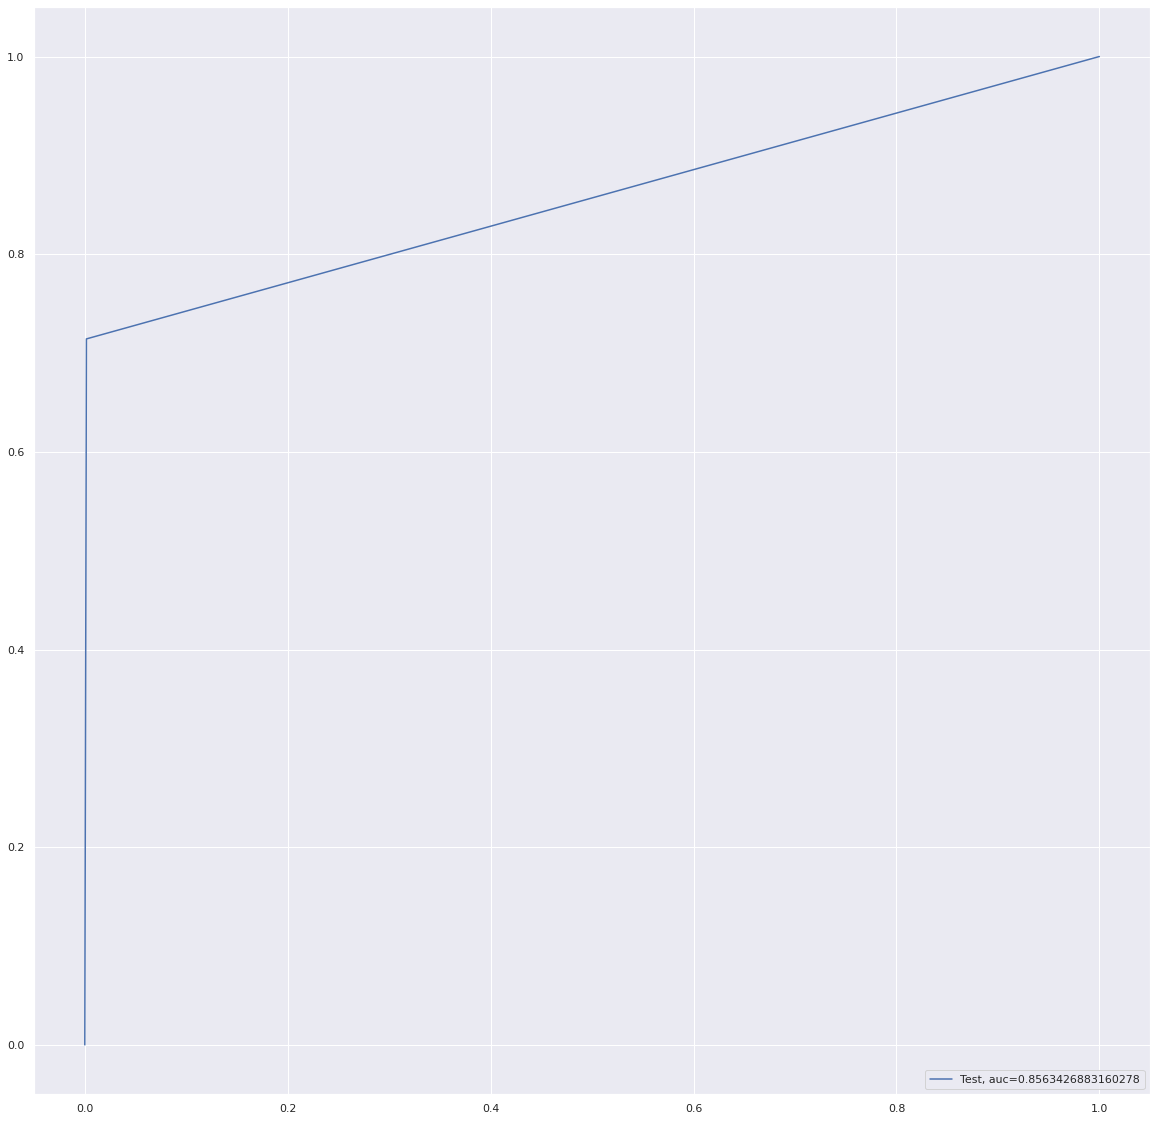

Time Taken by Model: --- 89.95732569694519 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995084355962852
Confusion Matrix


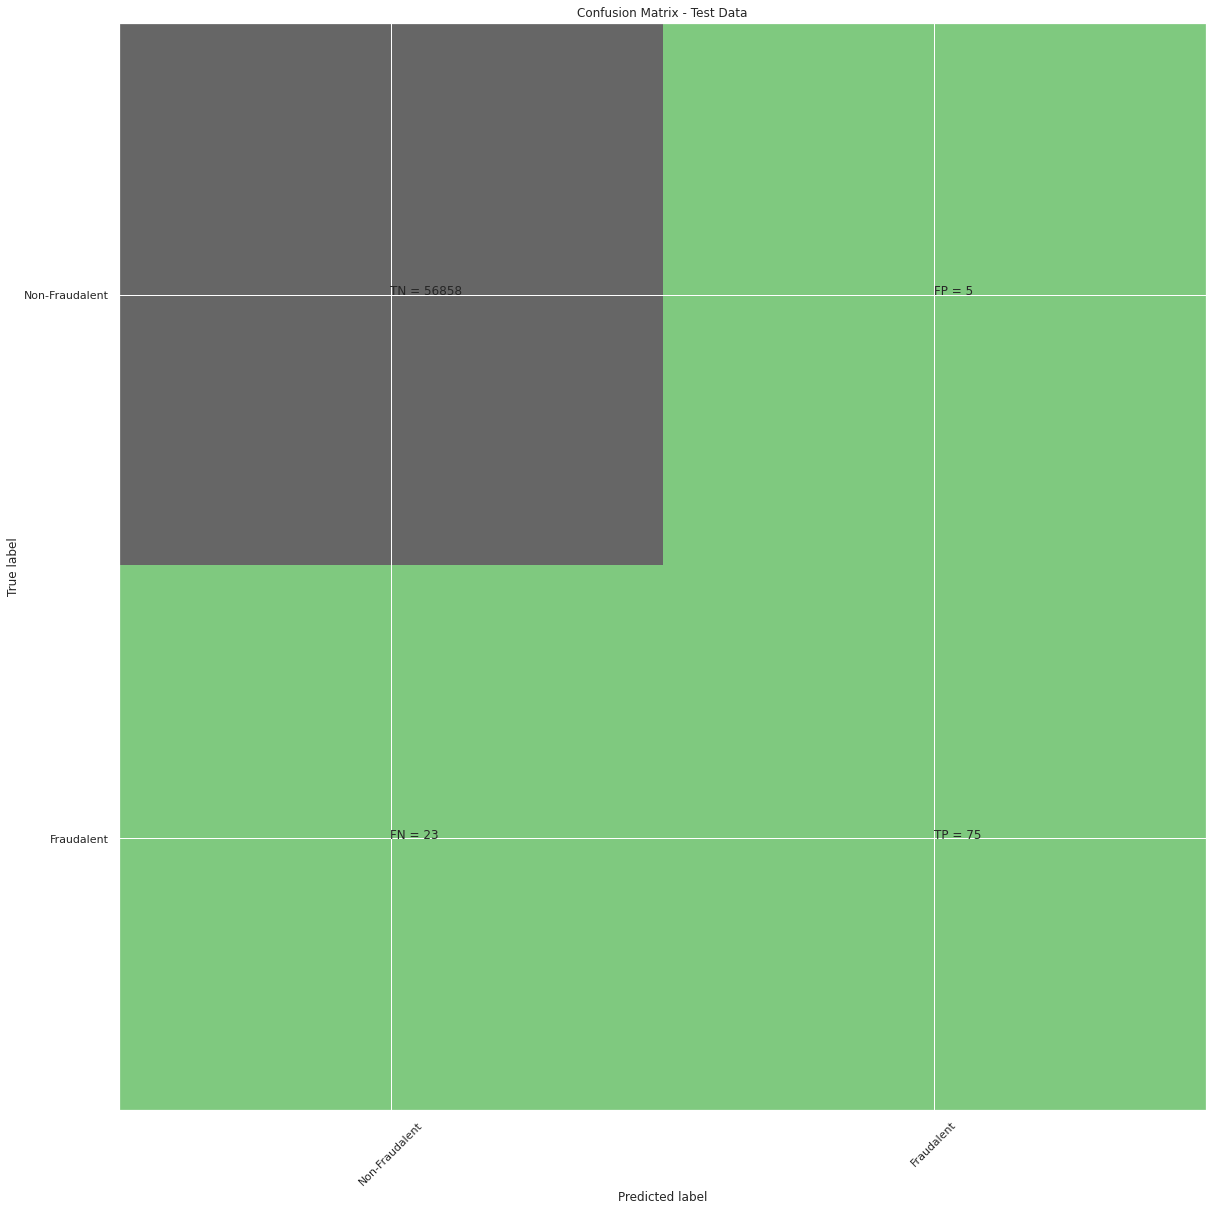

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9696085686793929
Random Forest threshold: 0.04
ROC for the test dataset 97.0%


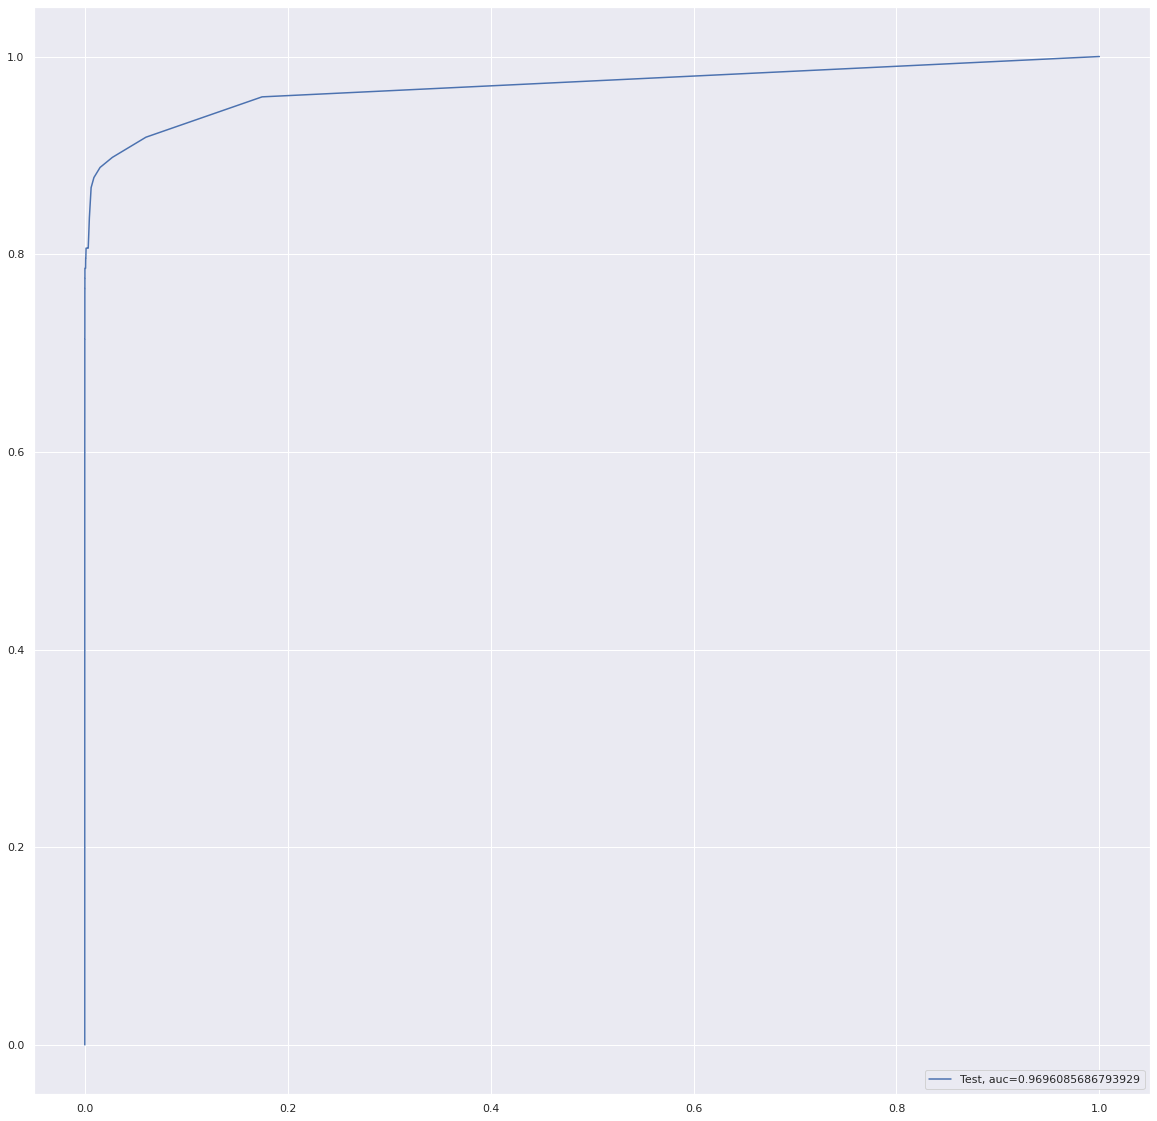

Time Taken by Model: --- 450.0571982860565 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9830410280718386
Confusion Matrix


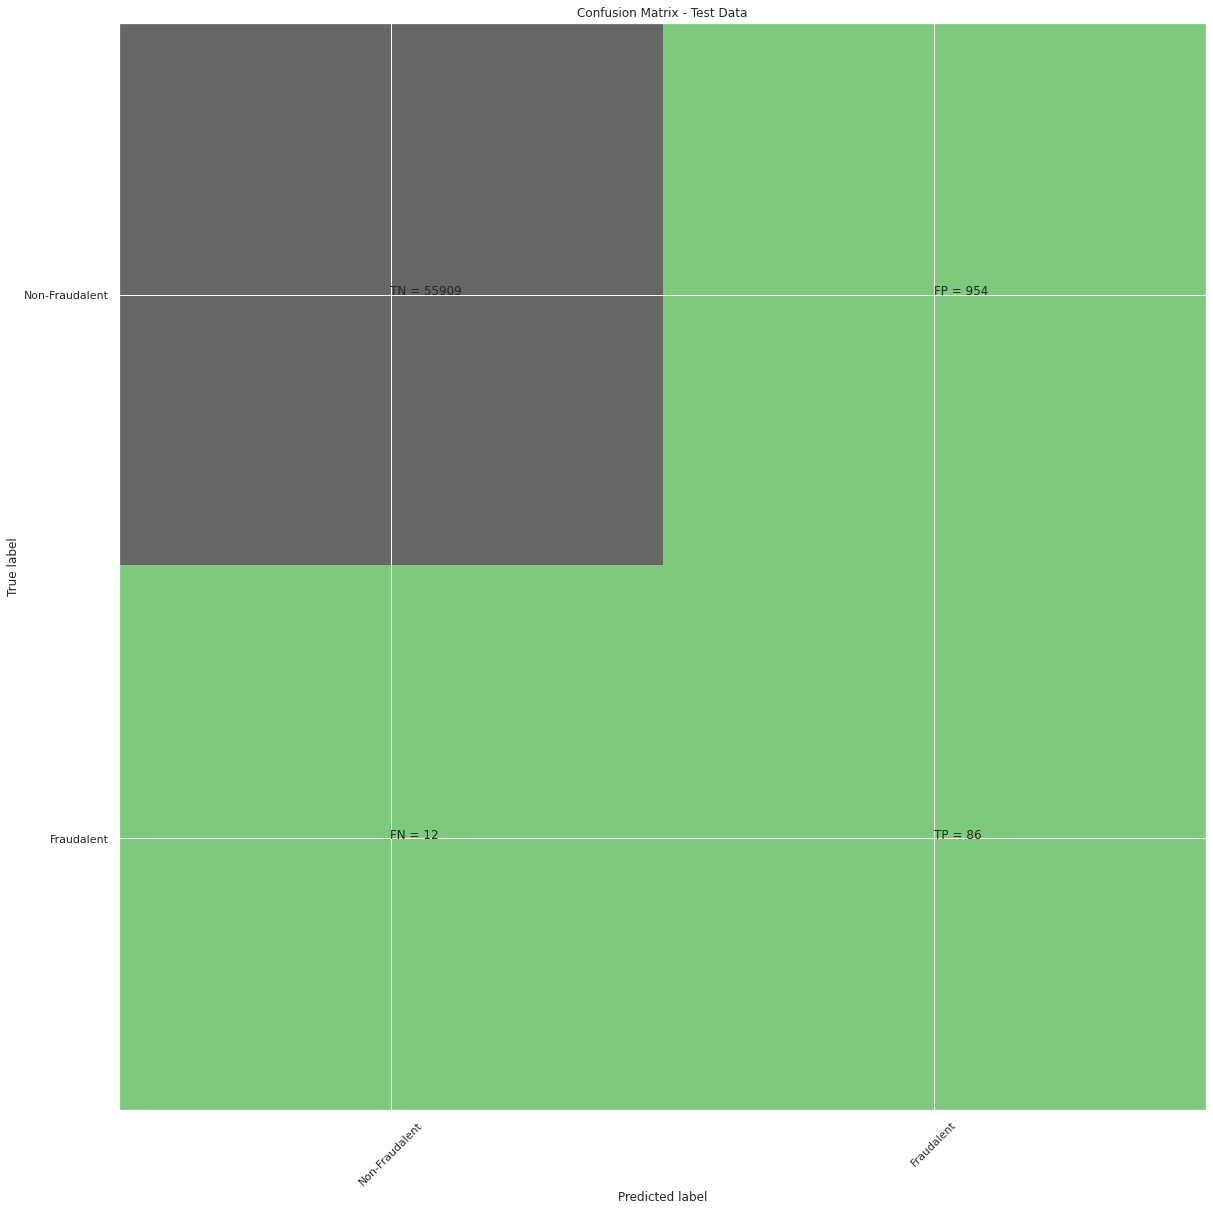

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.08      0.88      0.15        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961

XGboost roc_value: 0.9786249585918464
XGBoost threshold: 0.32295677065849304
ROC for the test dataset 97.9%


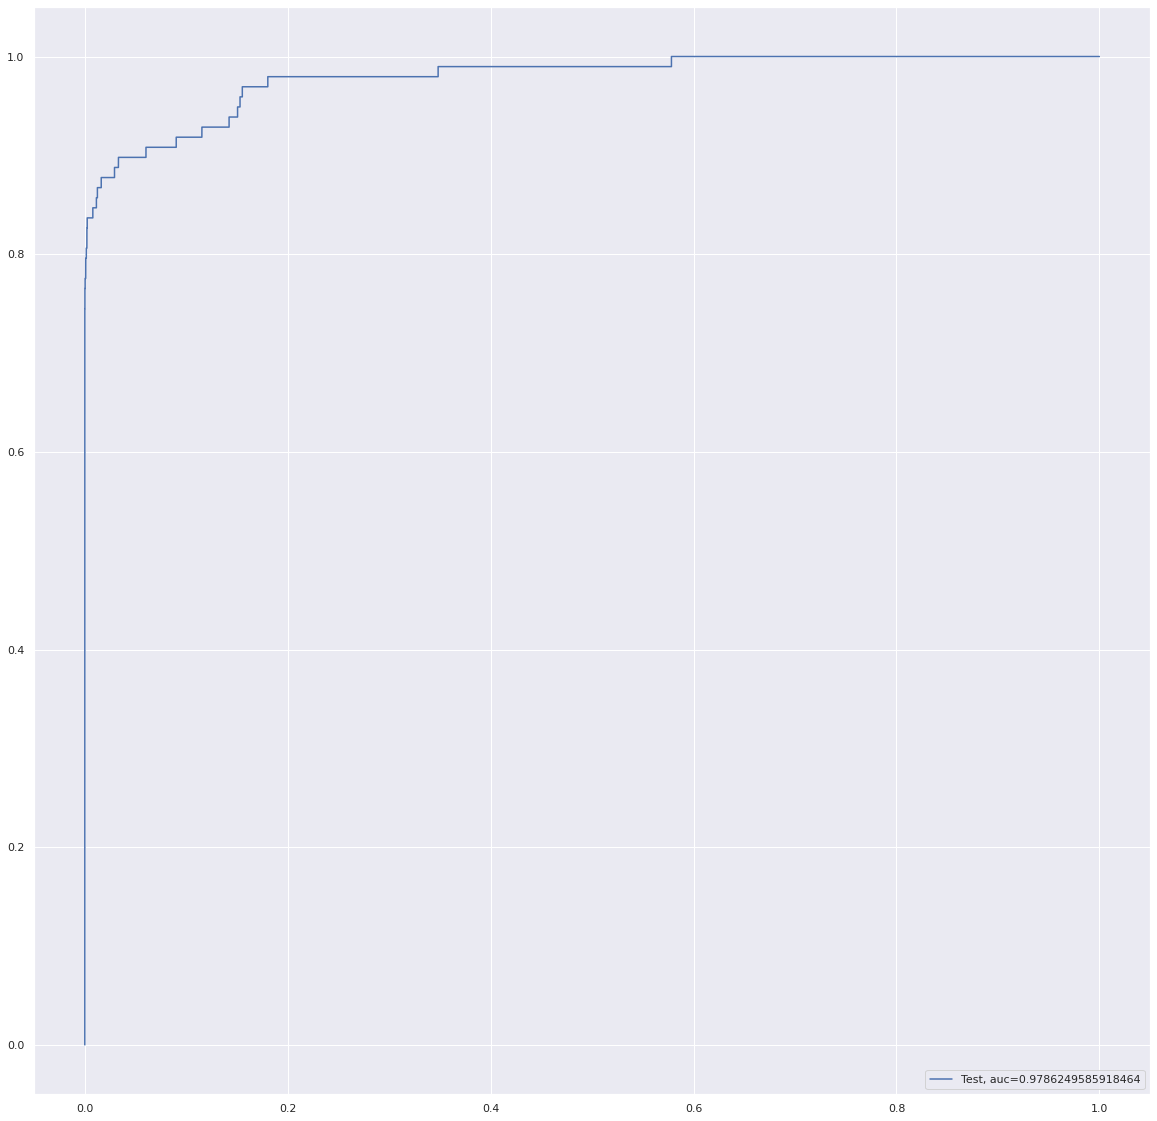

Time Taken by Model: --- 129.63950490951538 seconds ---
--------------------------------------------------------------------------------


In [73]:
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "
# Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Accuracy and ROC value - XGBoost has provided best results for ADASYN oversampling technique

#### XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results.
But looking at the results Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.

### **Hyper parameter Tuning**

In [74]:
# Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9964888256877513
XGboost roc_value: 0.982067981510878
XGBoost threshold: 0.14717982709407806


In [75]:
# Evaluate XGboost model
from xgboost import XGBClassifier

# Fit model
XGBmodel = XGBClassifier(random_state=42)

In [76]:
# Let's tune XGBoost Model for max_depth and min_child_weight

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([216.26444788, 212.40254974, 217.78456368, 356.47966218,
         359.18290524, 361.74953232, 496.91895251, 473.46377921,
         474.51511283, 602.81493659, 587.24385343, 495.76484532]),
  'mean_score_time': array([0.66651006, 0.68481193, 0.69548693, 0.97373681, 0.99696355,
         0.97194171, 1.11611047, 1.15035963, 1.10706286, 1.20527439,
         1.22504234, 0.84596705]),
  'mean_test_score': array([0.99937381, 0.99944771, 0.9994146 , 0.9929938 , 0.99645332,
         0.99408173, 0.98890017, 0.99126037, 0.992154  , 0.99719416,
         0.99822883, 0.99964906]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5, 1, 3, 5],
               mask=[False, False, False, False, False, Fals

# **Conclusion**

#### **XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results.** **Hence, selecting this model.**
**Also, Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.**